# My Movie Database (MMDb)

## Structure

- Data Sources
    - Trakt : Track what you watch and when (API connection)
    - IMDb : Internet Movie Database (API connection)
    
- Analysis
    - User history data of watched movies

## I/O

- Dataset : pickle file (Input/Output)
- Trakt : API connection (Input)
- IMDb  : API connection (Input) or txt (Input/Output)

---

# Imports

In [1]:
# Import functions
# https://stackoverflow.com/questions/66920753/running-a-justpy-web-app-on-jupyter-returns-runtimeerror\n",
import nest_asyncio
nest_asyncio.apply()

# https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file
%run MMDb_functions.ipynb

Do you want to get new data (True/False)?  false
Do you want to export data (True/False)?  false


## Pickle file

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure. 
# “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, 
# whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.
foo = load_pickle()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   title            1080 non-null   object             
 1   year             1080 non-null   int32              
 2   imdbid           1080 non-null   object             
 3   rated            1080 non-null   object             
 4   runtime          1080 non-null   int32              
 5   genre            1080 non-null   object             
 6   director         1080 non-null   object             
 7   writer           1080 non-null   object             
 8   cinematographer  1080 non-null   object             
 9   actors           1080 non-null   object             
 10  country          1080 non-null   object             
 11  language         1080 non-null   object             
 12  metascore        1080 non-null   object             
 13  imdbrating       1

# APIs

## Trakt

In [3]:
# Create empty Trakt dataframe
df_trakt = pd.DataFrame()
# Get data mode - get new movies
if get_data:
    # Initialize Trakt class
    trakt = TRAKT()    
    print()    
    # Create Trakt dataframe since "from_date"
    from_date = '2018-01-01' # from the beginning
    
    df_trakt = trakt.create_df(start_date = from_date)    
    df_trakt.info()
    print()
    # Last movies added
    show_all(df_trakt.tail())

### New movies watched?

In [4]:
# Pickle VS Trakt
if get_data:
    data = []
    # Check if pickle's size if different than df_trakt's size (new movies watched)
    _, newMovies = check_new_movies(foo, df_trakt)
    # If pickle file exists and new movies were watched
    if isinstance(foo, pd.core.frame.DataFrame) and newMovies > 0:
        # Select data to request API
        data = df_trakt.sort_values(by='timestamp').iloc[-newMovies:,:].reset_index(drop=True)
        # Check new movies
        show_all(data)
    else:
        # If nothing new, use df_trakt
        data = df_trakt.copy() 
    print('New Movies: ', newMovies)   
else:
    newMovies = 0
    print('Do nothing.') 

Do nothing.


## IMDb

In [5]:
# Initialize IMDB class
imdb = IMDB()

In [6]:
try:
    # Connect with IMDb
    if isinstance(foo, pd.DataFrame) and newMovies == 0:
        # If nothing new, get data from pickle file
        df_all = foo.copy()
    else:
        # Get new data
        df_all = imdb.get_imdb_data(src_path, newMovies, get_data, foo, df_trakt)
except:
    print('Nothing to do here. Review settings.')

---

# Update data

In [7]:
# Get actual date
now = pd.Timestamp('now')
current_year = now.year
# Update most recent movies (considering release year)
if update:
    # Considering recent movies...
    # Update metascore, imdbRating and imdbVotes
    df_all = imdb.update_imdb_values(df_all, current_year)

---

# IMDb DataFrame

In [8]:
# Rename columns
cols = ['Title','Year','imdbID','Rated','Runtime','Genre',
        'Director','Writer','Cinematographer','Actors','Country',
        'Language','Metascore','imdbRating','imdbVotes','Plot',
        'Production','Distributor','Producer','Composer',
        'BoxOffice','Budget','Timestamp','Date','Time']

# Convert to timestamp type
df_all = from_timestamp(df_all)
# Set column names
df_all.columns = cols
# Confirm that all imdbID have at least 7 digits (for API query)
df_all.imdbID = df_all.imdbID.str.zfill(7)
# Check data info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1080 non-null   object        
 1   Year             1080 non-null   int32         
 2   imdbID           1080 non-null   object        
 3   Rated            1080 non-null   object        
 4   Runtime          1080 non-null   int32         
 5   Genre            1080 non-null   object        
 6   Director         1080 non-null   object        
 7   Writer           1080 non-null   object        
 8   Cinematographer  1080 non-null   object        
 9   Actors           1080 non-null   object        
 10  Country          1080 non-null   object        
 11  Language         1080 non-null   object        
 12  Metascore        1080 non-null   object        
 13  imdbRating       1080 non-null   float64       
 14  imdbVotes        1080 non-null   int32  

In [9]:
# Last entries
df_all.tail(3)

Title  Year    imdbID     Rated  Runtime  \
1077            Only the Brave  2017   3829920     PG-13      134   
1078              Bullet Train  2022  12593682         R      127   
1079  The Silence of the Lambs  1991   0102926  TV-14, R      118   

                         Genre         Director  \
1077  Action, Biography, Drama  Joseph Kosinski   
1078  Action, Comedy, Thriller     David Leitch   
1079    Crime, Drama, Thriller   Jonathan Demme   

                                         Writer  Cinematographer  \
1077  Sean Flynn, Eric Warren Singer, Ken Nolan  Claudio Miranda   
1078                 Zak Olkewicz, Kôtarô Isaka    Jonathan Sela   
1079                   Ted Tally, Thomas Harris     Tak Fujimoto   

                                                 Actors  ...  \
1077  Tim Aydelott, Michael Love Toliver, Brandon Bu...  ...   
1078  Nobuaki Shimamoto, Michael Shannon, Kaori Take...  ...   
1079  Frank Seals Jr., Daniel von Bargen, Kasi Lemmo...  ...   

                                                   Plot  \
1077  In 2007 Prescott, Arizona, Eric Marsh of the P...   
1078  Ladybug (Brad Pitt) is an unlucky assassin det...   
1079  F.B.I. trainee Clarice Starling (Jodie Foster)...   

                                             Production  \
1077  Di Bonaventura Pictures, Relevant Entertainmen...   
1078  Sony Pictures Entertainment, CTB Inc., 87North...   
1079      Strong Heart/Demme Production, Orion Pictures   

                                            Distributor  \
1077  Seven Network, The Moments Entertainment, Catc...   
1078  Universal Pictures International (UPI), Sony P...   
1079  MGM Home Entertainment, MGM Home Entertainment...   

                                               Producer          Composer  \
1077  Trent Luckinbill, Ellen H. Schwartz, Michael M...  Joseph Trapanese   
1078  Antoine Fuqua, Ryosuke Saegusa, Brent O'Connor...     Dominic Lewis   
1079  Edward Saxon, Grace Blake, Gary Goetzman, Kenn...      Howard Shore   

        BoxOffice      Budget           Timestamp        Date      Time  
1077            0  38,000,000 2022-09-25 23:35:45  2022-09-25  23:35:45  
1078            0  85,900,000 2022-09-26 23:44:38  2022-09-26  23:44:38  
1079  272,742,922  19,000,000 2022-09-27 23:47:53  2022-09-27  23:47:53  

[3 rows x 25 columns]

---

## Data check

In [10]:
# Check all data
if data_check:
    cols = ['Title','Year','Runtime','Genre','Director','Actors','Plot','Date']
    show_all(df_all[cols].sort_values('Date', ascending=False))    
    input("Press Enter to continue...")

---

# Export data

In [11]:
# Export data
if export:
    # Export to pickle
    df_all.to_pickle(pkl_path)
    # Export to txt     
    df_all.to_csv(txt_path, encoding='utf-8', index=False)

---

# Analysis

In [12]:
# Set plot style
plt.style.use('fivethirtyeight')
# Work with top 10
N = 10

## Remove short films

In [13]:
# Select columns
short_cols = ['Title','Year','Runtime','Genre','Director']
# Any shorts?
# Create mask (remove 'short' genre from df)
mask = df_all['Genre'].str.contains('Short')
shorts = df_all[mask]
# Show 'short' movies
show_all(shorts[short_cols])

# Remove 'short' genre from the df
shorts = df_all[mask]
print('There are ' + str(len(shorts)) + ' shorts in the dataset.')

There are 11 shorts in the dataset.


## Create DataFrame without short films

In [14]:
# Create working df
df = df_all[~mask].copy()
# Reset index after removing shorts
df.reset_index(drop=True, inplace=True)
# Show df shape after filtering
print('Dataframe shape: ' + str(df.shape))

Dataframe shape: (1069, 25)


In [15]:
# Describe df (only object columns)
without_cols = ['Title', 'Actors', 'Plot', 'imdbID']
df[df.columns.difference(without_cols)].describe(include=['object'])

BoxOffice Budget Cinematographer Composer        Country        Date  \
count       1069   1069            1069     1069           1069        1069   
unique       332    277             697      645            277         869   
top            0      0             N/A      N/A  United States  2020-05-16   
freq         738    467              19       79            416           5   

           Director Distributor  Genre Language  Metascore Producer  \
count          1069        1069   1069     1069       1069     1069   
unique          789         976    378      294         96     1059   
top     David Lynch     Netflix  Drama  English          0      N/A   
freq             10          74     78      492        119        3   

                                           Production Rated      Time Writer  
count                                            1069  1069      1069   1069  
unique                                           1040    78      1015    958  
top     Walt Disney Pictures, Pixar Animation Studios     R  23:59:00    N/A  
freq                                                7   423         3     25

In [16]:
## Duplicated movies in the dataset (rewatched movies within date range)
#df[df[['Title','Year','Runtime']].duplicated(keep=False)][['Title','Year','Director','imdbRating','Timestamp']]

In [17]:
# Get unique years - since the beginning of data
years = df['Timestamp'].dt.year.unique()
years.sort()
years = tuple(years)

---

## IMDb extra info

### Top IMDb 250 Movies

In [18]:
# Initialize IMDb class (connect to API)
moviedb = IMDb()
# Get list of IMDb top 250 movies
top250 = moviedb.get_top250_movies()
# Top 250 movies dataframe
df_top250 = pd.DataFrame([[movie.get('title'), movie.get('year')] for movie in top250], columns=['Title','Year'])
# Merge to get top 250 movies seen since the beginning of data get
df_top250_seen = df[['Title','Year','Timestamp']].merge(df_top250, on=['Title', 'Year'])
# Total IMDb top 250 movies watched since first year in the dataset (year in years)
print('IMDb top 250 movies watched since ' + str(years[0]) + ': ' + str(df_top250_seen.shape[0]))

IMDb top 250 movies watched since 2018: 85


In [19]:
# Group by watched in year
df_top250_seen['WatchedIn'] = pd.to_datetime(df_top250_seen['Timestamp']).dt.year
gb_top250_seen = df_top250_seen.groupby('WatchedIn').agg({'Title':['count','; '.join]})
show_all(gb_top250_seen)

### Filming locations

In [20]:
# Show top results
N = 20
# Get movie filming locations
get = 'locations'
df_movie_locations = imdb.movie_extra_info(moviedb, df, get)
# Clean strings - remove scene description ('::')
df_movie_locations['locations'] = [[s.split('::')[0] for s in item] for item in df_movie_locations['locations']]
# Explode string into single results
locations_list = df_movie_locations.explode(get)
# Show locations
locations_list.value_counts().head(N)

locations                                                 
USA                                                           227
Los Angeles, California, USA                                  140
California, USA                                               105
New York City, New York, USA                                   86
UK                                                             60
New York, USA                                                  58
London, England, UK                                            48
England, UK                                                    42
Canada                                                         32
Atlanta, Georgia, USA                                          31
Toronto, Ontario, Canada                                       30
Paris, France                                                  28
Manhattan, New York City, New York, USA                        27
Germany                                                        25
Georgia, USA     

In [21]:
# Get only the country (the end of the string)
locations_country_list = [x.split(', ')[-1] for item in df_movie_locations[get] for x in item]
# Show countries
pd.Series(locations_country_list).value_counts().head(N)

USA               4362
UK                1317
Canada             369
Germany            279
Australia          266
France             246
Italy              217
Spain              210
Japan               81
Mexico              62
South Korea         61
Norway              56
Hungary             54
Austria             53
Ireland             49
Romania             47
Czech Republic      47
Sweden              47
Iceland             41
China               41
dtype: int64

### Movie Keywords

In [22]:
# Get movie keywords
get = 'keywords'
df_movie_keywords = imdb.movie_extra_info(moviedb, df, get)
# Explode string into single results
keywords_list = df_movie_keywords.explode(get)
# Show keywords
keywords_list.value_counts().head(N)

keywords                    
murder                          412
blood                           397
death                           390
violence                        382
husband-wife-relationship       331
flashback                       327
cigarette-smoking               313
father-son-relationship         299
title-spoken-by-character       291
father-daughter-relationship    274
mother-son-relationship         272
photograph                      264
female-nudity                   263
friendship                      258
fear                            250
telephone-call                  248
gun                             247
surprise-ending                 242
mother-daughter-relationship    241
kiss                            234
dtype: int64

---

## Overview

In [23]:
# Overview all watched (movies and documentaries) by year
df_diff_watched_year, df_all_watched = total_by_year(df, True, True)
df_all_watched.style.background_gradient(subset=[('Title','count')], axis=0)

In [24]:
# Percentage difference from previous year
pct_col = '%'
df_year_change = df_diff_watched_year.copy()
df_year_change = df_year_change.diff().fillna(0).astype(int)
# Create percentage column and convert
df_year_change[pct_col] = pd.DataFrame(df_all_watched.pct_change()[('Title','count')]*100)
df_year_change[pct_col] = df_year_change[pct_col].fillna(0).astype(int)
# Drop columns to create cleaner visualization
df_year_change.drop(['Genre','Title'], axis=1, inplace=True)
df_year_change.style.background_gradient(cmap='RdBu', subset=pct_col, axis=0)

In [25]:
# Difference between years
# Get values from all movies watched
values = list(df_all_watched.iloc[:,-1])
# List difference between years
l = [i-j for i in values for j in values if i != j]
# Initialize 
results = []
j = 0

# Fill list 
for i in range(len(years)):
    temp_list = l[j:j+4] # get 4 values each time (doesn't contain difference between itself)
    temp_list.insert(i,0) # insert difference between itself =0
    results.append(temp_list) # append to list
    j += 4 # add step 

# Convert to dataframe
df_year_heatmap = pd.DataFrame(results, index=years, columns=years)
df_year_heatmap.style.background_gradient(cmap='RdBu', axis=None)

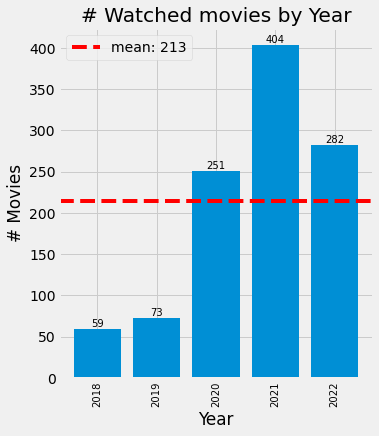

In [26]:
# Plot watched by year
plot_watched_movies(df_all_watched)

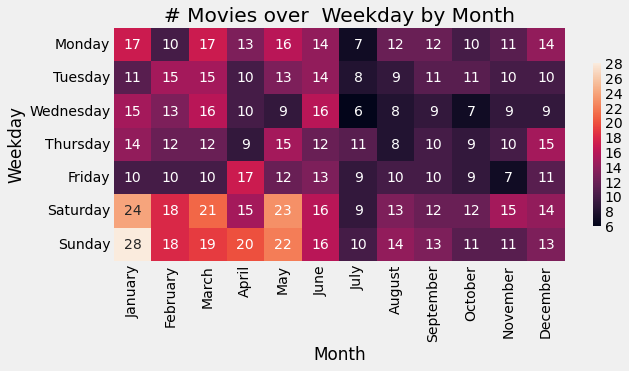

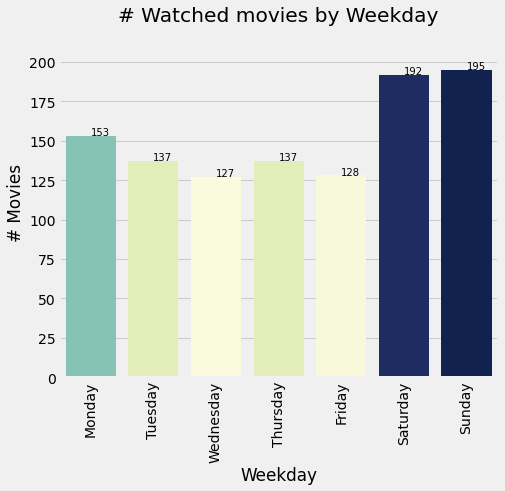

36% of the movies were watched on the weekend!


In [27]:
# Plot overview by month and weekday
plot_heatmap(df, 'Weekday', None)
plot_weekday_bar(df, None)

---

### Only Movies 

In [28]:
# Movies (only - no documentaries) by year
df_movies_year, df_show_movies = total_by_year(df)
# Difference from previous year
diff = '+/-'
df_show_movies[diff] = df_movies_year.diff().drop('Genre', axis=1).fillna(0).astype(int)
df_show_movies.style.background_gradient(cmap='RdBu', subset=diff)

### Only Documentaries

In [29]:
# Documentaries (only) by year
df_docs_year, df_show_docs = total_by_year(df, docs=True)
# Difference from previous year of documentaries watched
df_show_docs[diff] = df_docs_year.diff().drop('Genre', axis=1).fillna(0).astype(int)
df_show_docs.style.background_gradient(cmap='RdBu', subset=diff)

---

## By Year 

In [30]:
# Select columns
cols = ['Title','Year','Runtime','Genre','Director','imdbRating','Timestamp','Time']
# Create "by year" dataframe
df_byear = df[cols].copy()

In [31]:
# All (movies + documentaries) watched per day by year
[[movies_per_day(df_diff_watched_year, year)] for year in years];

0.16 movies per day in 2018
0.2 movies per day in 2019
0.69 movies per day in 2020
1.11 movies per day in 2021
1.04 movies per day in 2022


In [32]:
# All by month/year
ct_month_year = crosstab_by_year(df_byear).droplevel('Month', axis=1)
ct_month_year.style.background_gradient(axis=1, subset=ct_month_year.columns[:-1]) # evaluate by year

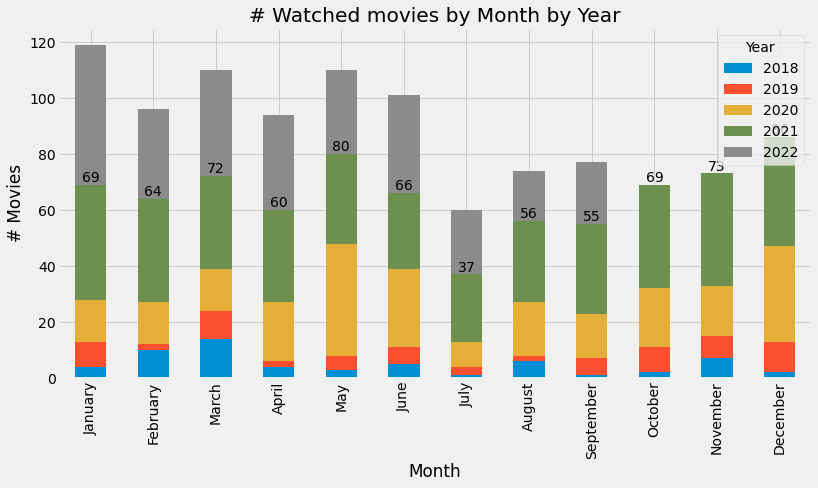

In [33]:
# Movies watched each month by year
plot_movies_month_by_year(df_byear)

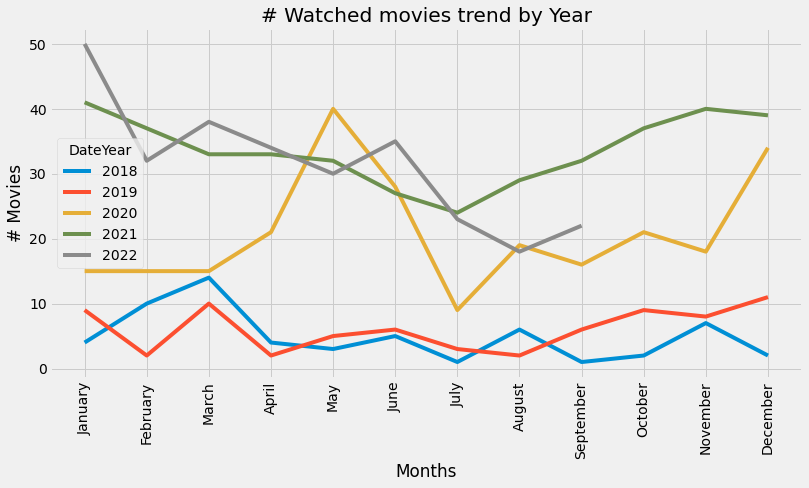

In [34]:
# Movies trend by year
plot_movies_trend(df_byear)

In [35]:
# Difference from previous year (movies & documentaries watched)
ct_month_year_diff = crosstab_by_year(df_byear).diff().drop('All').fillna(0).astype(int)
ct_month_year_diff = ct_month_year_diff.droplevel('Month', axis=1)
ct_month_year_diff.style.background_gradient(cmap='RdBu', subset=ct_month_year_diff.columns[:-1], axis=None) # evaluate by year

2018 



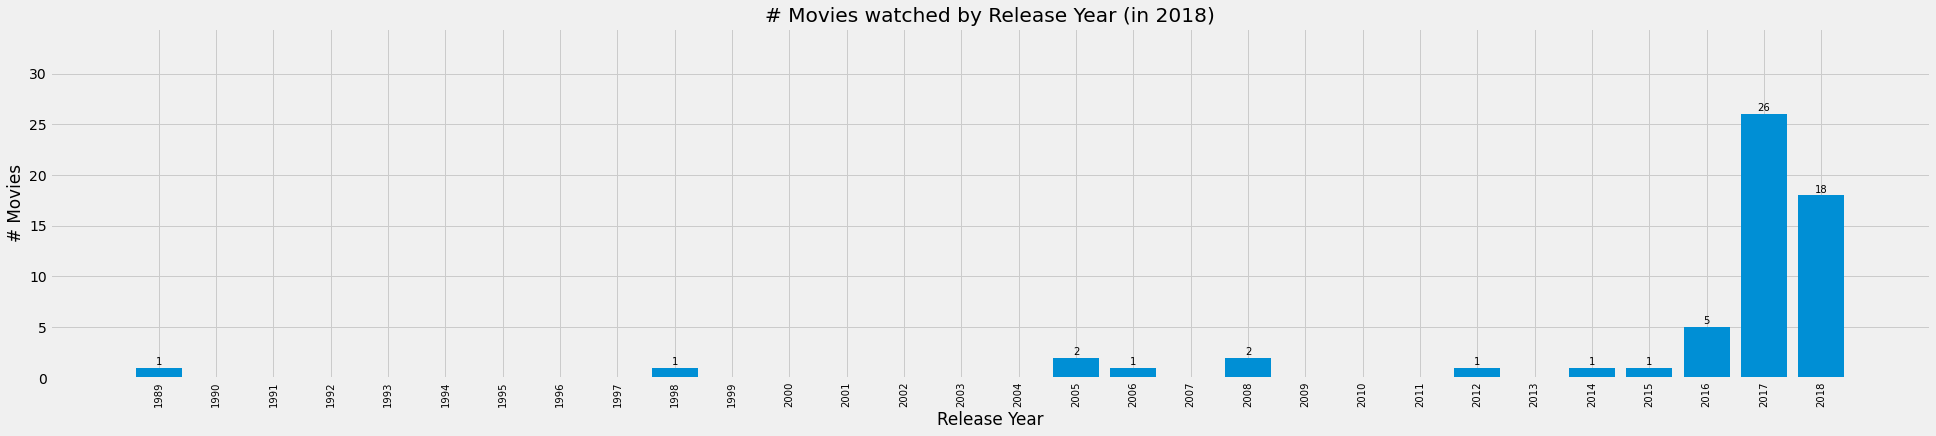

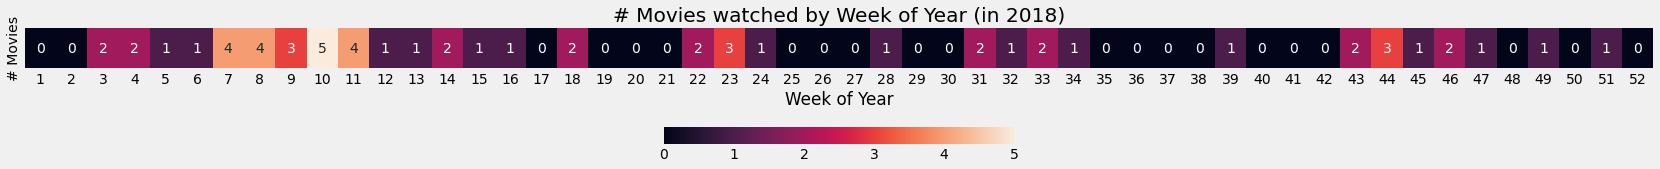

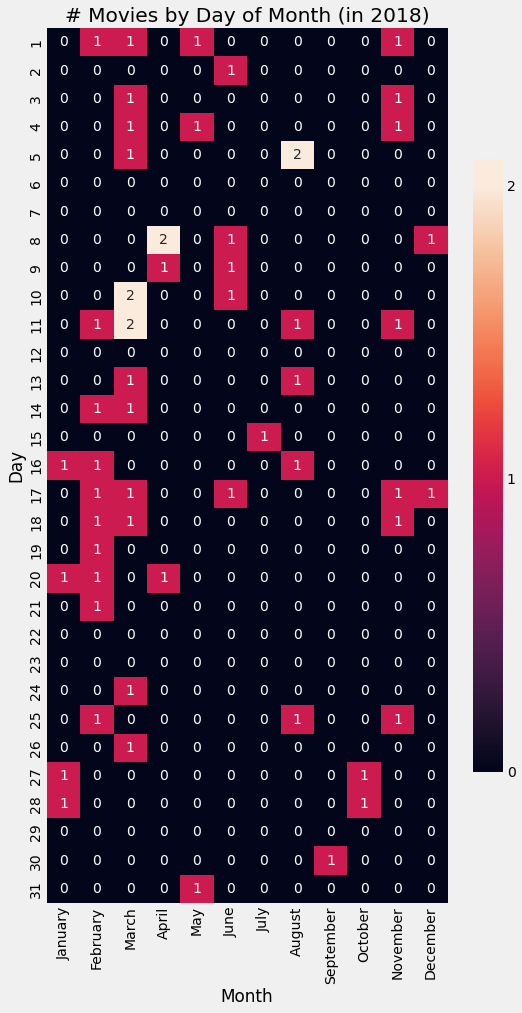

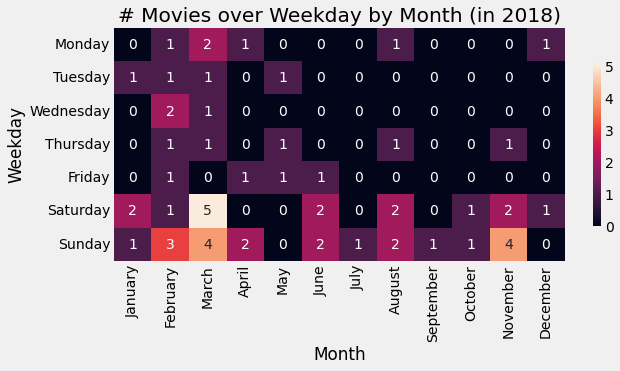

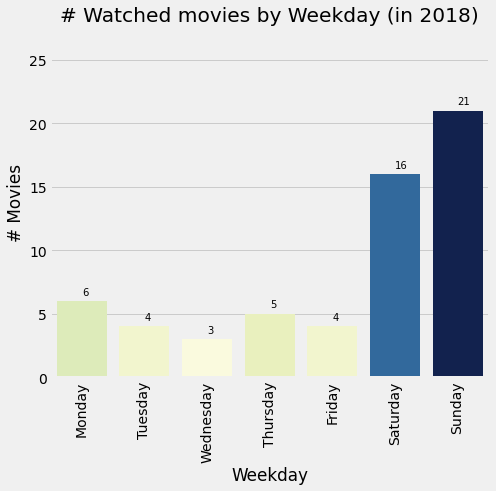

62% of the movies were watched on the weekend!



2019 



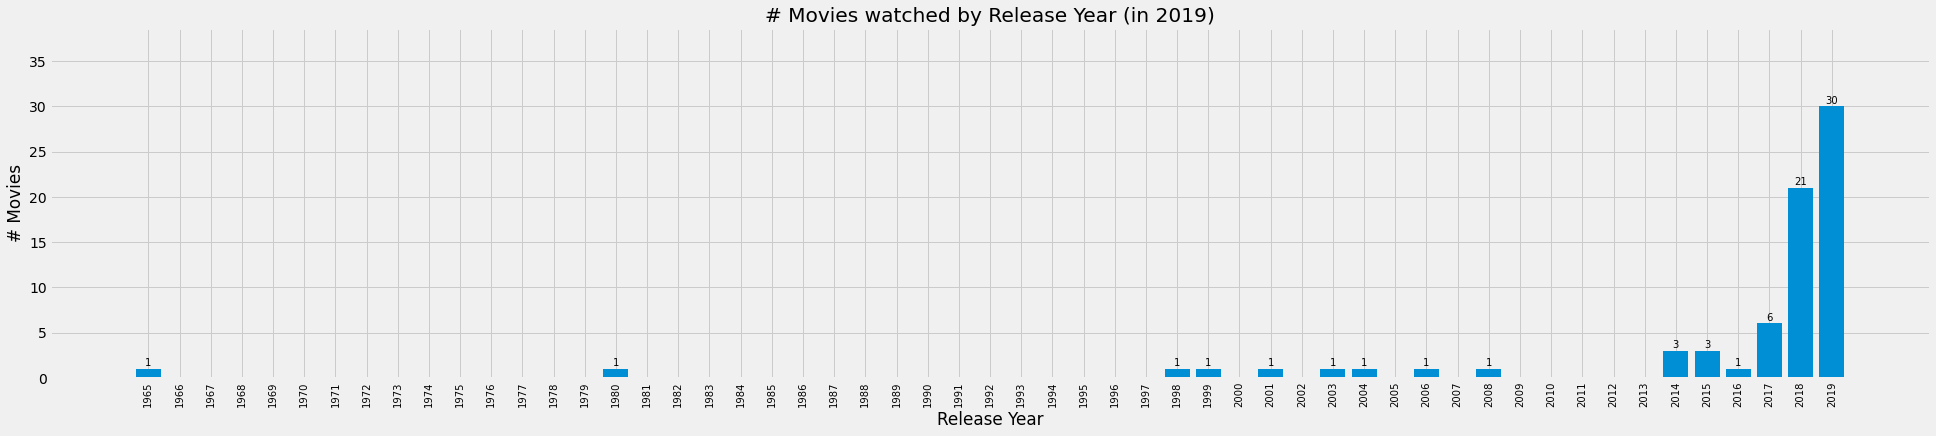

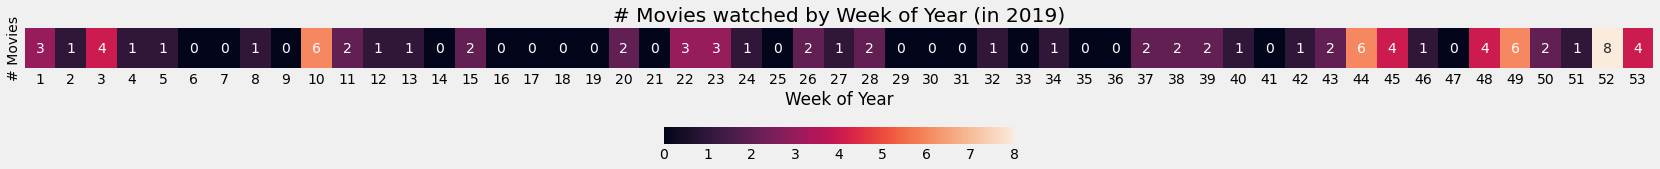

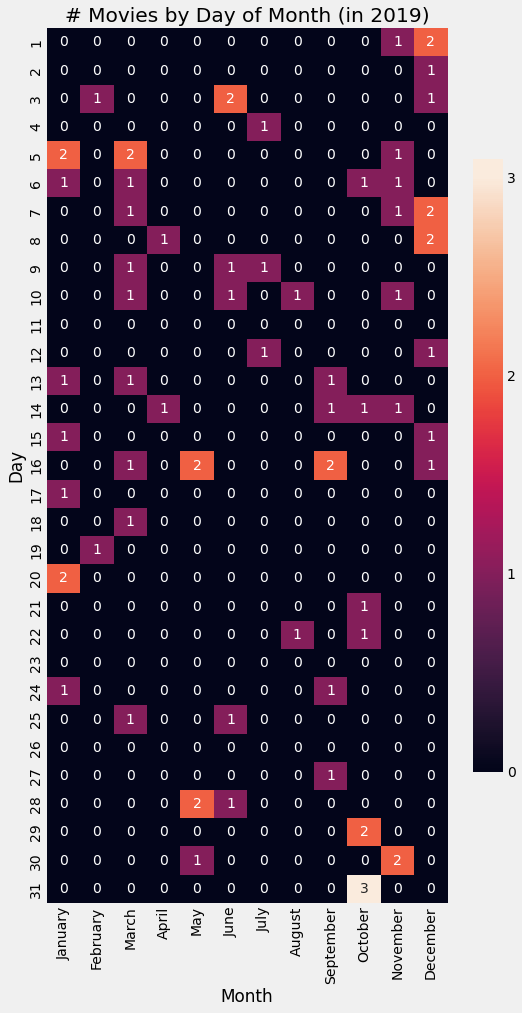

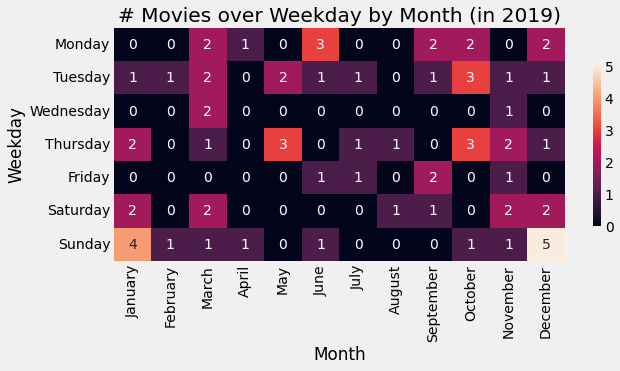

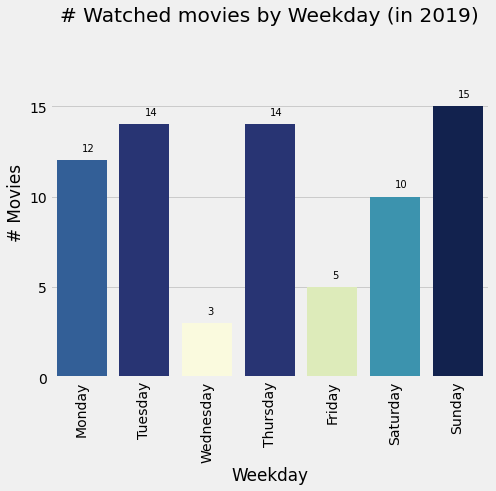

34% of the movies were watched on the weekend!



2020 



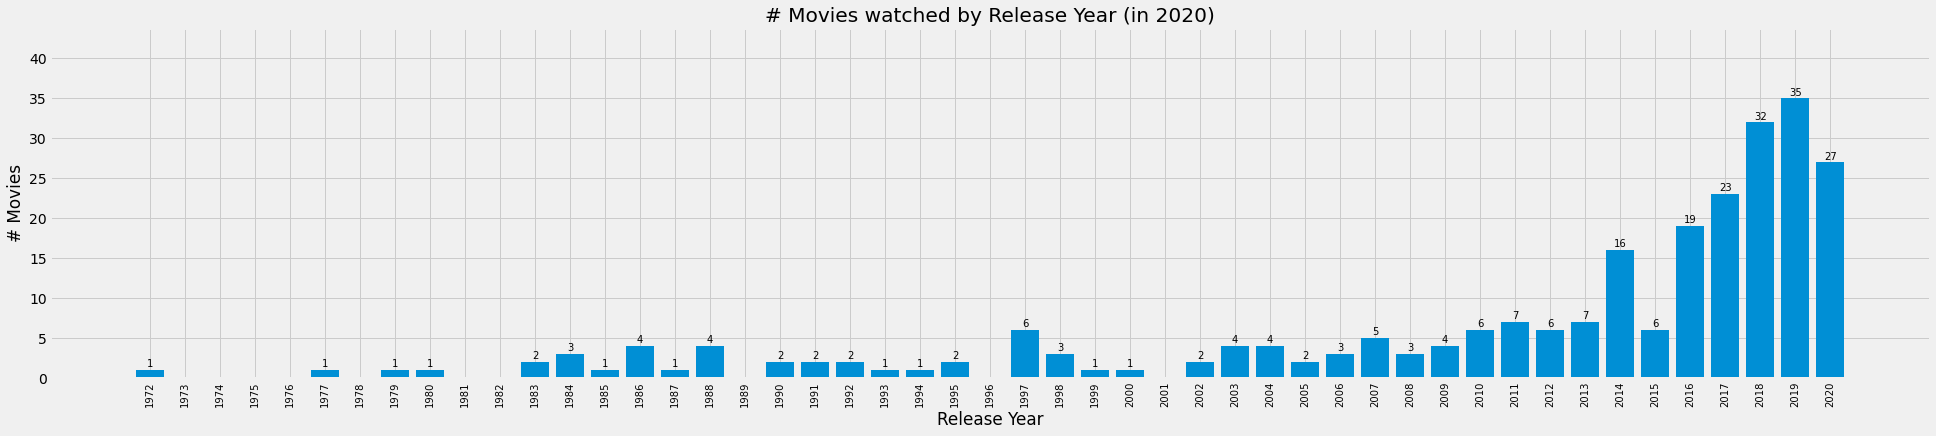

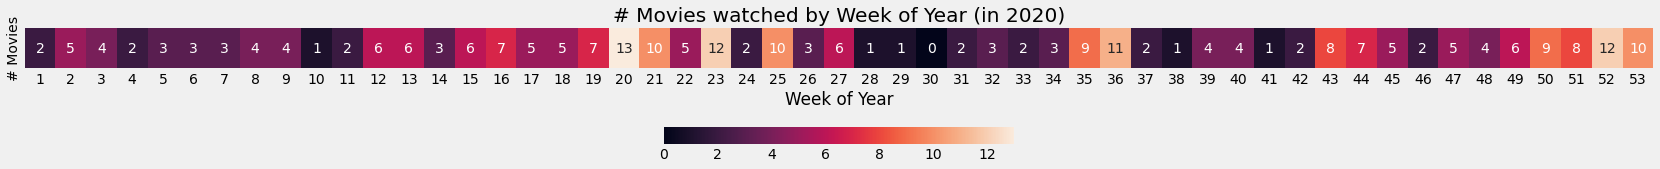

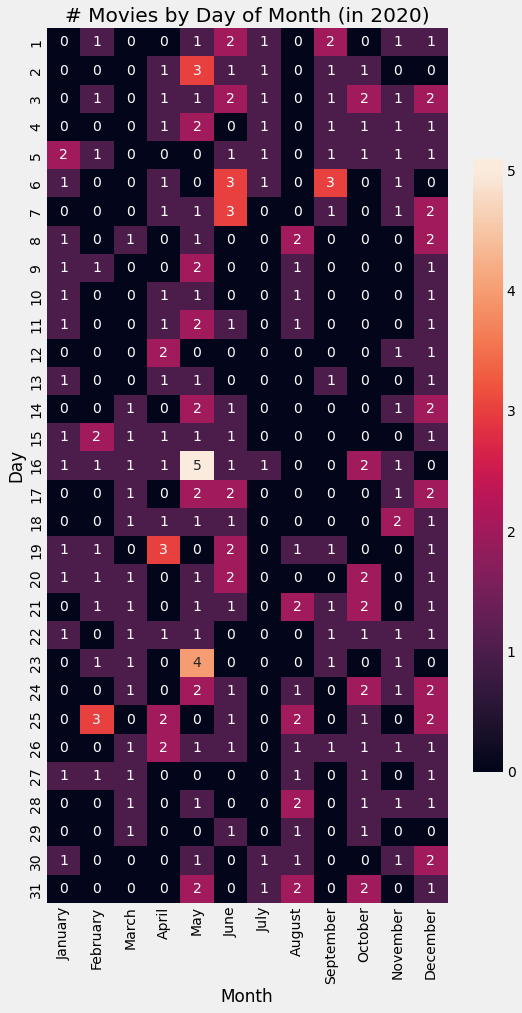

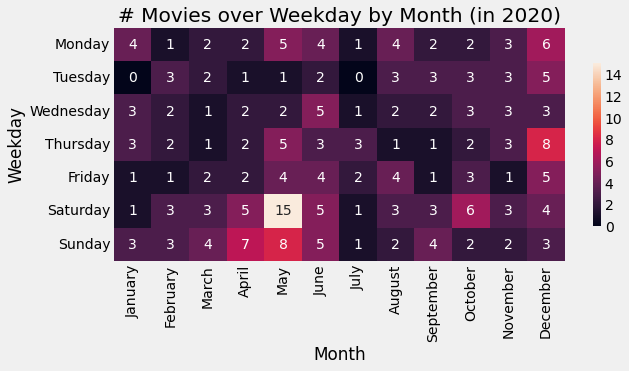

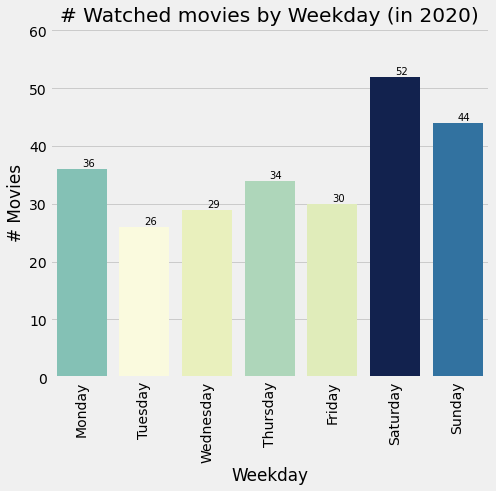

38% of the movies were watched on the weekend!



2021 



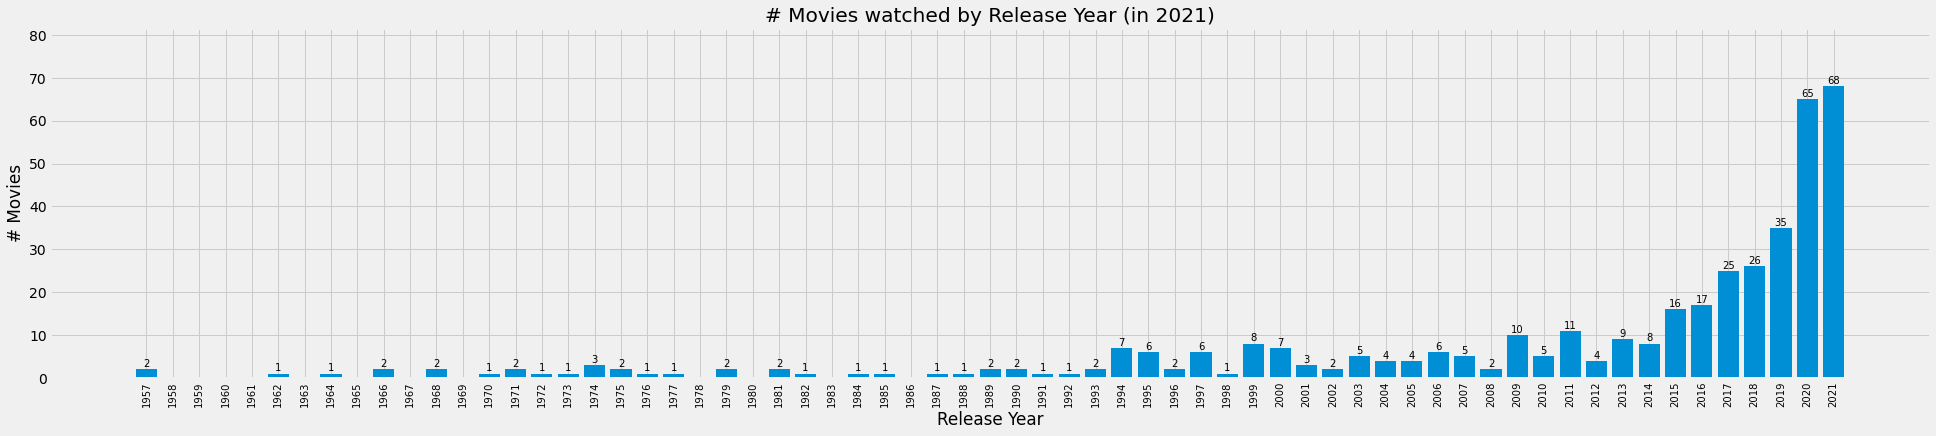

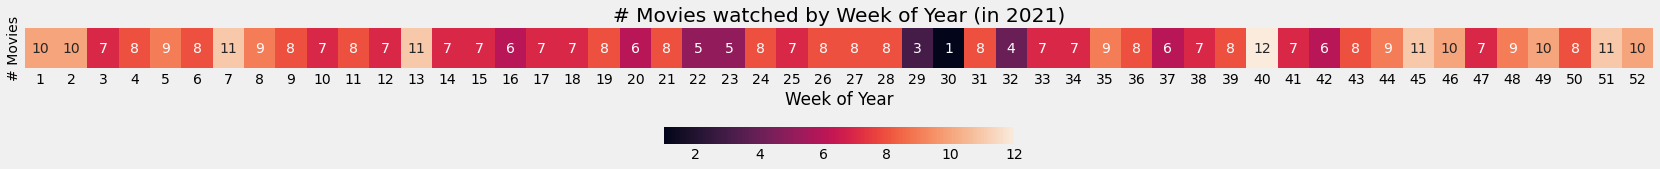

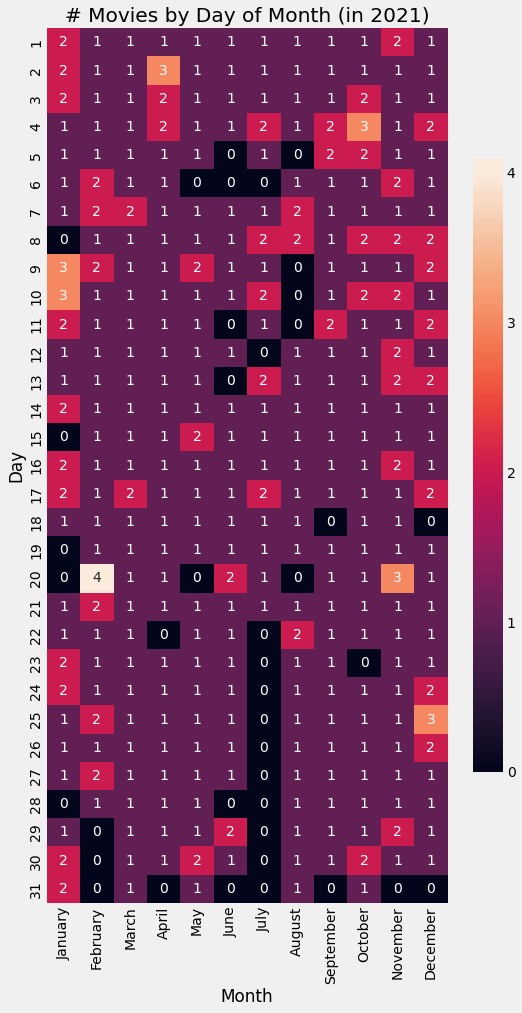

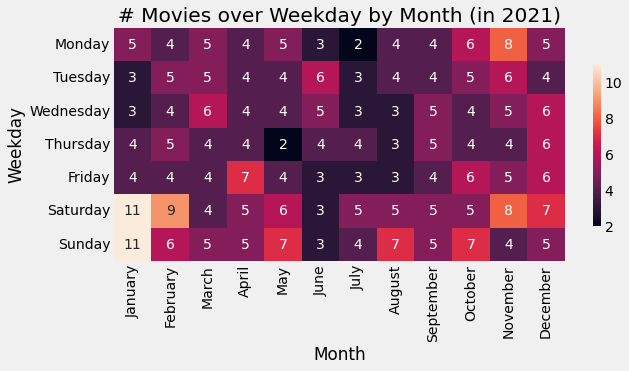

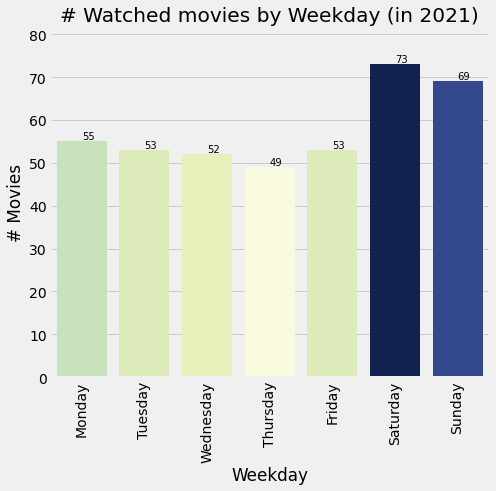

35% of the movies were watched on the weekend!



2022 



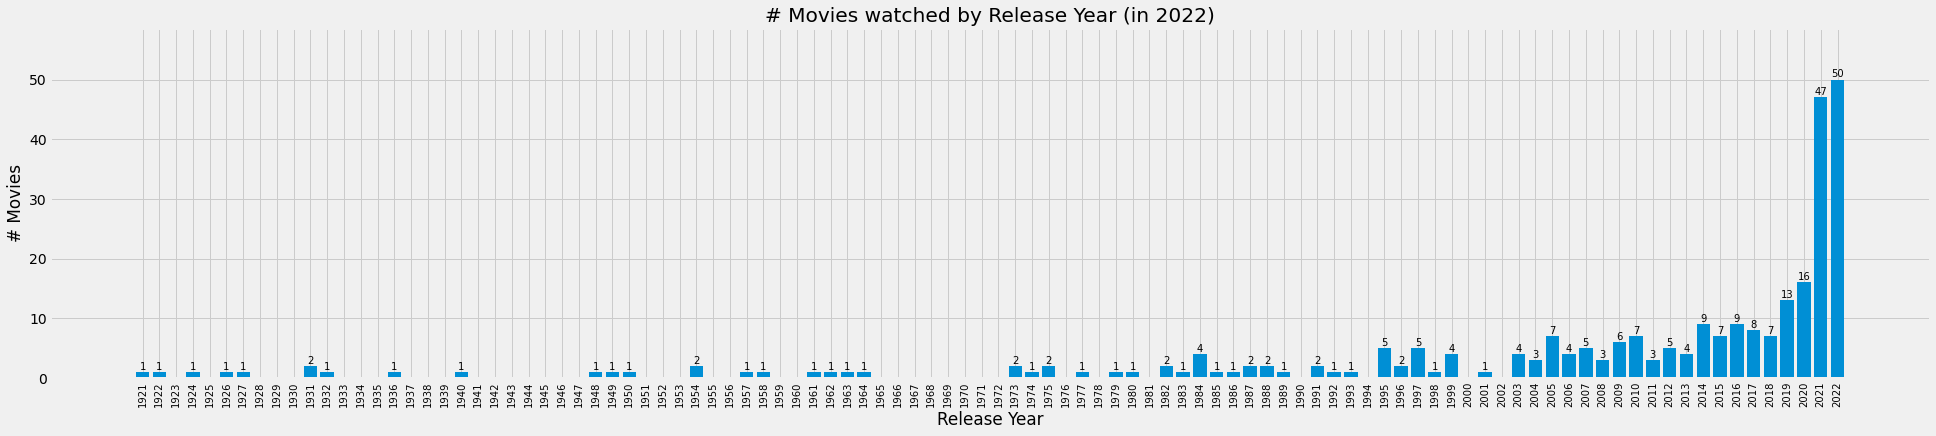

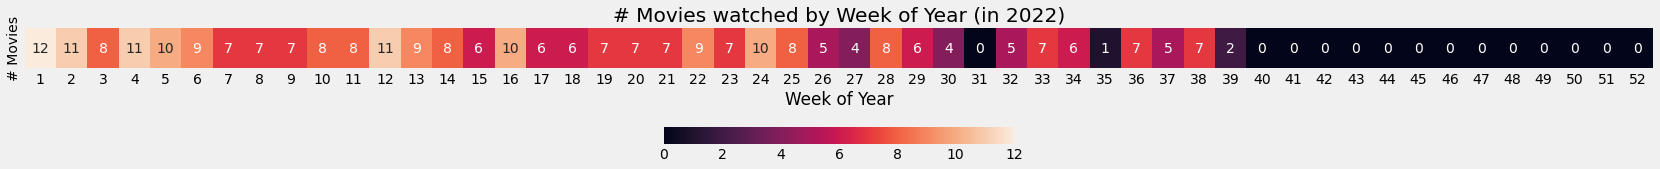

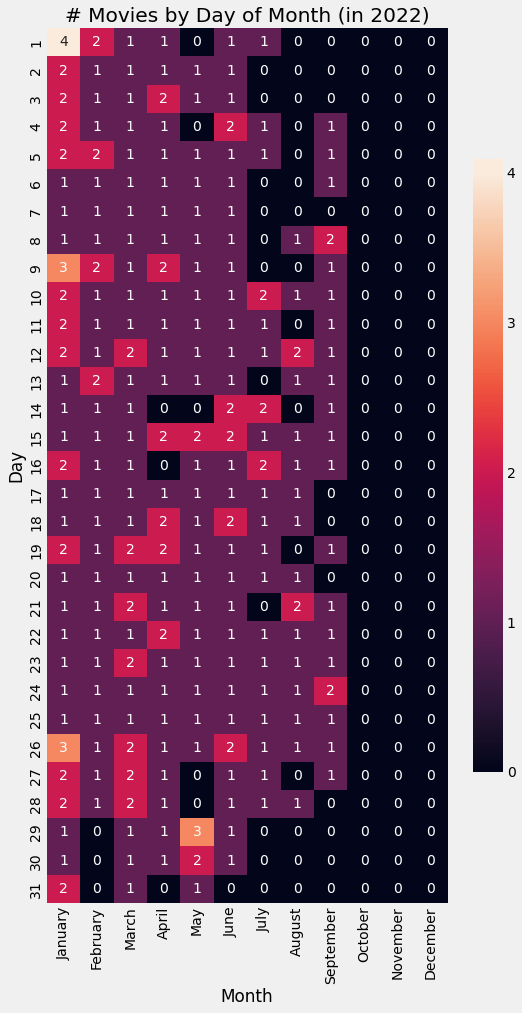

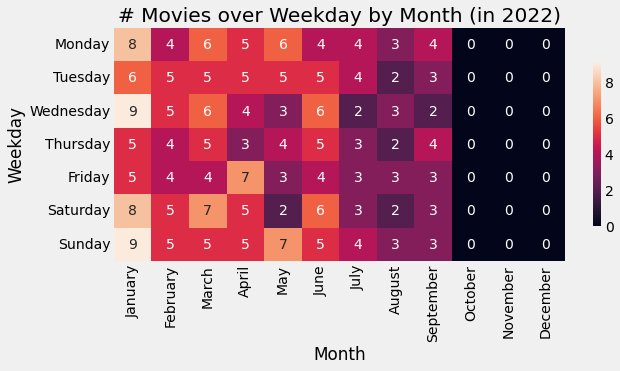

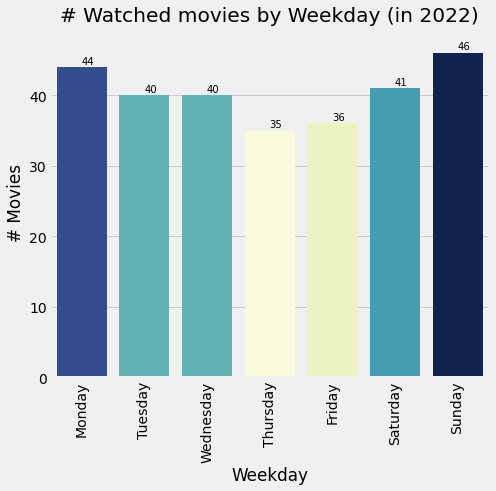

30% of the movies were watched on the weekend!





In [36]:
# Get overview by year
N = 10
df_top_movies = df_byear[~df_byear['Genre'].str.contains('Documentary')][~df_byear.duplicated(['Title','Year'], keep='first')]
# Plot
[
    [print(year,'\n'), 
     # Show top movies
     show_all(df_top_movies[df_top_movies['Timestamp'].dt.year == year].nlargest(N, 'imdbRating', keep='all')),
     # Show number of movies watched by release year
     plot_movie_trend(df_byear, year),
     # Show movies per week of year
     plot_week_bar(df_byear, year),
     # Show heatmap of number of movies watched by day by month
     plot_heatmap(df_byear, 'Month', year),
     # Show heatmap of number of movies watched by weekday by month
     plot_heatmap(df_byear, 'Weekday', year),
     ## Show number of hours watched by month 
     #plot_hour_month_bar(df_byear, year),
     # Show number of movies watched by weekday 
     plot_weekday_bar(df_byear, year), 
     plt.show(),
     print('\n\n')] 
    for year in years
];

In [37]:
# Movie release year stats, looking for release year median, mean and standard deviation
df_byear.groupby(df_byear['Timestamp'].dt.year).agg({'Year':['count', 'median', 'mean', 'std']}).astype(int)

Year                 
          count median  mean std
Timestamp                       
2018         59   2017  2015   5
2019         73   2018  2015   8
2020        251   2016  2011  10
2021        404   2017  2011  13
2022        282   2016  2007  21

In [38]:
# Total days without a movie watched
first_year = str(df_byear['Timestamp'].dt.year.min())
# Calendar - month days
calendar = pd.DataFrame({'date': pd.date_range(first_year+'-01', now, freq='M')})
calendar['daysinmonths'] = calendar['date'].apply(lambda t: pd.Period(t, freq='S').days_in_month)

print('Days without any movie watched:\n')
[[skip_days(df, calendar, year)] for year in years];

Days without any movie watched:

2018
By month: [27, 18, 19, 27, 28, 25, 30, 26, 29, 29, 23, 29]
Total: 310/365
84 %


2019
By month: [24, 26, 22, 28, 28, 25, 28, 29, 25, 25, 23, 23]
Total: 306/365
83 %


2020
By month: [17, 17, 16, 14, 7, 11, 22, 17, 17, 16, 13, 5]
Total: 172/366
46 %


2021
By month: [5, 0, 0, 1, 2, 5, 12, 5, 1, 1, 0, 2]
Total: 34/365
9 %


2022
By month: [0, 0, 0, 2, 5, 0, 11, 15]
Total: 33/243
13 %




In [39]:
# Days wiht most movies watched
df_byear = explode_date(df_byear)
N_MOVIES = 2
df_byear_movies = df_byear.groupby('Date').agg({'WeekdayName':'unique', 
                                                'Title':['count','; '.join], 
                                                'Time':list,
                                                'Runtime':[list,'sum']})

df_byear_movies[('WeekdayName','unique')] = df_byear_movies[('WeekdayName','unique')].map(lambda x : x[0])
show_all(df_byear_movies[df_byear_movies['Title']['count'] > N_MOVIES]) # days with more than 2 movies watched

In [40]:
# Best movies watched (based on imdbRating) by month
cols = ['Year','Month','MonthName','Title','imdbRating','DateYear']
SHOW = 3 # show how many movies

# Remove duplicates and group by year, month and monthname
df_movies_by_month = df_byear[~df_byear.duplicated(['Title','Year'], keep='first')][cols]
df_movies_by_month = df_movies_by_month.groupby(['DateYear','Month','MonthName'], as_index=False)
# Select best movies by month
df_best_movies_by_month = df_movies_by_month.apply(lambda x: x.nlargest(SHOW, 'imdbRating', keep='last'))
df_best_movies_by_month = pd.crosstab(index=df_best_movies_by_month['DateYear'], 
                                      columns=[df_best_movies_by_month['Month'], df_best_movies_by_month['MonthName']],
                                      values=df_best_movies_by_month['Title'],
                                      aggfunc=' * '.join)
# Drop month (1 - 12) for visualization
df_best_movies_by_month = df_best_movies_by_month.droplevel('Month', axis=1)
show_all(df_best_movies_by_month)

In [41]:
# Average movie rating by Month
df_best_month = df_byear[~df_byear.duplicated(['Title','Year'], keep='first')][cols]
df_best_month = pd.crosstab(index=df_best_month['DateYear'], 
                            columns=[df_best_month['Month'], df_best_month['MonthName']], 
                            values=df_best_month['imdbRating'], 
                            aggfunc='mean')
# Drop month (1 - 12) for visualization
df_best_month = df_best_month.droplevel('Month', axis=1)
df_best_month.style.background_gradient(axis=1).set_precision(1) # evaluate by year

---

## Recent trend

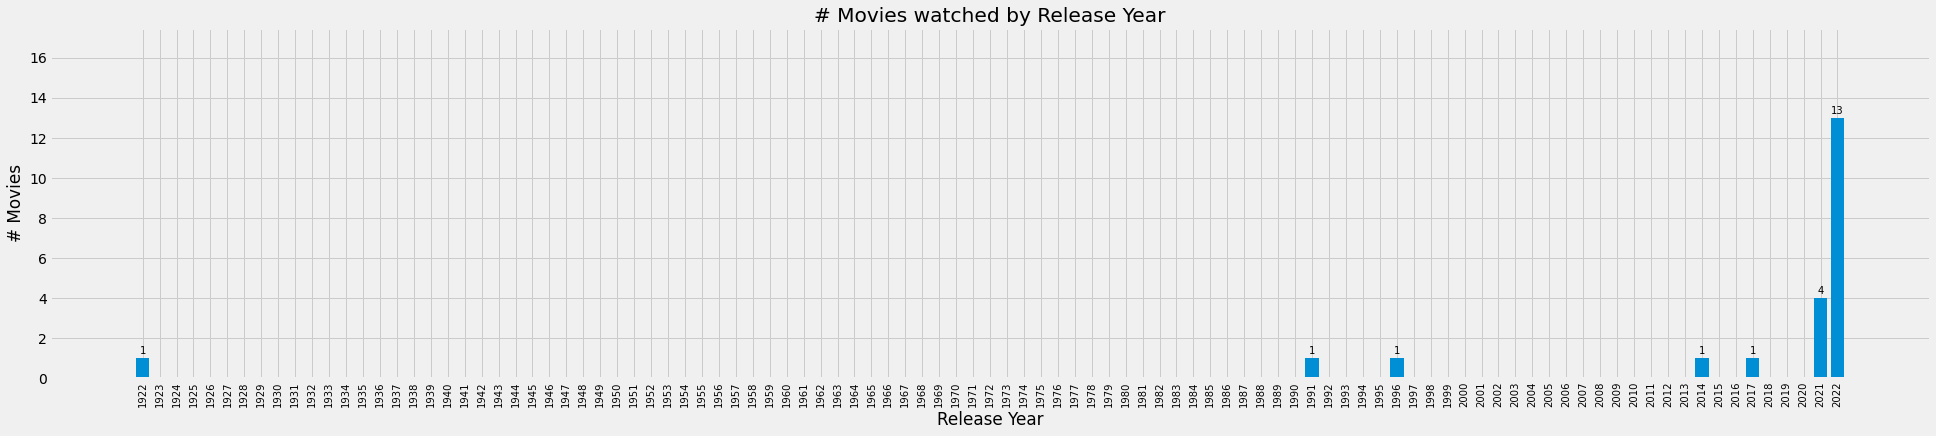

In [42]:
# Movies by release year (recent trend)
trend_start = dt.date(now.year, now.month, 1)
trend_aux = df[df.Timestamp.dt.date >= trend_start].copy()
# Create trend dataframe
LAST = 15
N = 5
# If current month's number of movies watched less than LAST, select LAST 
if trend_aux.shape[0] < LAST: 
    df_recent_trend = df.tail(LAST).copy()
else: 
    df_recent_trend = trend_aux
# Plot
plot_recent_trend = df_recent_trend.groupby(by='Year').agg({'Title': 'count'}).reset_index()
plot_movie_trend(plot_recent_trend)

In [43]:
# Recently watched
df_recent_trend.groupby(['Year','Title']).agg({'imdbRating':'mean', 
                                               'Genre':' '.join, 
                                               'Director':' '.join, 
                                               'Country':' '.join, 
                                               'Language':' '.join}) 

imdbRating  \
Year Title                                         
1922 Nosferatu                               7.9   
1991 The Silence of the Lambs                8.6   
1996 From Dusk Till Dawn                     7.2   
2014 Tusk                                    5.3   
2017 Only the Brave                          7.6   
2021 Marcel the Shell with Shoes On          8.0   
     Saloum                                  6.5   
     Silent Night                            5.7   
     The Medium                              6.5   
2022 Athena                                  6.8   
     Bodies Bodies Bodies                    6.5   
     Bullet Train                            7.5   
     Confess, Fletch                         6.5   
     Emily the Criminal                      6.7   
     Fall                                    6.4   
     Flux Gourmet                            5.9   
     Huesera                                 6.9   
     I Used to Be Famous                     6.7   
     Resurrection                            5.9   
     Speak No Evil                           6.6   
     Thor: Love and Thunder                  6.4   
     Three Thousand Years of Longing         6.8   

                                                                                  Genre  \
Year Title                                                                                
1922 Nosferatu                                                          Fantasy, Horror   
1991 The Silence of the Lambs                                    Crime, Drama, Thriller   
1996 From Dusk Till Dawn                                          Action, Crime, Horror   
2014 Tusk                                                                Comedy, Horror   
2017 Only the Brave                                            Action, Biography, Drama   
2021 Marcel the Shell with Shoes On           Animation, Comedy, Drama, Family, Fantasy   
     Saloum                                                            Horror, Thriller   
     Silent Night                                                 Comedy, Drama, Horror   
     The Medium                                                                  Horror   
2022 Athena                                                     Action, Drama, Thriller   
     Bodies Bodies Bodies                                      Comedy, Horror, Thriller   
     Bullet Train                                              Action, Comedy, Thriller   
     Confess, Fletch                                                      Comedy, Crime   
     Emily the Criminal                                          Crime, Drama, Thriller   
     Fall                                                                      Thriller   
     Flux Gourmet                                                 Comedy, Drama, Horror   
     Huesera                                                              Drama, Horror   
     I Used to Be Famous                                           Comedy, Drama, Music   
     Resurrection                               Crime, Drama, Horror, Mystery, Thriller   
     Speak No Evil                                              Drama, Horror, Thriller   
     Thor: Love and Thunder           Action, Adventure, Comedy, Fantasy, Romance, S...   
     Three Thousand Years of Longing                            Drama, Fantasy, Romance   

                                                    Director  \
Year Title                                                     
1922 Nosferatu                                   F.W. Murnau   
1991 The Silence of the Lambs                 Jonathan Demme   
1996 From Dusk Till Dawn                    Robert Rodriguez   
2014 Tusk                                        Kevin Smith   
2017 Only the Brave                          Joseph Kosinski   
2021 Marcel the Shell with Shoes On      Dean Fleischer-Camp   
     Saloum                                Jean Luc Herbulot   
     Silent Night           

In [44]:
# Movies by genre (recent trend)
gb_trend_genre = split_explode(df_recent_trend, 'Genre')
gb_trend_genre = gb_trend_genre.groupby(['Genre']).agg({'Title':'count'}).sort_values(['Title'], ascending=False)
gb_trend_genre.nlargest(N, 'Title', keep='first')

Title
Genre          
Drama        12
Horror       11
Comedy        9
Thriller      9
Action        5

In [45]:
# Movies by director (recent trend, sorted by count/imdbRating)
get_mean_value(df_recent_trend, 'Director', 'imdbRating').nlargest(N, ['Total', 'imdbRating'], keep='first')

Total                          Movies  imdbRating
Director                                                              
Jonathan Demme           1        The Silence of the Lambs         8.6
Dean Fleischer-Camp      1  Marcel the Shell with Shoes On         8.0
F.W. Murnau              1                       Nosferatu         7.9
Joseph Kosinski          1                  Only the Brave         7.6
David Leitch             1                    Bullet Train         7.5

In [46]:
# Movies by actor (recent trend, sorted by count/imdbRating)
get_mean_value(df_recent_trend, 'Actors', 'imdbRating').nlargest(N, ['Total', 'imdbRating'], keep='first')

Total                                             Movies  \
Actors                                                                     
Shoko Rice          2                   Emily the Criminal; Bullet Train   
Dante Alba          2               Thor: Love and Thunder; Bullet Train   
Idris Elba          2  Thor: Love and Thunder; Three Thousand Years o...   
Eric Presnall       2  Thor: Love and Thunder; Three Thousand Years o...   
Aiden Mckenzie      2  Thor: Love and Thunder; Three Thousand Years o...   

                imdbRating  
Actors                      
Shoko Rice             7.1  
Dante Alba             7.0  
Idris Elba             6.6  
Eric Presnall          6.6  
Aiden Mckenzie         6.6

In [47]:
# Movies by country (recent trend)
gb_trend_country = split_explode(df_recent_trend, 'Country')
gb_trend_country = gb_trend_country.groupby(['Country']).agg({'Title':'count'}).sort_values(['Title'], ascending=False)
gb_trend_country.nlargest(N, 'Title', keep='first')

Title
Country              
United States      14
United Kingdom      4
Australia           2
Mexico              2
Canada              1

In [48]:
# Movies by language (recent trend)
gb_trend_language = split_explode(df_recent_trend, 'Language')
gb_trend_language = gb_trend_language.groupby(['Language']).agg({'Title':'count'}).sort_values(['Title'], ascending=False)
gb_trend_language.nlargest(N, 'Title', keep='first')

Title
Language       
English      18
French        3
German        3
Spanish       3
Greek         2

### Previous month analysis

In [49]:
# Get year and month
year = now.year
# If January
if now.month == 1:
    year -= 1 # previous year
    previous_month = 12 # get December
else:
    previous_month = now.month-1

# Filter dataset and create previous_month dataframe
df_previous_month = df[(df['Timestamp'].dt.year == year) & (df['Timestamp'].dt.month == previous_month)].copy()
# Movies watched last month
print('Movies watched last month: ' + str(len(df_previous_month)))

Movies watched last month: 18


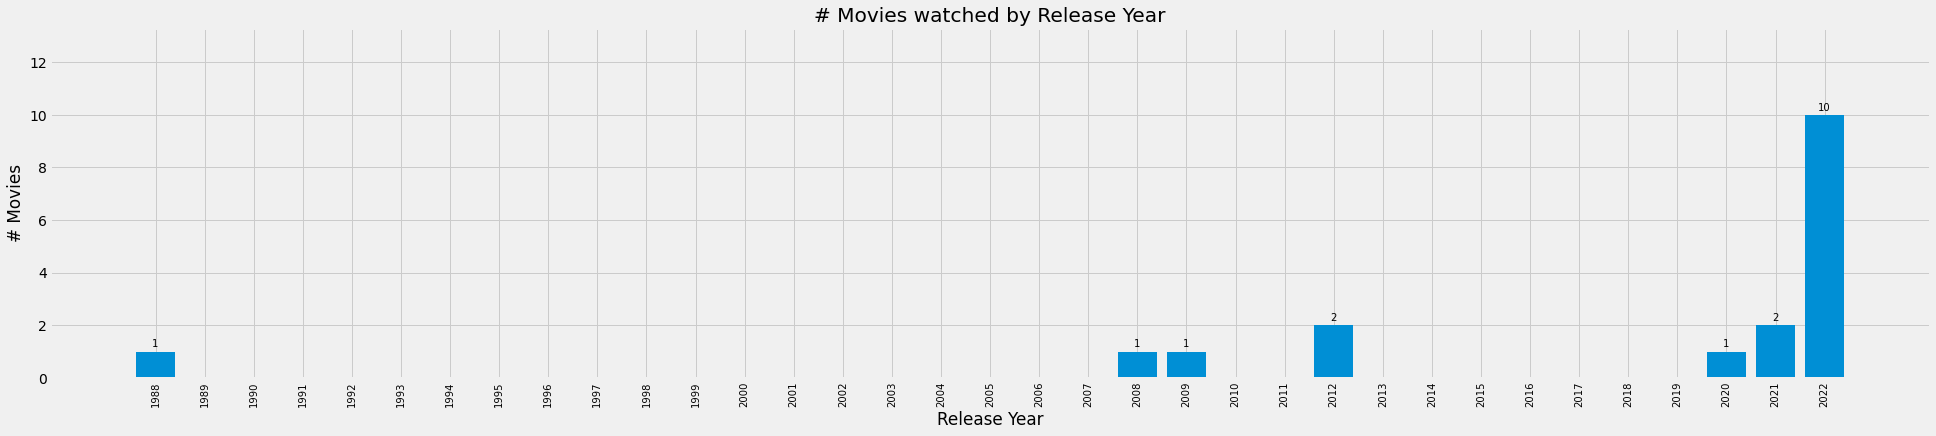

In [50]:
# Plot watched movies' release year trend
plot_previous_month = df_previous_month.groupby(by='Year').agg({'Title': 'count'}).reset_index()
plot_movie_trend(plot_previous_month)

In [51]:
# Last month
df_previous_month.groupby(['Year','Title']).agg({'imdbRating':'mean', 
                                                 'Genre':' '.join, 
                                                 'Director':' '.join, 
                                                 'Country':' '.join, 
                                                 'Language':' '.join}) 

imdbRating  \
Year Title                                 
1988 Beetlejuice                     7.5   
2008 The Midnight Meat Train         6.0   
2009 The Damned United               7.5   
2012 In the House                    7.4   
     The Battery                     6.3   
2020 Lapsis                          6.2   
2021 Mad God                         6.8   
     Wild Men                        6.5   
2022 Brian and Charles               6.6   
     Day Shift                       6.1   
     Decision to Leave               7.3   
     Elvis                           7.5   
     Nope                            7.0   
     Prey                            7.2   
     Spin Me Round                   5.3   
     Top Gun: Maverick               8.4   
     Vengeance                       6.8   
     Watcher                         6.3   

                                                                  Genre  \
Year Title                                                                
1988 Beetlejuice                                        Comedy, Fantasy   
2008 The Midnight Meat Train                  Horror, Mystery, Thriller   
2009 The Damned United                          Biography, Drama, Sport   
2012 In the House                              Drama, Mystery, Thriller   
     The Battery                               Adventure, Drama, Horror   
2020 Lapsis                            Drama, Mystery, Sci-Fi, Thriller   
2021 Mad God                         Animation, Fantasy, Horror, Sci-Fi   
     Wild Men                                                    Comedy   
2022 Brian and Charles                                           Comedy   
     Day Shift                Action, Comedy, Fantasy, Horror, Thriller   
     Decision to Leave         Crime, Drama, Mystery, Romance, Thriller   
     Elvis                                      Biography, Drama, Music   
     Nope                             Horror, Mystery, Sci-Fi, Thriller   
     Prey                       Action, Drama, Horror, Sci-Fi, Thriller   
     Spin Me Round                                               Comedy   
     Top Gun: Maverick                                    Action, Drama   
     Vengeance                                Comedy, Mystery, Thriller   
     Watcher                                    Drama, Horror, Thriller   

                                      Director                        Country  \
Year Title                                                                      
1988 Beetlejuice                    Tim Burton                  United States   
2008 The Midnight Meat Train   Ryûhei Kitamura  United States, United Kingdom   
2009 The Damned United              Tom Hooper                 United Kingdom   
2012 In the House                François Ozon                         France   
     The Battery                Jeremy Gardner                  United States   
2020 Lapsis                        Noah Hutton                  United States   
2021 Mad God                      Phil Tippett                  United States   
     Wild Men                  Thomas Daneskov                        Denmark   
2022 Brian and Charles              Jim Archer                 United Kingdom   
     Day Shift                      J.J. Perry                  United States   
     Decision to Leave          Park Chan-wook                    South Korea   
     Elvis                        Baz Luhrmann       United States, Australia   
     Nope                         Jordan Peele           United States, Japan   
     Prey                     Dan Trachtenberg                  United States   
     Spin Me Round                  Jeff Baena           United States, Italy   
     Top Gun: Maverick         Joseph Kosinski                  United States   
     Vengeance                      B.J. Novak                  United States   
     Watcher                       Chloe Okuno           United Arab Emirates   

                           

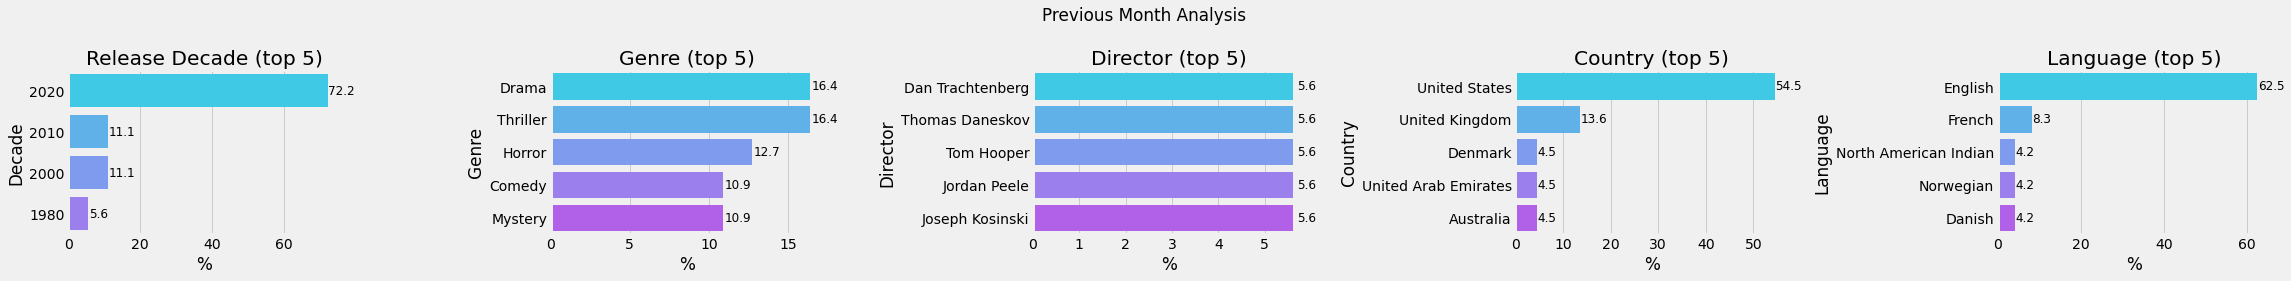

In [52]:
# Plot previous month's analysis
plot_previous_month_stats(df_previous_month, cols=['Genre','Director','Country','Language'])

In [53]:
# Top movies from each genre (based on rating)
# Select columns
cols = ['Title','Genre','imdbRating']
df_last_genres = df_previous_month[cols].copy()
# Explode values
df_last_genres['Genre'] = df_last_genres['Genre'].str.split(',').apply(lambda x: [e.strip() for e in x])
df_last_genres = explode(df_last_genres, ['Genre'])  
# Group by genre
df_last_genres_best = df_last_genres.groupby(['Genre','Title']).mean().sort_values(['Genre','imdbRating'], ascending=False)
df_last_genres_best = df_last_genres_best.groupby(level=0, as_index=False).apply(lambda x: x.nlargest(1, 'imdbRating', keep='all')).reset_index(level=0, drop=True)
show_all(df_last_genres_best)

In [54]:
# Movies by director (last month trend, sorted by count/imdbRating)
gb_previous_month_director = get_mean_value(df_previous_month, 'Director', 'imdbRating')
show_all(gb_previous_month_director.nlargest(N, ['Total', 'imdbRating'], keep='first'))

In [55]:
# Movies by actor (last month trend, sorted by count/imdbRating)
gb_previous_month_actor = get_mean_value(df_previous_month, 'Actors', 'imdbRating')
show_all(gb_previous_month_actor.nlargest(N, ['Total', 'imdbRating'], keep='first'))

In [56]:
# Movies by country (last month trend)
gb_previous_month_country = split_explode(df_previous_month, 'Country')
gb_previous_month_country = gb_previous_month_country.groupby(['Country']).agg({'Title':'count'}).sort_values(['Title'], ascending=False)
gb_previous_month_country.nlargest(N, 'Title', keep='first')

Title
Country              
United States      12
United Kingdom      3
Australia           1
Denmark             1
France              1

In [57]:
# Movies by language (last month trend)
gb_previous_month_language = split_explode(df_previous_month, 'Language')
gb_previous_month_language = gb_previous_month_language.groupby(['Language']).agg({'Title':'count'}).sort_values(['Title'], ascending=False)
gb_previous_month_language.nlargest(N, 'Title', keep='first')

Title
Language       
English      15
French        2
Chinese       1
Danish        1
Korean        1

---

## Release Year

In [58]:
# Select columns
cols = ['Title','Year','Runtime','Genre','Director','Metascore','imdbRating','imdbVotes','Date']
# Create release year dataframe
df_release_year = df[cols].copy()

In [59]:
# Last watched movies
N = 10
df_release_year[['Title','Year']].tail(N)

Title  Year
1059           Confess, Fletch  2022
1060       From Dusk Till Dawn  1996
1061             Speak No Evil  2022
1062                      Tusk  2014
1063              Flux Gourmet  2022
1064                    Athena  2022
1065       I Used to Be Famous  2022
1066            Only the Brave  2017
1067              Bullet Train  2022
1068  The Silence of the Lambs  1991

### Movie stats

In [60]:
# General stats by release year
df_group_year = df_release_year.groupby(by='Year').agg({'Title': 'count',
                                                        'Runtime': 'mean',
                                                        'imdbRating': 'mean'}
                                                      ).sort_values(by=['Title'], ascending=False).round(1)

df_group_year['Runtime'] = df_group_year['Runtime'].round(0).astype(int)
show_all(df_group_year.style.background_gradient(subset='imdbRating').set_precision(1))

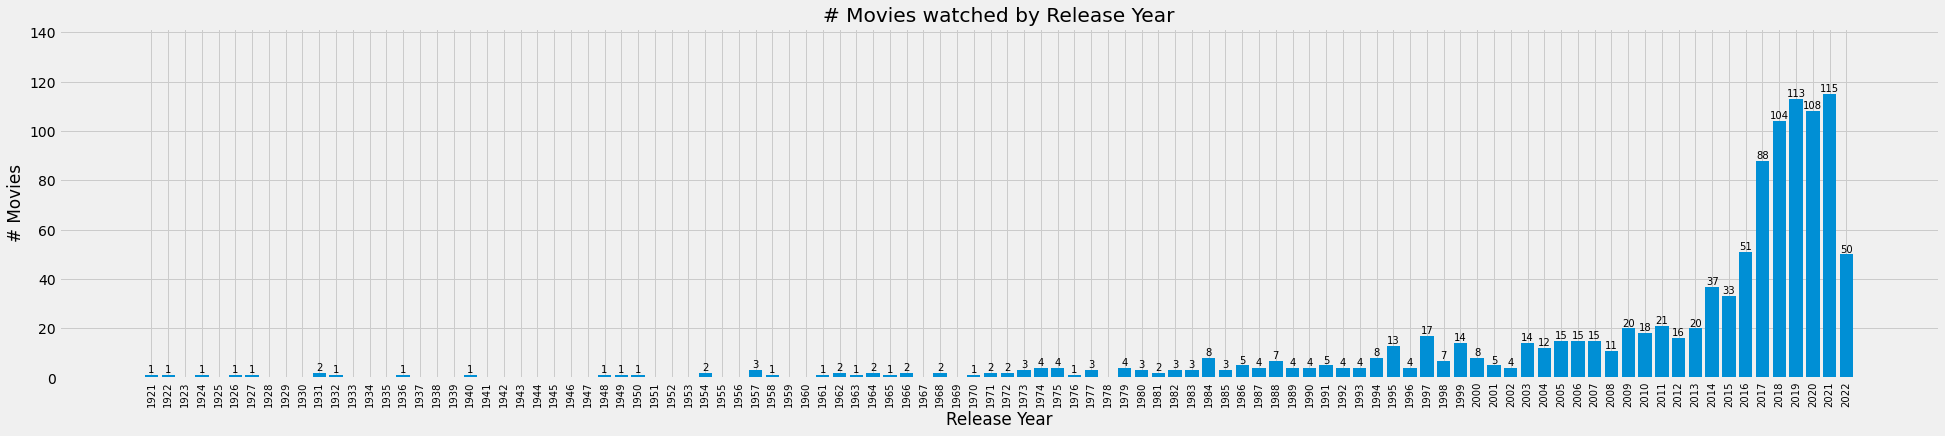

In [61]:
# Number of movies by release year
plot_movies_year = df_group_year.reset_index().sort_values('Year')
plot_movie_trend(plot_movies_year)

### Search

In [62]:
# Search movies by release year
YEAR = 2002

try:
    show_all(df_release_year.groupby(by='Year').get_group(YEAR))
except KeyError:
    print('No movies from ' + str(YEAR) + '!')

In [63]:
# Movies watched from current year (release year == current year)
n_movies = len(df_release_year[df_release_year['Year'] == current_year])

if n_movies != 0:
    print('Movies from ' + str(current_year) + ': ' + str(n_movies))   
    df_latest_year = df_release_year.groupby(by='Year').get_group(current_year)[df_release_year.Year == current_year].drop_duplicates('Title')
    df_latest_year = df_latest_year.sort_values(['imdbRating','imdbVotes'], ascending=[False, False])    
    show_all(df_latest_year)
else:
    print('No movies from the current year.')

Movies from 2022: 50


### Best movies

In [64]:
# Best movies by release year
cols = ['Title','Year','Runtime','imdbRating']
condition = 'Documentary' # remove this genre
mask = df_release_year['Genre'].str.contains(condition)
BEST = 3

df_top_movies_year = df_release_year[~mask][cols].groupby(['Year','Title']).mean().sort_values(['Year','imdbRating'], ascending=False)
df_top_movies_year = df_top_movies_year.groupby(level=0, as_index=False).apply(lambda x: x.nlargest(BEST, 'imdbRating', keep='all')).reset_index(level=0, drop=True)
df_top_movies_year['Runtime'] = df_top_movies_year['Runtime'].astype(int)
show_all(df_top_movies_year.style.background_gradient(subset='imdbRating').set_precision(1))

In [65]:
# Top documentaries by Release Year
df_top_docs_year = df_release_year[mask][cols].groupby(['Year','Title']).mean().sort_values(['Year','imdbRating'], ascending=False)
df_top_docs_year = df_top_docs_year.groupby(level=0, as_index=False).apply(lambda x: x.nlargest(BEST, 'imdbRating', keep='all')).reset_index(level=0, drop=True)
df_top_docs_year['Runtime'] = df_top_docs_year['Runtime'].astype(int)
show_all(df_top_docs_year.style.background_gradient(subset='imdbRating').set_precision(1))

### Genre

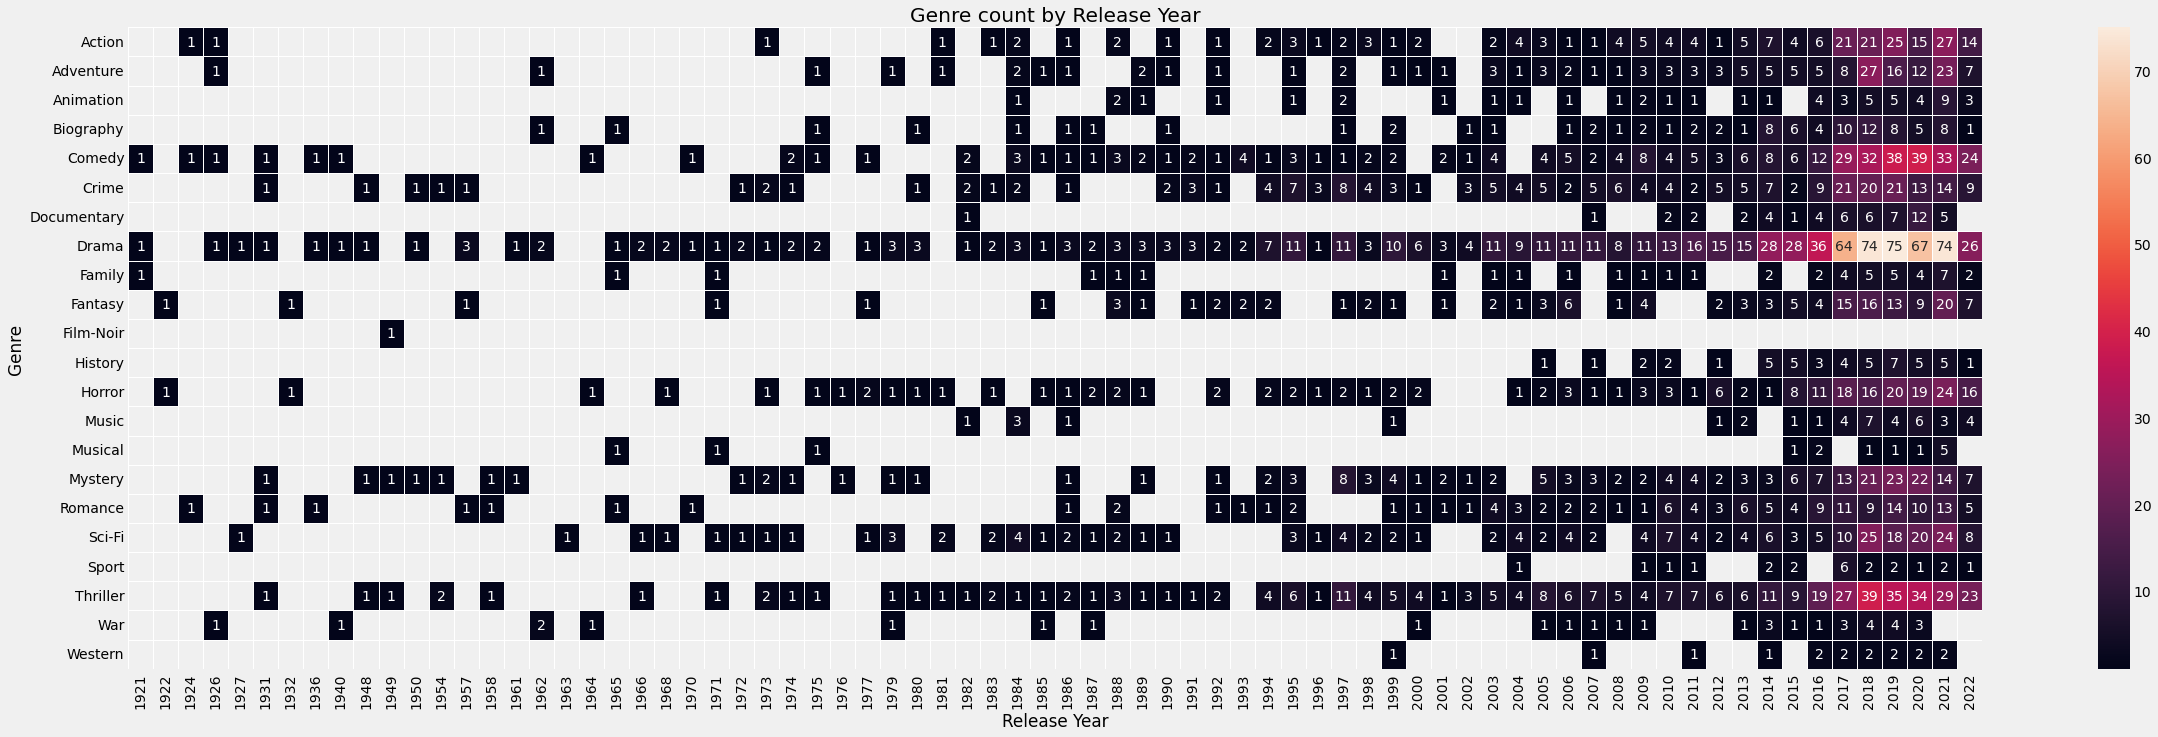

In [66]:
# Genre analysis by Release Year
df_genre_year = df_release_year.copy()
df_genre_year['Genre'] = df_genre_year['Genre'].str.split(',').apply(lambda x: [e.strip() for e in x])
# Explode genre values
plot_genre_year = explode(df_genre_year, ['Genre'])
plot_genre_year = plot_genre_year.groupby(['Year','Genre']).agg({'Title':'count'}).sort_values(['Year','Title'], ascending=False)
plot_ct_genre_year = plot_genre_year.unstack().T.reset_index().set_index('Genre').drop(['level_0'], axis=1)

# Plot
xsize = len(plot_ct_genre_year.columns) // 2
ysize = len(plot_ct_genre_year.index) // 2
_, ax = plt.subplots(figsize=(xsize,ysize))
ax = sns.heatmap(plot_ct_genre_year, annot=True, linewidths=.5, ax=ax)
plt.title('Genre count by Release Year')
plt.xlabel('Release Year')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

### Runtime

In [67]:
# Prepare for plotting
year_list = plot_movies_year['Year']
x = 'Year'

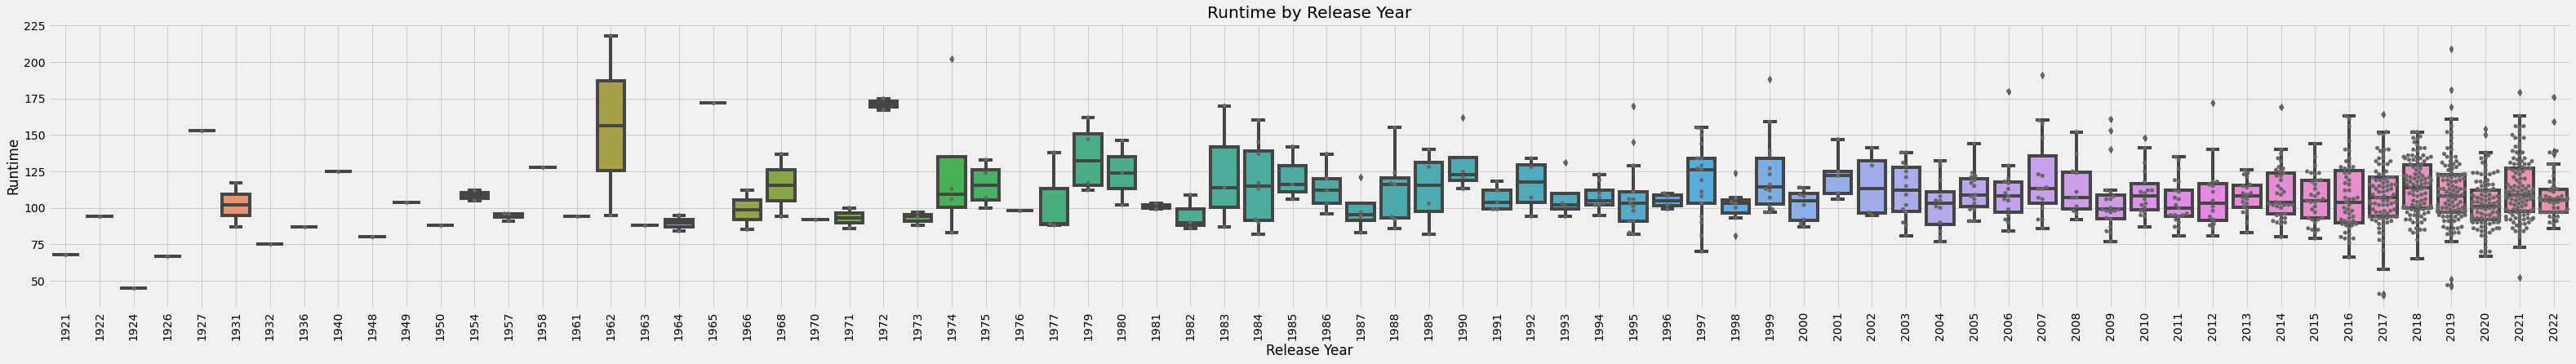

In [68]:
# Runtime by Release Year
y = 'Runtime'
plot_box_swarm(x, y, df, year_list)

In [69]:
# Time spent watching movies
runtime = df_release_year['Runtime'].sum()

print(runtime.astype(int), 'minutes')
print((runtime / 60).astype(int), 'hours')
print((runtime / (60*24)).astype(int), 'days')

117410 minutes
1956 hours
81 days


### imdbRating

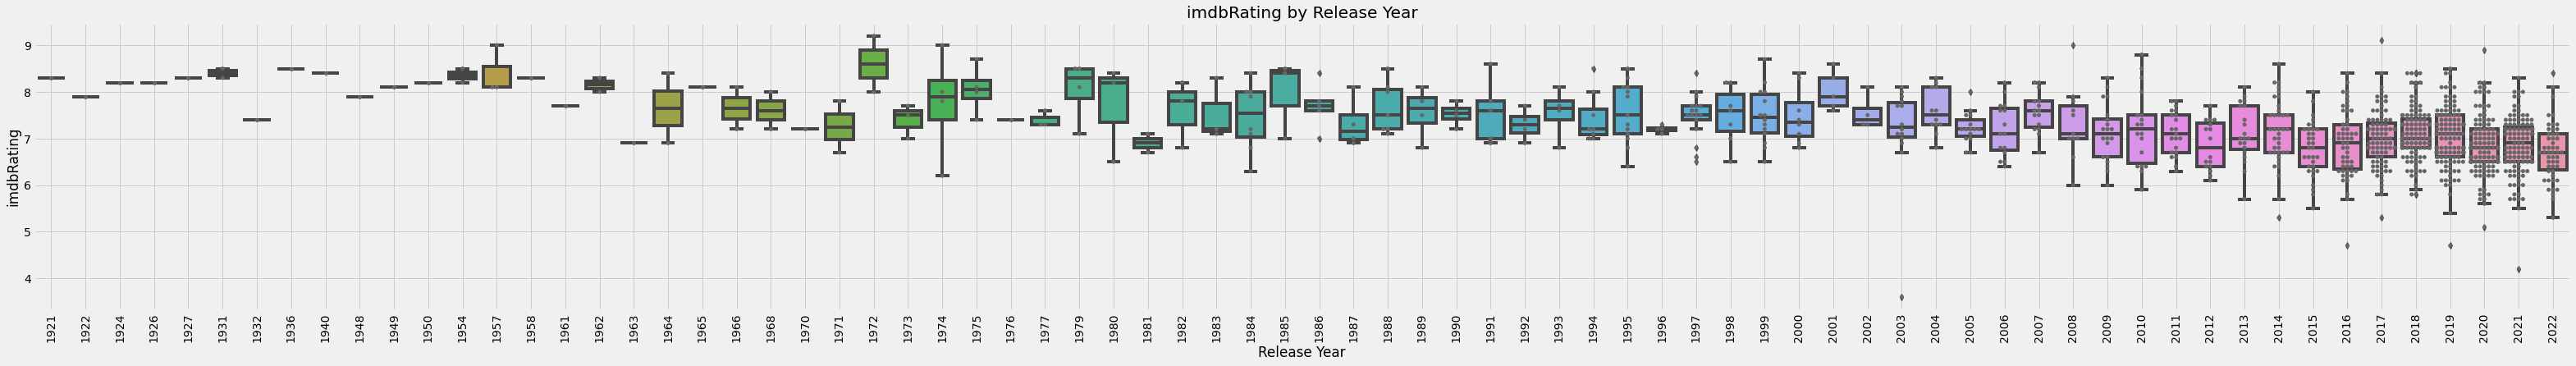

In [70]:
# imdbRating by Release Year
y = 'imdbRating'
plot_box_swarm(x, y, df, year_list)

### Decade

In [71]:
# Select columns
cols = ['Title', 'Year', 'Runtime', 'imdbRating', 'Genre', 'Language']
# Create decade dataframe
df_decade = df[cols].copy()

In [72]:
# Movies by Decade
df_decade['Decade'] = df_decade['Year'].astype(int)//10*10 # convert to decade
movies_decade = df_decade.groupby('Decade').agg({'Title': 'count', 
                                                 'Runtime': 'mean',
                                                 'imdbRating': 'mean'}).round(1)

movies_decade['Runtime'] = movies_decade['Runtime'].round(0).astype(int)
movies_decade.style.background_gradient(subset='imdbRating').set_precision(1)

#### Best movies

In [73]:
# Best movies (higher imdbRating) by Decade
condition = 'Documentary' # filter this out
mask = df_decade['Genre'].str.contains(condition)
BEST = 3

df_top_rating_decade = df_decade[~mask] # filter 
df_top_rating_decade = df_top_rating_decade.drop_duplicates(subset=['Title','Year'], keep='first')
df_top_rating_decade = df_top_rating_decade.set_index(['Decade','Title']).sort_values(['Decade','imdbRating'], ascending=False)
df_top_rating_decade.groupby(level=0, as_index=False).apply(lambda x: x.nlargest(BEST, 'imdbRating', keep='all')).reset_index(level=0, drop=True)

Year  Runtime  \
Decade Title                                                               
1920   The Kid                                             1921       68   
       Metropolis                                          1927      153   
       Sherlock Jr.                                        1924       45   
       The General                                         1926       67   
1930   City Lights                                         1931       87   
       Modern Times                                        1936       87   
       M                                                   1931      117   
1940   The Great Dictator                                  1940      125   
       The Third Man                                       1949      104   
       Rope                                                1948       80   
1950   12 Angry Men                                        1957       96   
       Rear Window                                         1954      112   
       Vertigo                                             1958      128   
1960   Dr. Strangelove or: How I Learned to Stop Worry...  1964       95   
       Lawrence of Arabia                                  1962      218   
       The Sound of Music                                  1965      172   
       Persona                                             1966       85   
1970   The Godfather                                       1972      175   
       The Godfather: Part II                              1974      202   
       One Flew Over the Cuckoo's Nest                     1975      133   
1980   Cinema Paradiso                                     1988      155   
       Back to the Future                                  1985      116   
       The Shining                                         1980      146   
       Aliens                                              1986      137   
       Amadeus                                             1984      160   
       Come and See                                        1985      142   
1990   The Matrix                                          1999      136   
       The Silence of the Lambs                            1991      118   
       The Usual Suspects                                  1995      106   
       Léon: The Professional                              1994      110   
2000   The Dark Knight                                     2008      152   
       Spirited Away                                       2001      125   
       Memento                                             2000      113   
2010   Inception                                           2010      148   
       Interstellar                                        2014      169   
       Parasite                                            2019      132   
2020   Top Gun: Maverick                                   2022      130   
       Spider-Man: No Way Home                             2021      148   
       The Father                                          2020       97   

                                                           imdbRating  \
Decade Title                                                            
1920   The Kid                                                    8.3   
       Metropolis                                                 8.3   
       Sherlock Jr.                                               8.2   
       The General                                                8.2   
1930   City Lights                                                8.5   
       Modern Times                                               8.5   
       M                                                          8.3   
1940   The Great Dictator                                         8.4   
       The Third Man                                              8.1   
       Rope                                                       7.9   
1950   12 Angry Men                                               

In [74]:
# Return cross-section
# Choose decade
DEC = 1960

try:
    show_all(df_top_rating_decade.xs(DEC))
except KeyError:
    print('No movies from ' + str(DEC) + ' decade!')

#### Genre

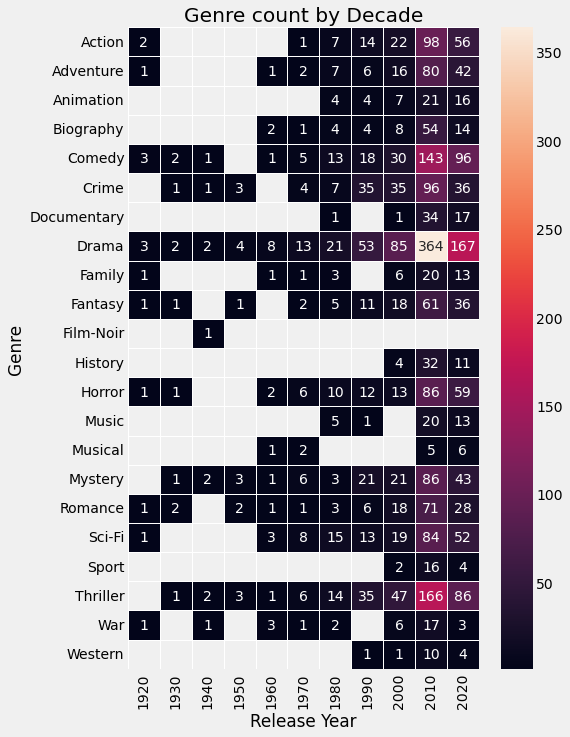

In [75]:
# Genre analysis by Decade
df_genre_decade = df_decade.copy()
df_genre_decade['Genre'] = df_genre_decade['Genre'].str.split(',').apply(lambda x: [e.strip() for e in x])
# Explode genre values
plot_genre_decade = explode(df_genre_decade, ['Genre'])
plot_genre_decade = plot_genre_decade.groupby(['Decade','Genre']).agg({'Title':'count'}).sort_values(['Decade','Title'], ascending=False)
plot_ct_genre_decade = plot_genre_decade.unstack().T.reset_index().set_index('Genre').drop(['level_0'], axis=1)

# Plot
xsize = len(plot_ct_genre_decade.columns) // 1.5
ysize = len(plot_ct_genre_decade.index) // 2
_, ax = plt.subplots(figsize=(xsize,ysize))
sns.heatmap(plot_ct_genre_decade, annot=True, linewidths=.5, ax=ax, fmt='g') # fmt='g' removes scientific notation
plt.title('Genre count by Decade')
plt.xlabel('Release Year')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

#### Runtime

In [76]:
# Prepare for plotting
x = 'Decade'
decade_list = df_decade.sort_values('Decade').Decade.unique()

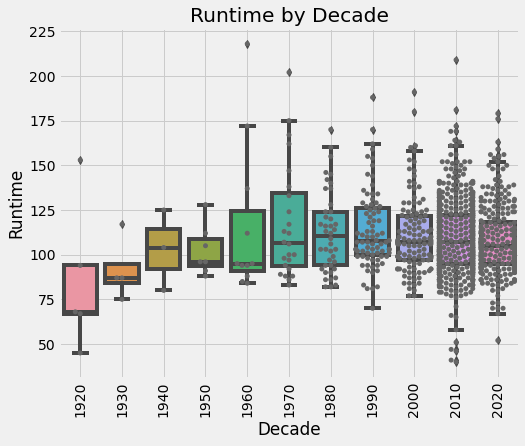

In [77]:
# Runtime by Decade
y = 'Runtime'
plot_box_swarm(x, y, df_decade, decade_list)

#### imdbRating

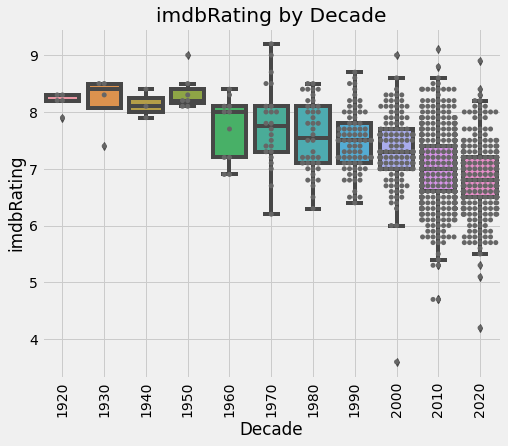

In [78]:
# imdbRating by Decade
y = 'imdbRating'
plot_box_swarm(x, y, df_decade, decade_list)

## Rated

In [79]:
# United States movie ratings (Rated). If not avaliable, return 'Not Rated'.

In [80]:
# Select columns
cols = ['Title','Rated','Runtime','Genre','imdbRating']
# Create rated dataframe
df_rated = df[cols].copy()

In [81]:
# Movie analysis by Rated
df_rated_avg = get_mean_value(df_rated, 'Rated', 'Runtime')
df_rated_avg['imdbRating'] = get_mean_value(df_rated, 'Rated', 'imdbRating')['imdbRating']

In [82]:
# Unique Rated
print('Unique film ratings: ' + str(len(df_rated_avg.index)))
print(', '.join(df_rated_avg.index))

Unique film ratings: 18
R, Not Rated, PG-13, TV-MA, TV-14, PG, TV-PG, Unrated, Approved, G, TV-G, Passed, NC-17, GP, MA-17, TV-Y, TV-Y7, TV-Y7-FV


In [83]:
# Rated statistics
df_rated_avg

Total                                             Movies  Runtime  \
Rated                                                                          
R            509  The Killing of a Sacred Deer; Last Flag Flying...      113   
Not Rated    212  Closet Monster; Brawl in Cell Block 99; Hans Z...      100   
PG-13        159  Thor: Ragnarok; Logan Lucky; Loving Vincent; T...      118   
TV-MA        122  The Shape of Water; Closet Monster; Brawl in C...      111   
TV-14         86  Constantine; Pan's Labyrinth; The Dark Knight;...      117   
PG            80  Coco; Moana; Dead Poets Society; The Hitchhike...      108   
TV-PG         57  Coco; Moana; Ready Player One; Incredibles 2; ...      113   
Unrated       30  I Dream in Another Language; Requiem for a Dre...      106   
Approved      15  The Sound of Music; Rosemary's Baby; Dr. Stran...      113   
G             12  The Sound of Music; Toy Story 4; My Neighbor T...      104   
TV-G          11  Coco; Elf; Willy Wonka & the Chocolate Factory...       96   
Passed         8  Sherlock Jr.; The General; The Kid; City Light...       92   
NC-17          4  Chained; Natural Born Killers; The Dreamers; Kids      104   
GP             2  THX 1138; Dr. Strangelove or: How I Learned to...       90   
MA-17          1                                          Babyteeth      118   
TV-Y           1                                       Modern Times       87   
TV-Y7          1                                       Modern Times       87   
TV-Y7-FV       1                                 My Neighbor Totoro       86   

           imdbRating  
Rated                  
R                 7.1  
Not Rated         7.0  
PG-13             7.3  
TV-MA             7.0  
TV-14             7.6  
PG                7.6  
TV-PG             7.8  
Unrated           6.8  
Approved          8.2  
G                 7.9  
TV-G              8.0  
Passed            8.4  
NC-17             6.9  
GP                7.6  
MA-17             7.2  
TV-Y              8.5  
TV-Y7             8.5  
TV-Y7-FV          8.1

### Genre

In [84]:
# Create exploded rated - genre dataframe
df_explode_rated_genre = df_rated.copy()
df_explode_rated_genre = split_explode(df_explode_rated_genre, 'Genre')
df_explode_rated_genre = split_explode(df_explode_rated_genre, 'Rated')

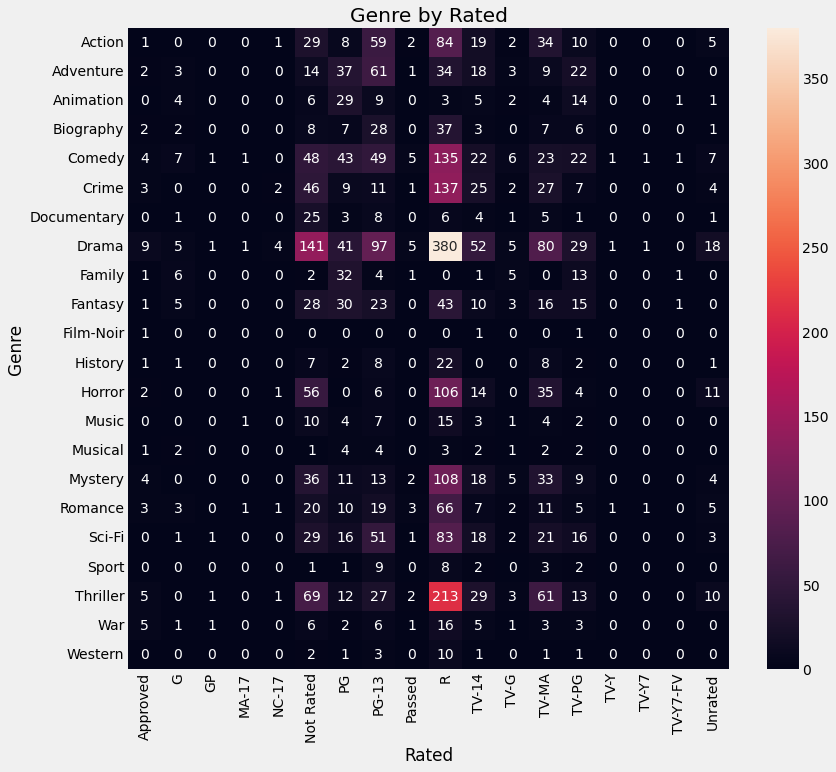

In [85]:
# Create crosstab to plot as heatmap
plot_ct_rated_genre = pd.crosstab(df_explode_rated_genre['Genre'], df_explode_rated_genre.Rated)
# Plot
xsize = len(plot_ct_rated_genre.columns) // 1.5
ysize = len(plot_ct_rated_genre.index) // 2
_, ax = plt.subplots(figsize=(xsize,ysize))
sns.heatmap(plot_ct_rated_genre, annot=True, fmt="d", ax=ax)
plt.title('Genre by Rated');

### Runtime

In [86]:
# Prepare for plotting
rated_list = df_rated_avg.index.sort_values()
x = 'Rated'

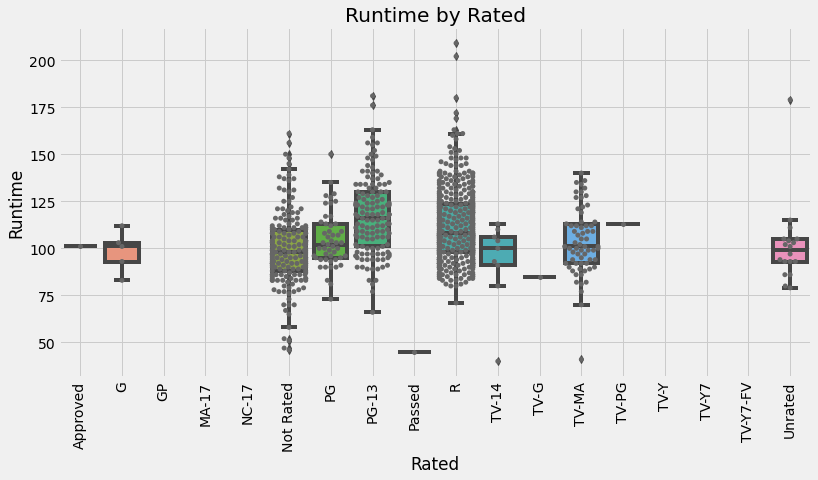

In [87]:
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
y = 'Runtime'
plot_box_swarm(x, y, df_rated, rated_list)

### imdbRating

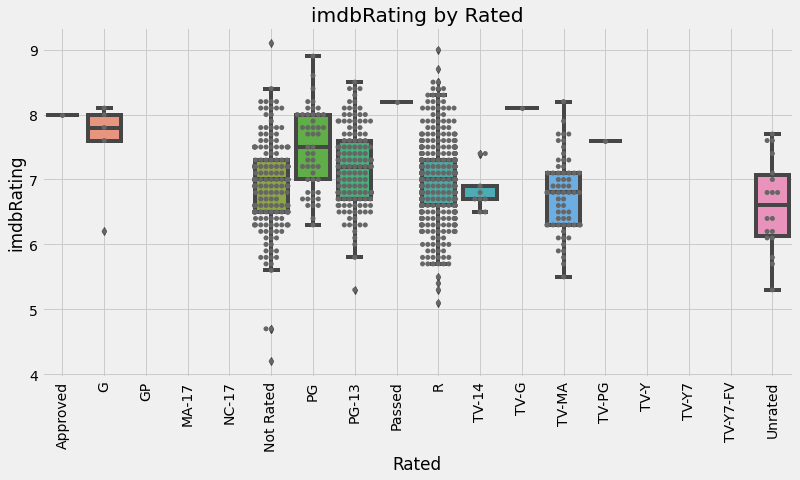

In [88]:
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
y = 'imdbRating'
plot_box_swarm(x, y, df_rated, rated_list)

## Runtime

In [89]:
# Select columns
cols = ['Title','Year','Genre','Runtime','Metascore','imdbRating']
# Create runtime dataframe
df_runtime = df[cols].copy()

In [90]:
print('Mean runtime: ' + str(int(round(df_runtime['Runtime'].mean(), 0))))
print('Median runtime: ' + str(int(round(df_runtime['Runtime'].median(), 0)))) 

Mean runtime: 110
Median runtime: 107


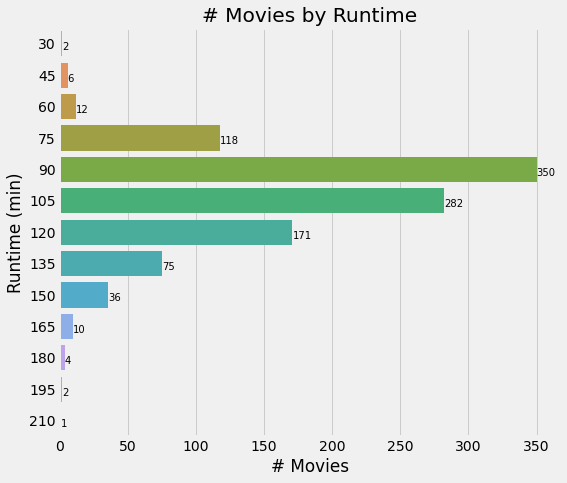

In [91]:
# Create groups of 15 minutes
period = 15
df_runtime['Duration'] = df_runtime['Runtime'].floordiv(period) * period 
df_runtime_group = df_runtime.groupby('Duration').agg({'Title':'count'})

# Plot
plot_duration_movies = df_runtime_group.reset_index()
plt.figure(figsize=(8,7))
sns.barplot(x='Title', y='Duration', data=plot_duration_movies, orient='h');
plt.title('# Movies by Runtime')
plt.xlabel('# Movies')
plt.ylabel('Runtime (min)')

for i, rate in enumerate(plot_duration_movies["Title"]):
    plt.text(rate+0.1, i+0.2, rate, fontdict={'fontsize':10})

### Longest movies

In [92]:
print('Movies over 120 minutes (2 hours):   ', len(df_runtime[df_runtime.Runtime > 120]))
print('Movies over 150 minutes (2.5 hours): ', len(df_runtime[df_runtime.Runtime > 150]))
print('Movies over 180 minutes (3 hours):   ', len(df_runtime[df_runtime.Runtime > 180]))

N = 10
show_all(df_runtime.iloc[:,:-1].nlargest(N, 'Runtime', keep='all').drop_duplicates().set_index('Title'))

Movies over 120 minutes (2 hours):    291
Movies over 150 minutes (2.5 hours):  49
Movies over 180 minutes (3 hours):    6


## Genre

In [93]:
# Select columns
cols = ['Title','Year','Genre','Runtime','imdbRating','Timestamp']
# Create genre dataframe
df_genre = df[cols].copy()

In [94]:
# Number of unique genres
genres = counter_display(df_genre, 'Genre', 'Title').index
print('Unique genres: ' + str(genres.nunique()))
# Unique genres
unique_genres = list(genres.unique().sort_values())
print(', '.join(unique_genres))

Unique genres: 22
Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Film-Noir, History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Sport, Thriller, War, Western


In [95]:
# Check genre of recently watched movies 
N = 10
df_genre.tail(N)

Title  Year                     Genre  Runtime  \
1059           Confess, Fletch  2022             Comedy, Crime       98   
1060       From Dusk Till Dawn  1996     Action, Crime, Horror      108   
1061             Speak No Evil  2022   Drama, Horror, Thriller       97   
1062                      Tusk  2014            Comedy, Horror      102   
1063              Flux Gourmet  2022     Comedy, Drama, Horror      111   
1064                    Athena  2022   Action, Drama, Thriller       99   
1065       I Used to Be Famous  2022      Comedy, Drama, Music      104   
1066            Only the Brave  2017  Action, Biography, Drama      134   
1067              Bullet Train  2022  Action, Comedy, Thriller      127   
1068  The Silence of the Lambs  1991    Crime, Drama, Thriller      118   

      imdbRating           Timestamp  
1059         6.5 2022-09-16 23:46:04  
1060         7.2 2022-09-19 23:07:11  
1061         6.6 2022-09-21 22:24:37  
1062         5.3 2022-09-22 23:29:11  
1063         5.9 2022-09-23 23:40:54  
1064         6.8 2022-09-24 14:00:32  
1065         6.7 2022-09-24 16:14:25  
1066         7.6 2022-09-25 23:35:45  
1067         7.5 2022-09-26 23:44:38  
1068         8.6 2022-09-27 23:47:53

In [96]:
# Top movie genres
df_explode_genre = df_genre.copy()
# Do this for visualizations below
df_explode_genre = split_explode(df_explode_genre, 'Genre')

In [97]:
# Prepare for plotting
genre_list = df_explode_genre.Genre.unique()
genre_list.sort()
x = 'Genre'

### Runtime

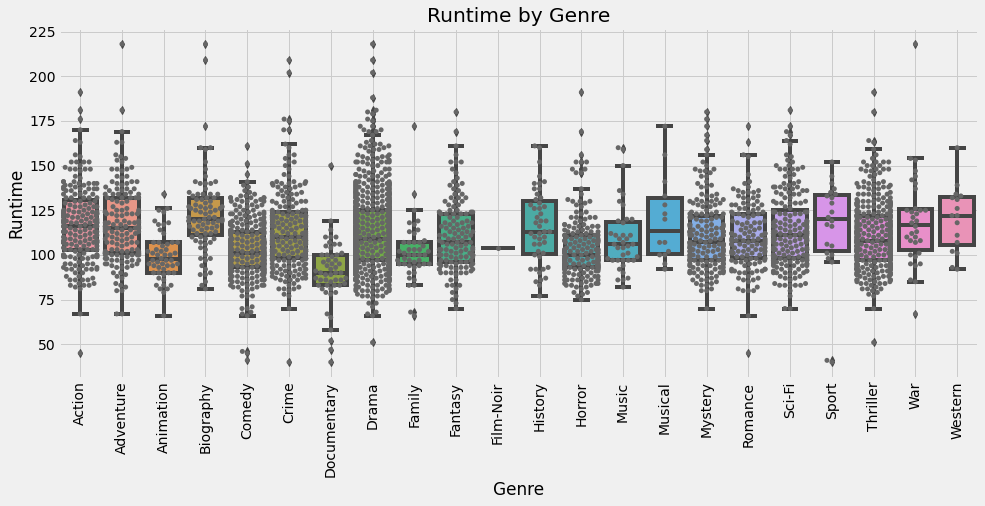

In [98]:
# Runtime by Genre
y = 'Runtime'
plot_box_swarm(x, y, df_explode_genre, genre_list)

In [99]:
# Genre runtime statistics
df_genre_runtime_stats = df_explode_genre.drop('imdbRating', axis=1).groupby('Genre')['Runtime'].describe()
stat_cols = df_genre_runtime_stats.columns.values #['count','mean','std','min','max']

df_genre_runtime_stats[stat_cols] = df_genre_runtime_stats[stat_cols].fillna(0).astype(int)
df_genre_runtime_stats.sort_values('count', inplace=True, ascending=False)
df_genre_runtime_stats

count  mean  std  min  25%  50%  75%  max
Genre                                                 
Drama          722   112   21   51   97  109  125  218
Thriller       361   110   18   51   97  108  122  191
Comedy         312   102   16   41   93  101  113  161
Crime          218   113   22   40   98  110  124  209
Action         200   117   21   45  103  116  130  191
Sci-Fi         195   113   21   70   98  111  125  181
Horror         190   104   17   75   93  100  111  191
Mystery        187   111   20   70   97  107  121  180
Adventure      155   117   22   67  101  115  132  218
Fantasy        136   110   20   70   96  107  123  180
Romance        133   110   19   45   98  108  123  172
Biography       87   122   22   81  111  120  132  218
Documentary     53    90   18   40   83   90  100  150
Animation       52    99   13   66   90   97  107  134
History         47   115   20   77  100  113  130  161
Family          45   101   16   66   95  100  107  172
Music           39   109   18   82   97  106  118  160
War             34   119   26   67  102  117  125  218
Sport           22   114   28   40  102  120  133  152
Western         16   120   18   92  105  122  132  160
Musical         14   119   24   92  100  113  131  172
Film-Noir        1   104    0  104  104  104  104  104

### imdbRating

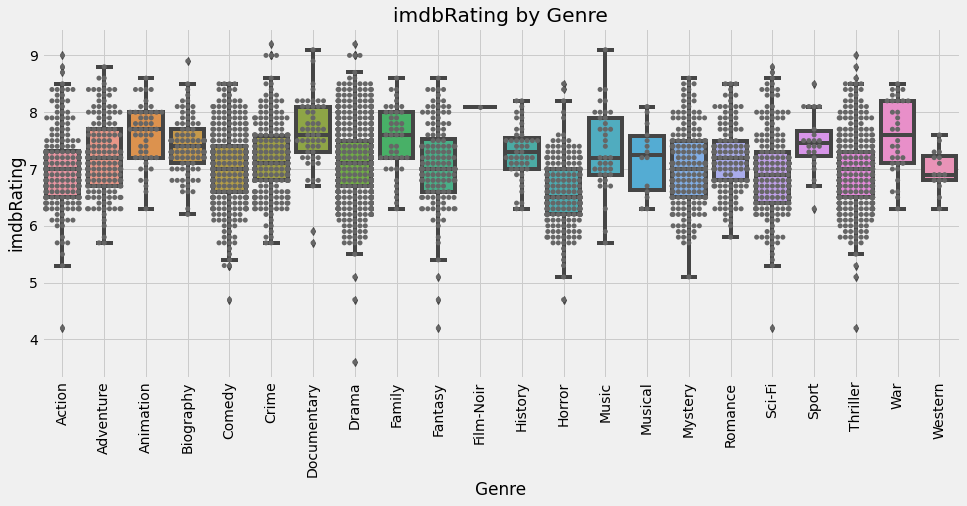

In [100]:
# imdbRating by Genre
y = 'imdbRating'
plot_box_swarm(x, y, df_explode_genre, genre_list)

In [101]:
# Genre imdbRating statistics
df_genre_rating_stats = df_explode_genre.drop('Runtime', axis=1).groupby('Genre')['imdbRating'].describe()
stat_cols = df_genre_rating_stats.columns.values

df_genre_rating_stats[stat_cols] = df_genre_rating_stats[stat_cols].fillna(0).round(1)
df_genre_rating_stats['count'] = df_genre_rating_stats['count'].astype(int)
df_genre_rating_stats.sort_values('count', inplace=True, ascending=False)
df_genre_rating_stats

count  mean  std  min  25%  50%  75%  max
Genre                                                 
Drama          722   7.1  0.6  3.6  6.7  7.1  7.5  9.2
Thriller       361   7.0  0.7  4.2  6.5  7.0  7.3  9.0
Comedy         312   7.0  0.7  4.7  6.6  7.0  7.4  8.5
Crime          218   7.2  0.6  5.7  6.8  7.1  7.6  9.2
Action         200   7.0  0.7  4.2  6.5  7.0  7.3  9.0
Sci-Fi         195   6.9  0.7  4.2  6.4  6.9  7.3  8.8
Horror         190   6.6  0.6  4.7  6.2  6.5  7.0  8.5
Mystery        187   7.0  0.7  5.1  6.5  7.0  7.5  8.6
Adventure      155   7.2  0.7  5.7  6.7  7.2  7.7  8.8
Fantasy        136   7.1  0.7  4.2  6.6  7.0  7.5  8.6
Romance        133   7.2  0.6  5.8  6.8  7.2  7.5  8.5
Biography       87   7.4  0.5  6.2  7.1  7.4  7.7  8.9
Documentary     53   7.6  0.6  5.7  7.3  7.6  8.1  9.1
Animation       52   7.6  0.5  6.3  7.2  7.7  8.0  8.6
History         47   7.3  0.5  6.3  7.0  7.3  7.6  8.2
Family          45   7.5  0.6  6.3  7.2  7.6  8.0  8.6
Music           39   7.4  0.7  5.7  6.9  7.2  7.9  9.1
War             34   7.6  0.6  6.3  7.1  7.6  8.2  8.5
Sport           22   7.5  0.5  6.3  7.2  7.4  7.7  8.5
Western         16   7.0  0.4  6.3  6.8  6.9  7.2  7.6
Musical         14   7.2  0.6  6.3  6.6  7.2  7.6  8.1
Film-Noir        1   8.1  0.0  8.1  8.1  8.1  8.1  8.1

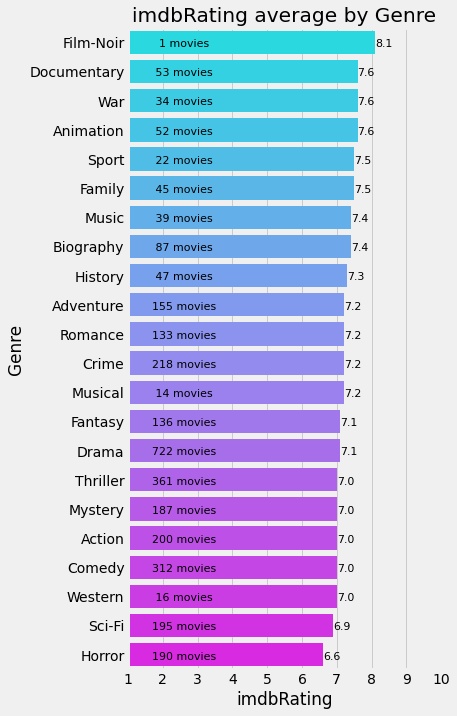

In [102]:
# Genre with highest imdbRating
df_genre_rating_stats.sort_values(by='mean', ascending=False, inplace=True)

# Plot
# https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
ratings = [1, 10] # imdbRating from 1 to 10
xsize = ratings[1] // 2
ysize = len(df_genre_rating_stats.index) // 2
plt.figure(figsize=(xsize,ysize))
sns.barplot(y=df_genre_rating_stats.index, x=df_genre_rating_stats["mean"], palette='cool', orient="h")
plt.title('imdbRating average by Genre')
plt.xlabel('imdbRating')
plt.xlim(ratings) 
plt.xticks(np.arange(ratings[0], ratings[1]+1, step=1))

for i, counts in enumerate(df_genre_rating_stats["count"]):
    plt.text(ratings[0]+0.5, i+0.15, f"{counts:>5} movies", fontdict={'fontsize':11})
    plt.text(df_genre_rating_stats["mean"][i], i+0.15, df_genre_rating_stats["mean"][i], fontdict={'fontsize':11})    
plt.show()

### Overview

In [103]:
# Genre overview (runtime and rating mean values)
df_genre_top_stats = pd.DataFrame(index = df_genre_runtime_stats.index)
df_genre_top_stats['count'] = df_genre_runtime_stats['count']
df_genre_top_stats['runtime'] = df_genre_runtime_stats['mean']
df_genre_top_stats['ratings'] = df_genre_rating_stats['mean']
df_genre_top_stats.style.background_gradient(subset=['runtime','ratings']).set_precision(1)

In [104]:
# Unique combination of genres
print('Unique combination of genres: ' + str(df_genre[['Genre','Title']].groupby(by='Genre').count().reset_index()['Genre'].nunique()))

Unique combination of genres: 378


### Genre combination

In [105]:
# Genre combination by release year
df_genre_date = df_genre.copy()
df_genre_date['Year'] = df_genre['Timestamp'].dt.year
df_genre_date.drop(columns='Timestamp', inplace=True)

pd.crosstab(df_genre_date['Genre'], df_genre_date['Year'], margins=True).nlargest(N+1, 'All', keep='all') # +1 because 'All' takes 1 spot 

Year                             2018  2019  2020  2021  2022   All
Genre                                                              
All                                59    73   251   404   282  1069
Drama                               1     3    23    26    25    78
Comedy, Drama                       7     4    12    18     8    49
Crime, Drama, Thriller              2     3    11    10    13    39
Drama, Romance                      0     2     5    11     8    26
Comedy, Drama, Romance              0     1     0    12    10    23
Documentary                         2     1     9     9     2    23
Crime, Drama                        1     0     4     9     7    21
Crime, Drama, Mystery, Thriller     0     3     6     6     6    21
Drama, Mystery, Thriller            0     1     3     7     7    18
Action, Adventure, Sci-Fi           4     3     1     5     0    13
Biography, Drama                    0     1     5     7     0    13
Comedy                              0     2     3     4     4    13

In [106]:
# Genre combination with most movies, showing worst and best movies
df_genre_agg = df_genre.groupby(by='Genre').agg({'imdbRating':['min','max','mean'], 
                                                 'Title':['count']})
df_genre_agg.reset_index(inplace=True)
# Get worst and best movies by genre combination
df_genre_agg[('Title','worst')] = df_genre.loc[df_genre.groupby('Genre')['imdbRating'].idxmin().fillna(0).astype(int)].reset_index(drop=True)['Title']
df_genre_agg[('Title','best')] = df_genre.loc[df_genre.groupby('Genre')['imdbRating'].idxmax().fillna(0).astype(int)].reset_index(drop=True)['Title']
# Sort by most movies
df_genre_agg = df_genre_agg.set_index([('Genre','')]).sort_values(by=[('Title','count')], ascending=False).round(1)
df_genre_agg.index.rename('Genre', inplace=True)
df_genre_agg.nlargest(N, [('Title', 'count')], keep='all')

imdbRating           Title  \
                                       min  max mean count   
Genre                                                        
Drama                                  3.6  8.7  7.1    78   
Comedy, Drama                          6.2  8.2  7.1    49   
Crime, Drama, Thriller                 6.3  8.6  7.2    39   
Drama, Romance                         6.0  8.5  7.4    26   
Documentary                            5.9  8.4  7.5    23   
Comedy, Drama, Romance                 6.2  8.5  7.2    23   
Crime, Drama                           6.3  9.2  7.5    21   
Crime, Drama, Mystery, Thriller        6.4  8.5  7.3    21   
Drama, Mystery, Thriller               5.9  8.2  7.2    18   
Comedy                                 4.7  8.0  6.7    13   
Biography, Drama                       6.6  8.2  7.4    13   
Action, Adventure, Sci-Fi              6.3  8.4  7.3    13   

                                                                 \
                                                          worst   
Genre                                                             
Drama                                                  The Room   
Comedy, Drama                                         Chevalier   
Crime, Drama, Thriller                           Run Hide Fight   
Drama, Romance                                             Love   
Documentary                                Expedition Happiness   
Comedy, Drama, Romance                      Morris from America   
Crime, Drama                          The Many Saints of Newark   
Crime, Drama, Mystery, Thriller                  No Sudden Move   
Drama, Mystery, Thriller                             Horse Girl   
Comedy                           The First Temptation of Christ   
Biography, Drama                                            Joy   
Action, Adventure, Sci-Fi                                  Dune   

                                                                  
                                                            best  
Genre                                                             
Drama                            One Flew Over the Cuckoo's Nest  
Comedy, Drama                                    The Truman Show  
Crime, Drama, Thriller                  The Silence of the Lambs  
Drama, Romance                                   Cinema Paradiso  
Documentary                                      Untamed Romania  
Comedy, Drama, Romance                               City Lights  
Crime, Drama                                       The Godfather  
Crime, Drama, Mystery, Thriller               The Usual Suspects  
Drama, Mystery, Thriller                         The Sixth Sense  
Comedy                                        Young Frankenstein  
Biography, Drama                                The Elephant Man  
Action, Adventure, Sci-Fi                 Avengers: Infinity War

In [107]:
# Genre combination with higher imdbRating
df_genre_agg[df_genre_agg[('Title','count')] > 2].nlargest(N, [('imdbRating','mean')], keep='all')

imdbRating           Title  \
                                             min  max mean count   
Genre                                                              
Documentary, Music                           7.8  9.1  8.3     4   
Action, Adventure, Sci-Fi, Thriller          7.3  8.8  8.2     3   
Animation, Adventure, Family, Fantasy        7.8  8.2  8.0     3   
Biography, Drama, Music                      7.5  8.4  7.9     3   
Mystery, Thriller                            6.7  8.5  7.8     4   
Adventure, Drama, Sci-Fi                     6.8  8.6  7.8     3   
Drama, Mystery, Sci-Fi                       7.4  8.0  7.8     3   
Action, Drama                                7.2  8.4  7.8     3   
Documentary, History                         7.5  8.1  7.8     3   
Adventure, Biography, Drama                  7.1  8.1  7.7     3   
Comedy, Drama, War                           6.8  8.4  7.7     3   

                                                                \
                                                         worst   
Genre                                                            
Documentary, Music                                  Sound City   
Action, Adventure, Sci-Fi, Thriller        Alita: Battle Angel   
Animation, Adventure, Family, Fantasy  Kiki's Delivery Service   
Biography, Drama, Music                                  Elvis   
Mystery, Thriller                                          Run   
Adventure, Drama, Sci-Fi                                 Finch   
Drama, Mystery, Sci-Fi                             Cloud Atlas   
Action, Drama                                        Old Henry   
Documentary, History                          One Child Nation   
Adventure, Biography, Drama                               Wild   
Comedy, Drama, War                            Last Flag Flying   

                                                                   
                                                             best  
Genre                                                              
Documentary, Music                     Hans Zimmer Live in Prague  
Action, Adventure, Sci-Fi, Thriller                     Inception  
Animation, Adventure, Family, Fantasy        Howl's Moving Castle  
Biography, Drama, Music                                   Amadeus  
Mystery, Thriller                                     Rear Window  
Adventure, Drama, Sci-Fi                             Interstellar  
Drama, Mystery, Sci-Fi                                    Solaris  
Action, Drama                                   Top Gun: Maverick  
Documentary, History                                    Apollo 11  
Adventure, Biography, Drama                         Into the Wild  
Comedy, Drama, War                             The Great Dictator

In [108]:
# Genre combination with lower imdbRating
df_genre_agg[df_genre_agg[('Title','count')] > 2].nsmallest(N, [('imdbRating','mean')], keep='all')

imdbRating           Title  \
                                                 min  max mean count   
Genre                                                                  
Comedy, Horror, Sci-Fi                           5.6  6.5  6.1     3   
Comedy, Horror                                   5.3  7.3  6.2     7   
Drama, Fantasy, Horror                           4.7  7.5  6.2     4   
Action, Comedy, Horror, Thriller                 5.5  6.9  6.3     3   
Drama, Sci-Fi, Thriller                          5.8  6.8  6.4     6   
Horror, Mystery, Sci-Fi, Thriller                5.8  7.0  6.4     6   
Comedy, Drama, Horror                            5.7  7.6  6.4     5   
Drama, Fantasy, Horror, Mystery, Thriller        5.1  7.1  6.4     5   
Drama, Horror, Thriller                          6.2  7.2  6.5    10   
Horror                                           5.8  6.9  6.5     7   
Horror, Mystery, Thriller                        5.9  7.5  6.5     6   
Comedy, Horror, Thriller                         6.1  6.7  6.5     5   
Action, Drama, Sci-Fi, Thriller                  6.1  7.1  6.5     3   

                                                                     \
                                                              worst   
Genre                                                                 
Comedy, Horror, Sci-Fi                                  Fried Barry   
Comedy, Horror                                                 Tusk   
Drama, Fantasy, Horror                             We Are the Flesh   
Action, Comedy, Horror, Thriller                 Willy's Wonderland   
Drama, Sci-Fi, Thriller                                   Encounter   
Horror, Mystery, Sci-Fi, Thriller                          The Void   
Comedy, Drama, Horror                                  Silent Night   
Drama, Fantasy, Horror, Mystery, Thriller         She Dies Tomorrow   
Drama, Horror, Thriller                           Boys in the Trees   
Horror                                                   Hellbender   
Horror, Mystery, Thriller                  The Blackcoat's Daughter   
Comedy, Horror, Thriller                              The Beta Test   
Action, Drama, Sci-Fi, Thriller                        The Blackout   

                                                                                              
                                                                                        best  
Genre                                                                                         
Comedy, Horror, Sci-Fi                                                               Slither  
Comedy, Horror                                                                         House  
Drama, Fantasy, Horror                     Interview with the Vampire: The Vampire Chroni...  
Action, Comedy, Horror, Thriller                                                    The Trip  
Drama, Sci-Fi, Thriller                                                               Primer  
Horror, Mystery, Sci-Fi, Thriller                                                       Nope  
Comedy, Drama, Horror                                                    One Cut of the Dead  
Drama, Fantasy, Horror, Mystery, Thriller                            In the Mouth of Madness  
Drama, Horror, Thriller                                                         Dead Ringers  
Horror                                                                             Near Dark  
Horror, Mystery, Thriller                                                     The Wicker Man  
Comedy, Horror, Thriller                          Behind the Mask: The Rise of Leslie Vernon  
Action, Drama, Sci-Fi, Thriller                                                     WarGames

In [109]:
# Most watched genre combination, with rating and worst/best movie from each genre
condition = 'Documentary'
mask = df_genre['Genre'].str.contains(condition)
SHOW = 5

df_top_genres_year = df_genre[~mask][~df_genre.duplicated(['Title','Year'], keep='first')]
[
    [
        print(year),
        # all movies
        most_watched_genre_combo(df_top_genres_year, SHOW, year),
        most_watched_genre(df_top_genres_year, SHOW, year),
        print('\n'),
    ]
    for year in years
];

2018




2019




2020




2021




2022


In [110]:
# Best movies by genre in each decade
SHOW = 3

df_decade_genre = df_decade.copy()
# Empty dataframe
df_empty = pd.DataFrame(data=None, index=df_explode_genre.Genre.unique(), columns=np.arange(df_decade.Decade.min(),df_decade.Decade.max()+10, 10))
# Explode genre and group by decade and genre
df_decade_genre = split_explode(df_decade_genre, 'Genre')
df_aux = df_decade_genre.groupby(['Decade','Genre'], as_index=False).apply(lambda x: x.nlargest(SHOW, 'imdbRating', keep='last'))
df_aux = pd.crosstab(index=df_aux['Genre'], columns=df_aux['Decade'], values=df_aux['Title'], aggfunc=' * '.join)
# Combine dataframes
df_best_decade_genre = df_empty.combine_first(df_aux)
show_all(df_best_decade_genre)

In [111]:
# Get top from genre in decade
get_genre = 'Sci-Fi'
get_decade = 1960
    
try:
    titles = df_best_decade_genre.at[get_genre, get_decade].split(' * ')
    [print(title) for title in titles]
except AttributeError:
    print('No results.')
except KeyError:
    print('Error in genre OR decade!')

Fahrenheit 451
I Love You, I Love You
Icarus XB 1


In [112]:
# Common double genre pairings
df_double_genre = pairing(df_genre, 'Genre')

# Show top pairs
N = 10
show_all(df_double_genre.nlargest(N, 'Count', keep='all'))

In [113]:
# Genre pairings overview
df_genre_pairings = pd.DataFrame(index=unique_genres)

for i in unique_genres:
    aux = split_explode(df_genre[df_genre.Genre.str.contains(i)], 'Genre')
    gb_aux = aux.groupby('Genre').agg({'Title':'count'})#, 'imdbRating':'mean', 'Runtime':'mean'})   
    df_genre_pairings[i] = gb_aux.Title  

df_genre_pairings.fillna(0, inplace=True)
df_genre_pairings = df_genre_pairings.astype(int)
show_all(df_genre_pairings.style.background_gradient(axis=1))

In [114]:
# Common triple genre pairings
df_triple_genre = pairing(df_genre, 'Genre', pair=3)
# Show top triple pairings
show_all(df_triple_genre.nlargest(N, 'Count', keep='all'))

### Filter by 

In [115]:
# Show top "low key" movies from genre
cols = ['Title','Year','Rated','Runtime','Genre','Director','Metascore','imdbRating','imdbVotes','Plot']
genres = ['Sci-Fi','Horror']
N = 10

# https://stackoverflow.com/questions/61940432/word-count-frequency-removing-stopwords
# Initialize word counter
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', stop_words='english')

for genre in genres:  
    # Create filters
    mask1 = df.Genre.str.contains(genre)
    mask2 = df.imdbVotes < df_all.imdbVotes.quantile(0.5) 
    df_genre_aux = df[mask1]
    # Count words
    sparse_matrix = word_vectorizer.fit_transform(df_genre_aux.Plot)
    word_freq = sum(sparse_matrix).toarray()[0]
    word_df = pd.DataFrame(word_freq, index=word_vectorizer.get_feature_names(), columns=['Frequency'])
    # Print and plot
    print(genre)
    show_all(df_genre_aux[mask2][cols[:-1]].nlargest(N, 'imdbRating', keep='all'))
    print()
    print("Common words in plot")
    show_all(word_df.nlargest(N, 'Frequency', keep='all').T)
    print(), print()

Sci-Fi



Common words in plot




Horror



Common words in plot


## Director

In [116]:
# Select columns
cols = ['Title','Year','Runtime','Director','Cinematographer','Genre','Actors','imdbRating','imdbVotes','Production','Timestamp']
# Create director dataframe
df_director = df[cols].copy()

In [117]:
# Number of unique directors (single or multiple)
df_counter_directors = counter_display(df_director, 'Director', 'Title', None)
print('Different directors: ' + str(len(df_counter_directors.index)))

Different directors: 861


In [118]:
## No duplicated movies
#df_director = df_director[~df_director.duplicated(['Title','Year'], keep='first')]
#df_director = df_director[~df_director.duplicated(['Title','Director'], keep='first')]

# Drop documentaries
condition = 'Documentary'
mask = df_director['Genre'].str.contains(condition)
df_director = df_director[~mask].reset_index(drop=True) 

In [119]:
# Directors / rating & runtime
df_dirrat = get_mean_value(df_director, 'Director', 'imdbRating')
df_dirrat['Runtime'] = get_mean_value(df_director, 'Director', 'Runtime')['Runtime']
# Most watched Directors - no Docs
print('Directors with only 1 movie watched: ' + str(len(df_dirrat[df_dirrat['Total'] == 1])))

i=1
N_MOVIES = 3
while i <= N_MOVIES:
    print('Directors with more than ' + str(i) + ' movie(s) watched: ' + str(len(df_dirrat[df_dirrat['Total'] > i])))
    i+=1

Directors with only 1 movie watched: 628
Directors with more than 1 movie(s) watched: 172
Directors with more than 2 movie(s) watched: 63
Directors with more than 3 movie(s) watched: 30


### Top by Year

In [120]:
# Top directors by year
# More than X movies
query = 'Total > 1'
[
    [
        print(year),
        show_all(get_mean_value(df_director[df_director['Timestamp'].dt.year == year], 'Director', 'imdbRating').query(query).sort_values(['Total','imdbRating'], ascending=False)),
        print('\n'),
    ]
    for year in years
];

2018




2019




2020




2021




2022


### Top

In [121]:
# Show top directors (most movies watched by director)
show_all(df_dirrat[df_dirrat['Total'] > 2].sort_values(by=['Total','imdbRating'], ascending=False).style.background_gradient(subset='imdbRating').set_precision(1))

### Search

In [122]:
# Search by director (exact string)
search = 'Asghar Farhadi'
df[df.Director.str.contains('\\b' + search + '\\b')].iloc[:,:-8] 

Title  Year    imdbID  Rated  Runtime  \
72    Everybody Knows  2018   4964788      R      133   
347      The Salesman  2016   5186714  PG-13      124   
1015           A Hero  2021  11777738  PG-13      127   

                                Genre        Director          Writer  \
72    Crime, Drama, Mystery, Thriller  Asghar Farhadi  Asghar Farhadi   
347                             Drama  Asghar Farhadi  Asghar Farhadi   
1015                            Drama  Asghar Farhadi  Asghar Farhadi   

                Cinematographer  \
72            José Luis Alcaine   
347            Hossein Jafarian   
1015  Ali Ghazi, Arash Ramezani   

                                                 Actors  ... imdbRating  \
72    Vicente Vergara, Antonio Esquinas, Inma Sancho...  ...        6.9   
347   Shirin Aghakashi, Sahra Asadollahi, Shahab Hos...  ...        7.7   
1015  Amir Jadidi, Sarina Farhadi, Mohammad Jamalled...  ...        7.5   

     imdbVotes                                               Plot  \
72       34362                                                N/A   
347      60093  Forced to leave their collapsing house, Ranaa ...   
1015     22767                                                N/A   

                                             Production  \
72    France 3 Cinéma, Ledafilms, Untitled Films, Ra...   
347   Memento Films, Memento Films Production, Doha ...   
1015  Centre national du cinéma et de l'image animée...   

                                            Distributor  \
72    United International Pictures (UIP), Capella F...   
347   Gutek Film, NTR, Canvas, Amazon Studios, Yleis...   
1015  Curzon Artificial Eye, Golden Scene, Curzon Ar...   

                                               Producer  \
72    Stefano Massenzi, Cynthia Pinet, Andrea Occhip...   
347   Alexandre Mallet-Guy, Olivier Père, Asghar Far...   
1015  Alexandre Mallet-Guy, Rémi Burah, Hamid Reza G...   

                                      Composer  BoxOffice         Budget  \
72                                Javier Limón          0  EUR10,000,000   
347   Hojjat Hassanpour Sargroui, Sattar Oraki  2,216,318              0   
1015                                       N/A          0              0   

               Timestamp  
72   2019-03-06 20:19:07  
347  2020-11-28 00:22:58  
1015 2022-07-15 23:42:48  

[3 rows x 23 columns]

### Longest movies

In [123]:
# Directors with the longest movies (with more than 1 movie watched)
N = 10
show_all(df_dirrat[df_dirrat['Total'] > 1].nlargest(N, 'Runtime', keep='all'))

### imdbRating

In [124]:
# Highest rating directors (with more than 1 movie watched)
show_all(df_dirrat[df_dirrat['Total'] > 1].nlargest(N, 'imdbRating', keep='all'))

In [125]:
# Top rated directors with only 1 movie watched
df_dirrat[~df_dirrat['Movies'].apply(pd.Series).duplicated()][df_dirrat.Total == 1].nlargest(N, 'imdbRating', keep='all') # columns with list values # remove duplicated list values

Total                                 Movies  imdbRating  \
Director                                                                     
Sidney Lumet          1                           12 Angry Men         9.0   
Jonathan Demme        1               The Silence of the Lambs         8.6   
Nadine Labaki         1                              Capernaum         8.4   
Makoto Shinkai        1                             Your Name.         8.4   
Lee Unkrich           1                                   Coco         8.4   
Todd Phillips         1                                  Joker         8.4   
Peter Ramsey          1      Spider-Man: Into the Spider-Verse         8.4   
Elem Klimov           1                           Come and See         8.4   
Michel Gondry         1  Eternal Sunshine of the Spotless Mind         8.3   
David Lean            1                     Lawrence of Arabia         8.3   
Darren Aronofsky      1                    Requiem for a Dream         8.3   

                  Runtime  
Director                   
Sidney Lumet           96  
Jonathan Demme        118  
Nadine Labaki         126  
Makoto Shinkai        106  
Lee Unkrich           105  
Todd Phillips         122  
Peter Ramsey          117  
Elem Klimov           142  
Michel Gondry         108  
David Lean            218  
Darren Aronofsky      102

In [126]:
# Lowest rating directors
show_all(df_dirrat[df_dirrat['Total'] > 1].nsmallest(N, 'imdbRating', keep='all'))

### Genre

In [127]:
# Create director - genre dataframe
df_genre_director = df_director.copy()
# Select columns
cols = ['Genre','Director']
for col in cols:
    df_genre_director = split_explode(df_genre_director, col)
# More than X movies
director_movies = df_dirrat[df_dirrat['Total'] > 2].index
ct_genre_director = pd.crosstab(df_genre_director['Director'], df_genre_director['Genre']).loc[director_movies]

In [128]:
# Top Director by Genre
df_genre_top_director = pd.crosstab(df_genre_director['Director'], df_genre_director['Genre'])
list_genres = df_genre_top_director.columns

for genre in list_genres: 
    # genre
    df_genre_temp = pd.DataFrame(df_genre_top_director.nlargest(3, genre)[genre])
    df_genre_temp['Movies'] = np.nan
    df_genre_temp['Movies'] = df_genre_temp['Movies'].astype('object') # need to make sure the column you are inserting into has dtype=object 
    # director
    list_directors = list(df_genre_temp.index)
    for director in list_directors:
        # movies
        movies = []
        movies = '; '.join(df[df['Director'].str.contains(director)][df['Genre'].str.contains(genre)]['Title'])        
        df_genre_temp.at[director, 'Movies'] = movies # .at instead of .loc
    show_all(df_genre_temp)   
    print('\n')

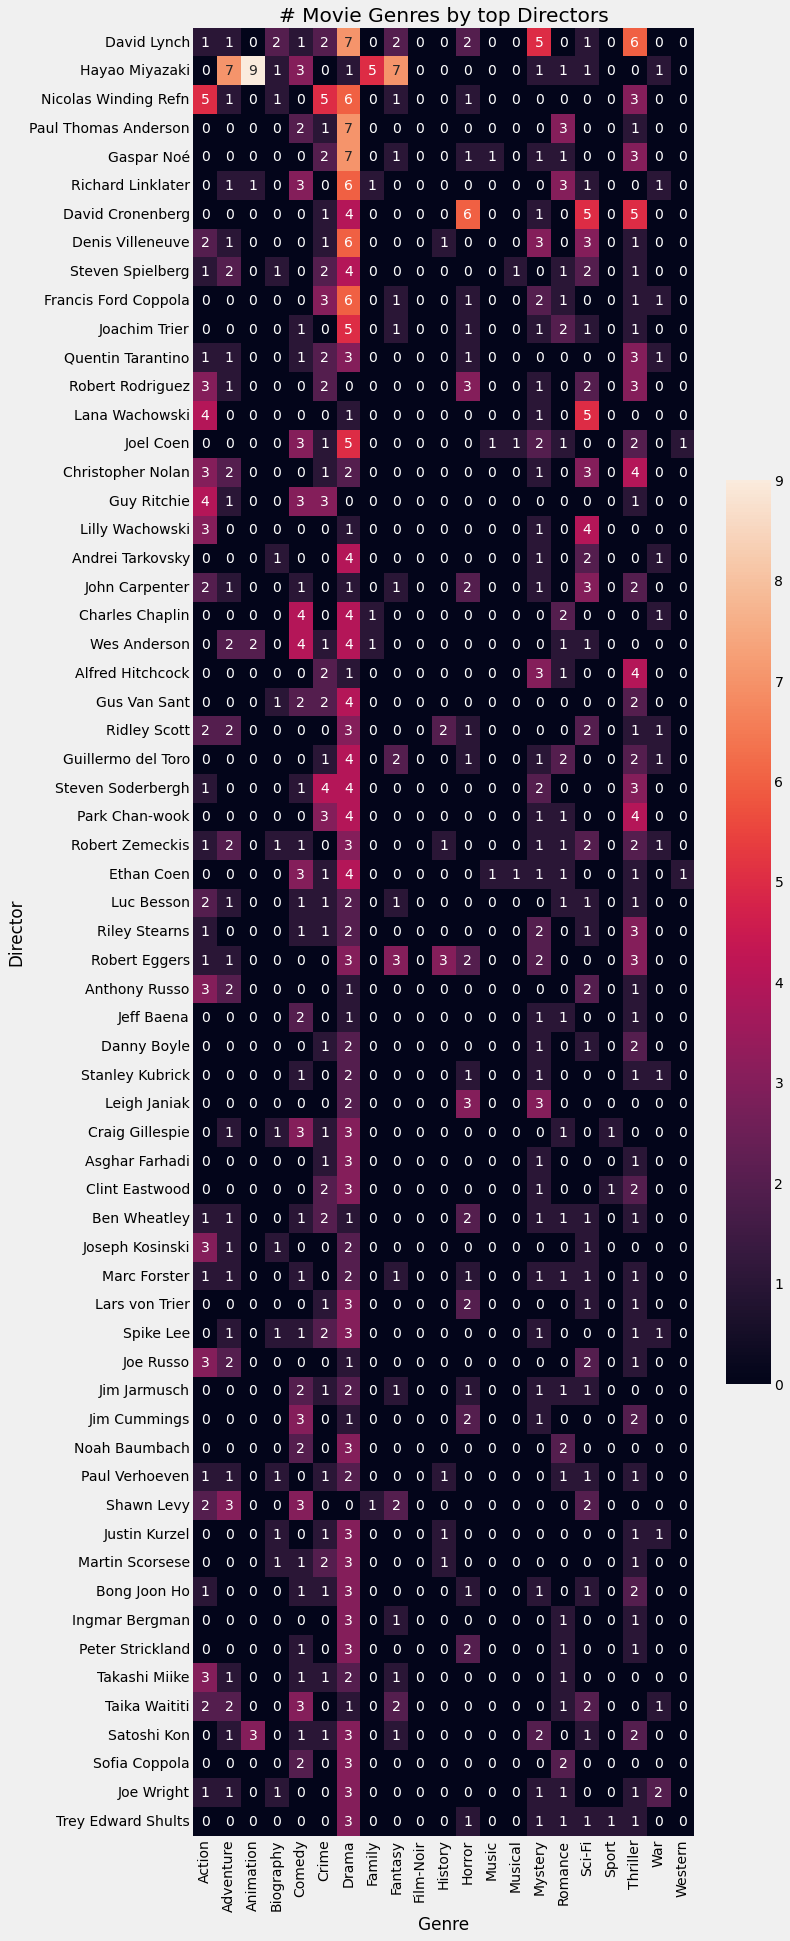

In [129]:
# Plot movie genres by top Directors
xsize = len(ct_genre_director.columns) // 2
ysize = len(ct_genre_director.index) // 2
if ysize == 0: ysize = 1

_, ax = plt.subplots(figsize=(xsize,ysize))
sns.heatmap(ct_genre_director, annot=True, fmt="d", cbar_kws={"shrink": 0.5}, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 
plt.title('# Movie Genres by top Directors');

### Votes

In [130]:
# Director average votes by movie
df_director_votes = df_director.copy()
# Explode director values
df_director_votes = split_explode(df_director_votes, 'Director')
df_director_avg_votes = get_mean_value(df_director_votes, 'Director', 'imdbVotes')
df_director_avg_votes['imdbRating'] = get_mean_value(df_director_votes, 'Director', 'imdbRating')['imdbRating']
df_director_avg_votes['imdbVotes'] = df_director_avg_votes['Total'] * df_director_avg_votes['imdbVotes']
# Directors with most votes (more than X movie watched)
show_all(df_director_avg_votes[df_director_avg_votes.Total > 1].nlargest(N, 'imdbVotes', keep='all'))

In [131]:
# Directors with fewer votes (more than 1 movie watched)
show_all(df_director_avg_votes[df_director_avg_votes.Total > 1].nsmallest(N, 'imdbVotes', keep='all'))

### To follow

In [132]:
## Less known directors to follow
# Parameters:
# - more than 1 movie watched
# - less votes than 50% quantile
# - imdbRating average over 6
show_all(df_director_avg_votes[(df_director_avg_votes['Total'] > 1) &
                               (df_director_avg_votes['imdbVotes'] < df_director_avg_votes['imdbVotes'].quantile(0.5)) & 
                               (df_director_avg_votes['imdbRating'] > 6)])

### Partnerships

In [133]:
# Show N values
N = 10

#### Director / Cinematographer

In [134]:
# Partnership between Director / Cinematographer
df_director_cinema = df_director.copy()
gb_director_cinema_pair = double_group_info(df_director_cinema, ['Director', 'Cinematographer'], TOP=1)
show_all(gb_director_cinema_pair.nlargest(N, ('Title','count'), keep='all'))

#### Director / Actor

In [135]:
# Partnership between Director / Actor
df_director_actor = df_director[['Director','Actors','Title','imdbRating']].copy()
df_director_actor = split_explode(df_director_actor, 'Director')
df_director_actor = split_explode(df_director_actor, 'Actors')
gb_director_actor_pair = double_group_info(df_director_actor, ['Director', 'Actors'])
show_all(gb_director_actor_pair.nlargest(N, ('Title','count'), keep='all'))

#### Director / Production Company

In [136]:
# Partnership between Director / Production Company
df_director_production = df_director.copy()
gb_director_production_pair = double_group_info(df_director_production, ['Director', 'Production'], TOP=1)
show_all(gb_director_production_pair.nlargest(N, ('Title','count'), keep='all'))

## Writer

In [137]:
# Create writer dataframe
df_writer = df.copy()

In [138]:
# Number of unique Writer (single or multiple)
df_counter_writers = counter_display(df_writer,'Writer','Title', None)
print('Different writers: ' + str(len(df_counter_writers.index)))

Different writers: 1873


In [139]:
# Drop documentaries
condition = 'Documentary'
mask = df_writer['Genre'].str.contains(condition)
df_writer = df_writer[~mask]

df_writer['Writer'] = df_writer['Writer'].str.split(',').apply(lambda x: [e.strip() for e in x])
df_writer['Writer'] = df_writer['Writer'].apply(lambda x: list(set(x))) # remove duplicates
df_writer = explode(df_writer, ['Writer'])
df_writer = df_writer[~df_writer['Writer'].str.startswith('N/A')] # remove 'N/A'

### Top

In [140]:
# Highest rating writers
df_writer_rating = df_writer.copy()
df_writer_rating = get_mean_value(df_writer_rating, 'Writer', 'imdbRating')
# Show N values
N = 10
# Writer with most movies watched
show_all(df_writer_rating.nlargest(N, 'Total', keep='all').style.background_gradient(subset='imdbRating').set_precision(2))

### Search

In [141]:
# Search by specific writer (exact string)
search = 'Eskil Vogt'
df[df.Writer.str.contains('\\b' + search + '\\b')].iloc[:,:-8]

Title  Year    imdbID      Rated  Runtime  \
424                         Thelma  2017   6304046  Not Rated      116   
502                          Blind  2014   2616810  Not Rated       96   
664                        Reprise  2006   0827517          R      105   
817  The Worst Person in the World  2021  10370710          R      128   
823                  The Innocents  2021   4028464  Not Rated      117   
856              Oslo, August 31st  2011   1736633  Not Rated       95   
857              Louder Than Bombs  2015   2217859          R      109   

                                                 Genre       Director  \
424  Drama, Fantasy, Horror, Mystery, Romance, Sci-...  Joachim Trier   
502                                              Drama     Eskil Vogt   
664                                              Drama  Joachim Trier   
817                             Comedy, Drama, Romance  Joachim Trier   
823          Drama, Fantasy, Horror, Mystery, Thriller     Eskil Vogt   
856                                              Drama  Joachim Trier   
857                                              Drama  Joachim Trier   

                                                Writer  \
424                          Joachim Trier, Eskil Vogt   
502                                         Eskil Vogt   
664                          Joachim Trier, Eskil Vogt   
817                          Joachim Trier, Eskil Vogt   
823                                         Eskil Vogt   
856  Joachim Trier, Pierre Drieu La Rochelle, Eskil...   
857                          Joachim Trier, Eskil Vogt   

            Cinematographer  \
424              Jakob Ihre   
502       Thimios Bakatakis   
664              Jakob Ihre   
817            Kasper Tuxen   
823  Sturla Brandth Grøvlen   
856              Jakob Ihre   
857              Jakob Ihre   

                                                Actors  ... imdbRating  \
424  Vidar Fransson, Sigve Bøe, Eili Harboe, Martha...  ...        7.0   
502  Erle Kyllingmark, Natale Hugvik, Henrik Rafael...  ...        6.8   
664  Eivind Stoud Platou, Peer Bull-Hansen, Emil Tr...  ...        7.3   
817  Hildur Kristinsdottir, Karen Røise Kielland, T...  ...        7.9   
823  Kadra Yusuf, Sam Ashraf, Ellen Dorrit Petersen...  ...        7.0   
856  Tone Beate Mostraum, Emil Lund, Andreas Braate...  ...        7.6   
857  Peter Mark Kendall, Sara Schrader, Christopher...  ...        6.6   

    imdbVotes                                               Plot  \
424     31837  Having just enrolled at a university in Oslo a...   
502      8416  Having recently lost her sight, Ingrid retreat...   
664     12357                                                N/A   
817     50795  A modern dramedy about the quest for love and ...   
823      8173  Four children become friends during the summer...   
856     24229  Anders is a recovering drug addict in an Oslo ...   
857     13227  An upcoming exhibition celebrating photographe...   

                                            Production  \
424  Creative Europe MEDIA, Nordisk Film- & TV-Fond...   
502                               Lemming Film, Motlys   
664  Spillefilmkompaniet 4 1/2, Filmlance Internati...   
817  Nordic Film and Television Fund, B-Reel Films,...   
823  Nordisk Film- & TV-Fond, Det Danske Filminstit...   
856  Norsk Filmdistribusjon, Nordisk Film- & TV-Fon...   
857  Nordisk Film- & TV-Fond, Memento Films Product...   

                                           Distributor  \
424  Gutek Film, Myndform, The Orchard, TriArt Film...   
502  Audio Visual Entertainment, Golem Distribución...   
664  Luna Filmverleih, MFA+ FilmDistribution., A-Fi...   
817  Arthaus, SF Studios, Madman Entertainment, M2 ...   
823  MK2 Mile End, Signature Entertainment, IFC Mid...   
856  Norsk Filmdistribusjon, absolut MEDIEN, Arthau...   
857  Audio Visual Entertainment, TriArt Film, The O...   

                                              Producer  \
424  Katrin

### imdbRating

In [142]:
# Writer with highest average rating, by movies watched (more than 2)
show_all(df_writer_rating[df_writer_rating['Total'] > 2].nlargest(N, 'imdbRating', keep='all'))

### Writer as Director

In [143]:
# Remove documentaries from dataframe
df_director_writer = df[~df['Genre'].str.contains('Documentary')].copy()
# Number of movies where the director was also the writer 
print('Movies where the director was also the writer: ' + str(len(df_director_writer[df_director_writer['Director'] == df_director_writer['Writer']])))

Movies where the director was also the writer: 284


In [144]:
# Top Director and Writer
df_director_writer = df_writer.copy()
# Explode director values
df_director_writer = split_explode(df_director_writer, 'Director')
gb_director_writer = df_director_writer[df_director_writer['Director'] == df_director_writer['Writer']].groupby('Writer').agg({'Title':['count', '; '.join]})
show_all(gb_director_writer.nlargest(N,('Title','count'), keep='all'))

### Partnerships

In [145]:
# Show N values
N = 10

#### Writer / Director

In [146]:
# Top Writer / Director pairings (allowing Writer == Director)
df_writer_pair = df_director_writer.copy()
gb_writer_director_pair = double_group_info(df_writer_pair, ['Writer', 'Director'], TOP=1)
show_all(gb_writer_director_pair.nlargest(N, ('Title','count'), keep='all'))

In [147]:
# Best pairing Writer / Director based on imdbRating where the Writer is not the Director
df_writer_pair = df_director_writer.copy()
# Drop Marvel directors (too many writers and not that interesting to me)
df_writer_pair = df_writer_pair[~df_writer_pair['Director'].isin(['Anthony Russo','Joe Russo','Jon Watts'])]
# Special double group
# Group by 
gb_writer_pair = df_writer_pair.groupby(['Writer','Director']).agg({'Title':['count','; '.join],'imdbRating':'mean'})
gb_writer_pair['imdbRating'] = gb_writer_pair['imdbRating'] .round(2)
gb_writer_pair = gb_writer_pair[gb_writer_pair[('Title','count')] > 1].reset_index()
# Writer is not the Director
gb_writer_pair = gb_writer_pair[gb_writer_pair['Writer'] != gb_writer_pair['Director']].set_index(['Writer','Director'])
# Sort by imdbRating mean
gb_writer_pair = gb_writer_pair.nlargest(N, ('imdbRating','mean'), keep='all')
show_all(gb_writer_pair)

## Cinematographers

In [148]:
# Select columns
cols = ['Title','Year','Runtime','Genre','Director','Cinematographer','imdbRating','Production','Date']
# Create cinematographer dataframe
df_cinema = df[cols].copy()

In [149]:
# Number of unique Cinematographer (single or multiple)
df_cinema = df_cinema[~df_cinema['Cinematographer'].str.startswith('N/A')] # remove 'N/A'
print('Different cinematographers: ' + str(len(counter_display(df_cinema, 'Cinematographer', 'Title', None).index)))

Different cinematographers: 767


### Top

In [150]:
# Highest rating cinematographers
N = 10
# Create dataframe and get mean values
df_cinema_rating = df_cinema.copy()
df_cinema_rating = get_mean_value(df_cinema_rating, 'Cinematographer', 'imdbRating')
# Cinematographers with most movies watched
show_all(df_cinema_rating.nlargest(N, 'Total', keep='all').style.background_gradient(subset='imdbRating').set_precision(2))

In [151]:
# Cinematographer with highest average rating (more than 2 movies watched)
show_all(df_cinema_rating[df_cinema_rating['Total'] > 2].nlargest(N, 'imdbRating', keep='all'))

### Search

In [152]:
# Search by specific cinematographer (exact string)
search = 'Hoytema'
df[df.Cinematographer.str.contains('\\b' + search + '\\b')].iloc[:,:-8]

Title  Year    imdbID                Rated  Runtime  \
104                    Ad Astra  2019   2935510                PG-13      123   
352                       Tenet  2020   6723592                PG-13      150   
565   Tinker Tailor Soldier Spy  2011   1340800                    R      127   
787                Interstellar  2014   0816692  PG-13, TV-14, TV-PG      169   
1044                       Nope  2022  10954984                    R      130   

                                            Genre           Director  \
104   Adventure, Drama, Mystery, Sci-Fi, Thriller         James Gray   
352                      Action, Sci-Fi, Thriller  Christopher Nolan   
565                      Drama, Mystery, Thriller    Tomas Alfredson   
787                      Adventure, Drama, Sci-Fi  Christopher Nolan   
1044            Horror, Mystery, Sci-Fi, Thriller       Jordan Peele   

                                                Writer    Cinematographer  \
104                            James Gray, Ethan Gross  Hoyte Van Hoytema   
352                                  Christopher Nolan  Hoyte Van Hoytema   
565   Bridget O'Connor, John le Carré, Peter Straughan  Hoyte Van Hoytema   
787                  Christopher Nolan, Jonathan Nolan  Hoyte Van Hoytema   
1044                                      Jordan Peele  Hoyte Van Hoytema   

                                                 Actors  ... imdbRating  \
104   Mallory Low, Brad Pitt, LisaGay Hamilton, Zoro...  ...        6.5   
352   Evodius Rumisha, Sean Avery, Elizabeth Debicki...  ...        7.3   
565   Rich Goble, Konstantin Khabenskiy, Denis Khoro...  ...        7.0   
787   Alexander Lu, Alexander Michael Helisek, David...  ...        8.6   
1044  Oz Perkins, Daniel Kaluuya, Ryan W. Garcia, Ed...  ...        7.0   

     imdbVotes                                               Plot  \
104     229488  Astronaut Roy McBride (Brad Pitt) travels to t...   
352     475330  In a twilight world of international espionage...   
565     200583  In the early 1970s during the Cold War, the he...   
787    1750598  Earth's future has been riddled by disasters, ...   
1044    127135  After random objects falling from the sky resu...   

                                             Production  \
104   RT Features, MadRiver Pictures, Twentieth Cent...   
352                               Syncopy, Warner Bros.   
565   Paradis Films, CinéCinéma, Starhaus Filmproduk...   
787   Legendary Entertainment, Syncopy, Government o...   
1044  Monkeypaw Productions, Dentsu, Universal Pictures   

                                            Distributor  \
104   20th Century Fox Home Entertainment, Nordisk F...   
352   Warner Bros. Home Entertainment, Tanweer Allia...   
565   Svensk Filmindustri (SF), Starway Film Distrib...   
787   Tanweer Alliances, Hotstar, Paramount Home Ent...   
1044  Universal Pictures International (UPI), Univer...   

                                               Producer          Composer  \
104   Arnon Milchan, Brad Pitt, Paul Conway, James G...       Max Richter   
352   Christian Ryge, Helen Medrano, Emma Thomas, Iv...  Ludwig Göransson   
565   Ron Halpern, Éric Heumann, Artist W. Robinson,...  Alberto Iglesias   
787   Jenny Basen, Harrison Goldstein, Jake Myers, D...       Hans Zimmer   
1044  David Torres, Ian Cooper, Win Rosenfeld, Karen...     Michael Abels   

        BoxOffice         Budget           Timestamp  
104    90,038,462     87,500,000 2019-10-06 22:05:36  
352   363,656,624    205,000,000 2020-12-04 23:44:27  
565    80,630,608  GBP20,000,000 2021-06-09 23:40:56  
787   675,020,017    165,000,000 2022-01-01 00:52:28  
1044            0     68,000,000 2022-08-25 23:50:46  

[5 rows x 23 columns]

### Genre

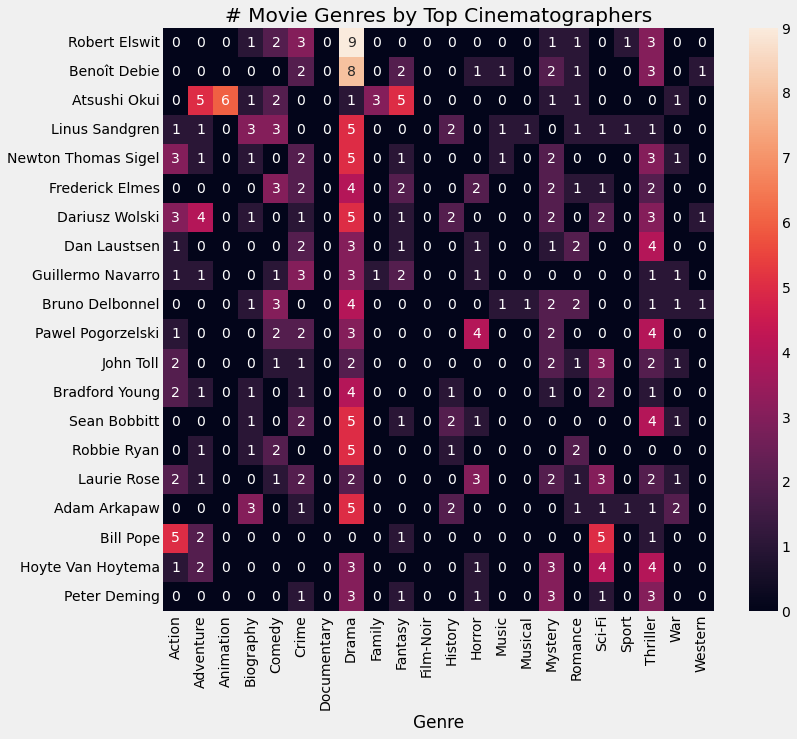

In [153]:
# Select columns
cols = ['Title','Cinematographer','Genre']
# Create genre by cinematographer dataframe
df_cinema_genre = df[cols].copy()
# Explode genre and cinematographer values
df_cinema_genre = split_explode(df_cinema_genre, 'Genre')
df_cinema_genre = split_explode(df_cinema_genre, 'Cinematographer')
# Count values
cinema_movies = counter_display(df_cinema, 'Cinematographer', 'Title', N).index
plot_ct_cinema_genre = pd.crosstab(df_cinema_genre['Cinematographer'], df_cinema_genre['Genre']).loc[cinema_movies].iloc[1:,:]
# Plot
xsize = len(plot_ct_cinema_genre.columns) // 2
ysize = len(plot_ct_cinema_genre.index) // 2
fig, ax = plt.subplots(figsize=(xsize,ysize))
sns.heatmap(plot_ct_cinema_genre, annot=True, fmt="d", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('# Movie Genres by Top Cinematographers');

### Partnerships

#### Cinematographer / Director

In [154]:
# Top partnerships between Cinematographer / Director
df_cinema_pair = df_cinema.copy()
gb_cinema_director_pair = double_group_info(df_cinema_pair, ['Cinematographer', 'Director'], TOP=1)
show_all(gb_cinema_director_pair.nlargest(N, ('Title','count'), keep='all').style.background_gradient(subset='imdbRating').set_precision(2))

##### At least 2 movies

In [155]:
# Partnership between Cinematographer / Director (at least 2 movies)
df_cinema_director = df_cinema[['Cinematographer','Director','Title']].copy()
df_cinema_director = split_explode(df_cinema_director, 'Cinematographer')
df_cinema_director = split_explode(df_cinema_director, 'Director')
gb_cinema_director = df_cinema_director.groupby(['Cinematographer','Director']).agg({'Title':['count','; '.join]})
show_all(gb_cinema_director[gb_cinema_director[('Title','count')] > 1])

## Actors

In [156]:
# Select columns
cols = ['Title','Year','Genre','Director','Actors','imdbRating','imdbVotes']
# Create actors dataframe
df_actors = df[cols].copy()

In [157]:
# Filter documentaries
condition = 'Documentary'
df_actors = df_actors[~df_actors.Genre.str.contains(condition)].reset_index(drop=True)
# Drop duplicates
df_actors.drop_duplicates(subset=['Title','Year','Director'], keep='first', inplace=True) # include director for cases likes Swan Song (2021)
# Drop list of 'too small role' - 'uncredited' actors with multiple appearances 
list_actors_drop = ['Mark Falvo','Arnold Montey','Rosemary Howard','Jimmy Star','Joseph Oliveira',
                    'Bridget Hoffman','Kadrolsha Ona Carole','Richard Price','Doris McCarthy','Bern Collaço',
                    'Dee Bradley Baker','Jorge Leon Martinez','John Gettier','Jeffrey Neil','David Evestaff',
                    'Martin Palmer','J. Nathan Simmons','Michael E. Stogner','John W. Iwanonkiw',
                    'Richard Nixon','John F. Kennedy','Lyndon B. Johnson', # US presidents appear in documentaries
                    'Martin Luther King','Stan Lee',
                    'Luca De Massis','Jorge Leon','Walter Cronkite','Robert Tinsley','Kenny-Lee Mbanefo']

df_actors['Actors'] = df_actors['Actors'].str.replace(', |'.join(list_actors_drop), '')
df_actors['Actors'] = df_actors['Actors'].str.replace(' ,','')

In [158]:
# Number of actors
df_counter_actors = counter_display(df_actors, 'Actors', 'Title', None)
print('Different actors: ' + str(len(df_counter_actors.index)))

Different actors: 46625


### Top

In [159]:
# Top N actors
N = 20
df_top_actors = df_counter_actors.copy()
top_actors = df_top_actors[df_top_actors.Title > 1].nlargest(N, 'Title', keep='all')
# Get list of top n actors
list_top_actors = top_actors.index.values
list_top_actors.sort()
# Filtering by top actors
df_actor_rating = get_mean_value(df_actors, 'Actors', 'imdbRating')

In [160]:
# Actors with most movies watched
show_all(df_actor_rating[df_actor_rating.Total > 1].nlargest(N, 'Total', keep='all').style.background_gradient(subset='imdbRating').set_precision(2))

### Search

In [161]:
# Search by specific actor (exact string)
search = 'Tom Holland' # Tom Holland != Tom Hollander
df[df.Actors.str.contains('\\b' + search + '\\b')].iloc[:,:-8] 

Title  Year    imdbID         Rated  Runtime  \
41      Avengers: Infinity War  2018   4154756         PG-13      149   
100          Avengers: Endgame  2019   4154796         PG-13      181   
101  Spider-Man: Far from Home  2019   6320628  PG-13, TV-14      129   
213                     Onward  2020   7146812     TV-PG, PG      102   
307     The Devil All the Time  2020   7395114             R      138   
880    Spider-Man: No Way Home  2021  10872600         PG-13      148   

                                             Genre                  Director  \
41                       Action, Adventure, Sci-Fi  Joe Russo, Anthony Russo   
100               Action, Adventure, Drama, Sci-Fi  Joe Russo, Anthony Russo   
101                      Action, Adventure, Sci-Fi                 Jon Watts   
213  Animation, Adventure, Comedy, Family, Fantasy               Dan Scanlon   
307                         Crime, Drama, Thriller            Antonio Campos   
880             Action, Adventure, Fantasy, Sci-Fi                 Jon Watts   

                                                Writer  \
41   Stephen McFeely, Jim Starlin, Stan Lee, Steve ...   
100  Stephen McFeely, Jim Starlin, Stan Lee, Steve ...   
101  Stan Lee, Steve Ditko, Chris McKenna, Erik Som...   
213            Jason Headley, Keith Bunin, Dan Scanlon   
307   Paulo Campos, Antonio Campos, Donald Ray Pollock   
880  Stan Lee, Steve Ditko, Chris McKenna, Erik Som...   

                Cinematographer  \
41                Trent Opaloch   
100               Trent Opaloch   
101            Matthew J. Lloyd   
213  Sharon Calahan, Adam Habib   
307                 Lol Crawley   
880                 Mauro Fiore   

                                                Actors  ... imdbRating  \
41   Tony Dupar, Cobie Smulders, Denisha Gillespie,...  ...        8.4   
100  Cobie Smulders, Sam Hargrave, Jeremy Renner, N...  ...        8.4   
101  Giuseppe Andriolo, Cobie Smulders, Peter Billi...  ...        7.4   
213  Ali Wong, Chris Pratt, Mel Rodriguez, Wilmer V...  ...        7.4   
307  Cade Tropeano, Justin Matthew Smith, Michael H...  ...        7.1   
880  Art Sunday, Juan Szilagyi, Marvin E. West, Ema...  ...        8.3   

    imdbVotes                                               Plot  \
41    1031600  As the Avengers and their allies have continue...   
100   1072668  After the devastating events of Avengers: Infi...   
101    470563  Our friendly neighborhood Super Hero decides t...   
213    144087  In a suburban fantasy world, two teenage elf b...   
307    130011  Set in rural southern Ohio and West Virginia, ...   
880    673812  Peter Parker's secret identity is revealed to ...   

                                            Production  \
41   Walt Disney Pictures, Jason Roberts Production...   
100               Walt Disney Pictures, Marvel Studios   
101  Canadian Film or Video Production Tax Credit (...   
213      Walt Disney Pictures, Pixar Animation Studios   
307         Bronx Moving Co., Nine Stories Productions   
880  Columbia Pictures, Marvel Studios, Pascal Pict...   

                                           Distributor  \
41   Buena Vista International, Hotstar, Walt Disne...   
100  CJ CGV Viet Nam, Buena Vista International, Wa...   
101  Svensk Filmindustri (SF), Sony Pictures Home E...   
213  Walt Disney Company Nordic, Blitz, Ster-Kineko...   
307                                            Netflix   
880  Columbia Pictures, Sony Pictures Home Entertai...   

                                              Producer  \
41   Jon Favreau, Ari Costa, Stan Lee, Edu Sallouti...   
100  Jon Favreau, Stephen McFeely, Ari Costa, Stan ...   
101  Chris Buongiorno, Stan Lee, Eric Hauserman Car...   
213  Becky Neiman, Kori Rae, Pete Docter, Daniela S...   
307  Marc A. Hammer, Jake Gyllenhaal, Jared Goldman...   
880  Chris Buongiorno, Louis D'Esposito, Avi Arad, ...   

                           Composer      BoxOffice       Budget  \
41             

### imdbRating

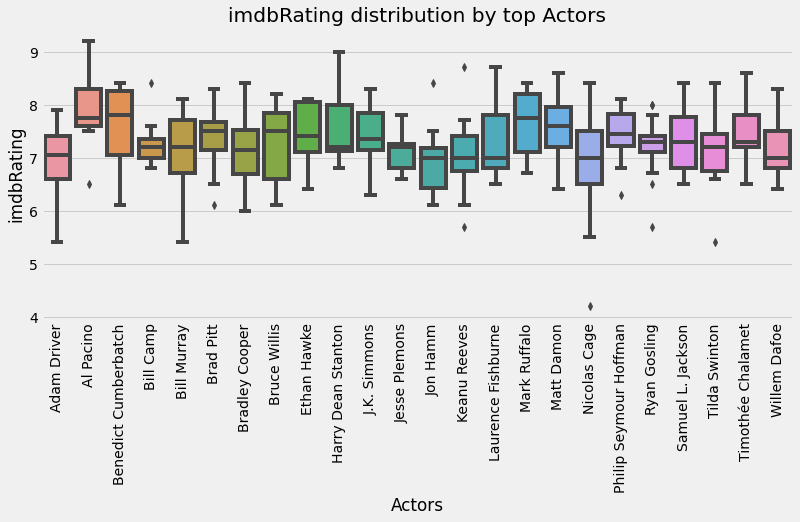

In [162]:
# Movie rating distribution by top Actors
df_dist_top_actor = df_actors.copy()
df_dist_top_actor = split_explode(df_dist_top_actor, 'Actors')    
df_dist_top_actor = df_dist_top_actor[df_dist_top_actor['Actors'].str.contains('|'.join(list_top_actors))]
df_dist_top_actor = df_dist_top_actor[['Actors','imdbRating']].sort_values(by='Actors')

# Plot
x = df_dist_top_actor['Actors']
y = df_dist_top_actor['imdbRating']

ratings = [1,10]
xsize = len(x.unique()) // 2
ysize = ratings[1] // 2
_, ax = plt.subplots(figsize=(xsize,ysize))
sns.boxplot(x, y)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90) 
plt.title('imdbRating distribution by top Actors')
plt.show()

In [163]:
# Highest rating actors
show_all(df_actor_rating[df_actor_rating['Total'] > 2].nlargest(N, 'imdbRating', keep='all')) # multiple results from The Godfather trilogy

In [164]:
# Lowest rating actors
show_all(df_actor_rating[df_actor_rating['Total'] > 1].nsmallest(N, 'imdbRating', keep='all'))

### Genre

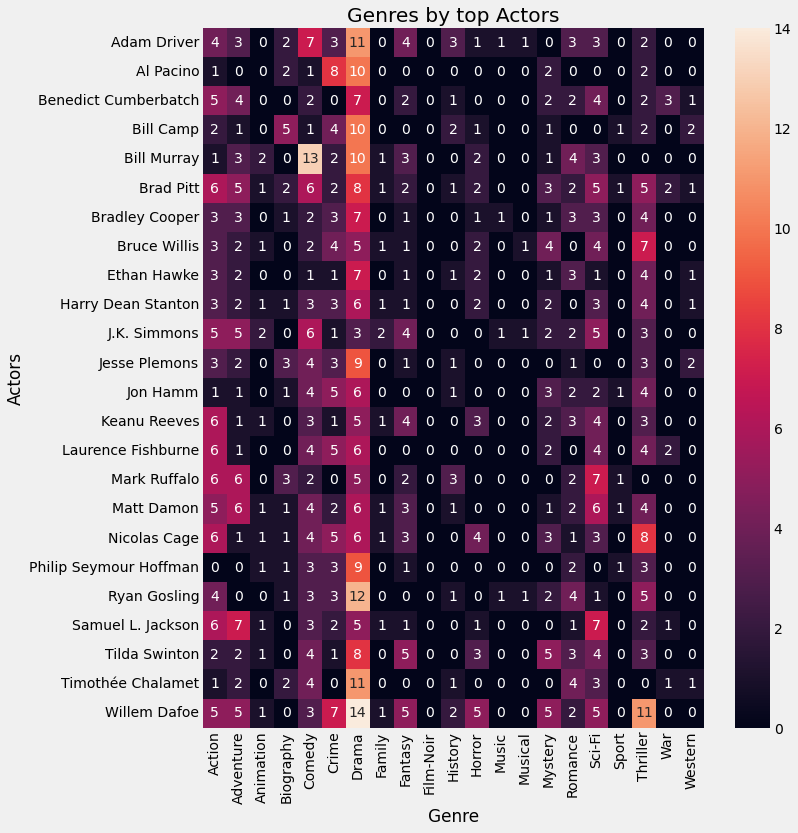

In [165]:
# Genre by Actor
df_genre_actor = df_actors.copy()
# Select columns
cols = ['Genre','Actors']
for col in cols: 
    df_genre_actor = split_explode(df_genre_actor, col)

# Top actors
plot_ct_actor_genre = pd.crosstab(df_genre_actor['Actors'], df_genre_actor['Genre']).loc[list_top_actors]

# Plot
xsize = len(plot_ct_actor_genre.columns) // 2
ysize = len(plot_ct_actor_genre.index) // 2
_, ax = plt.subplots(figsize=(xsize,ysize))
plt.title('Genres by top Actors')
sns.heatmap(plot_ct_actor_genre, annot=True, fmt="d", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [166]:
# Top actor in each genre
df_genre_top_actor = df_genre_actor.groupby(['Actors','Genre']).agg({'Title':['count','; '.join]}).sort_values(('Title','count'), ascending=False).reset_index()
df_genre_top_actor = df_genre_top_actor.groupby('Genre').apply(lambda x: x.nlargest(1, ('Title','count'), keep='first'))
df_genre_top_actor = df_genre_top_actor.droplevel(1).drop('Genre', axis=1)
show_all(df_genre_top_actor)

### Votes

In [167]:
# Actor average votes by movie
df_actor_votes = df_actors.copy()
# Explode actor values
df_actor_votes = split_explode(df_actor_votes, 'Actors')
df_actor_avg_votes = get_mean_value(df_actor_votes, 'Actors', 'imdbVotes')
df_actor_avg_votes['imdbRating'] = get_mean_value(df_actor_votes, 'Actors', 'imdbRating')['imdbRating']
df_actor_avg_votes['imdbVotes'] = df_actor_avg_votes['Total'] * df_actor_avg_votes['imdbVotes']
# Actors with most votes (more than X movie watched)
show_all(df_actor_avg_votes[df_actor_avg_votes.Total > 1].nlargest(N, 'imdbVotes', keep='all'))

In [168]:
# Less known actors to follow
TOP = 10
show_all(df_actor_avg_votes[(df_actor_avg_votes['Total'] > 1) & 
                            (df_actor_avg_votes['imdbVotes'] < df_actor_avg_votes['imdbVotes'].quantile(0.25)) & 
                            (df_actor_avg_votes['imdbRating'] > df_actor_avg_votes['imdbRating'].quantile(0.25))] \
         .sort_values(['Total','imdbRating','imdbVotes'], ascending=[False,False,False]).nlargest(TOP, 'Total', keep='first'))

### Pairing

In [169]:
# Common Actors pairing
df_actors_pairs = pairing(df_actors, 'Actors')

## TOO MANY ADDITIONAL CREW ACTORS
# Show top pairs
N = 10
show_all(df_actors_pairs.nlargest(N, 'Count', keep='first'))

## Country

In [170]:
# Select columns
cols = ['Title','Year','Director','Language','Country','imdbRating','Production','Timestamp']
# Create country dataframe
df_country = df[cols].copy()

In [171]:
# Number of different countries
df_country_counter = counter_display(df_country, 'Country', 'Title', None)
print('Different countries: ' + str(len(df_country_counter.index)))
print()
print(', '.join(list(df_country_counter.index)))

Different countries: 74

United States, United Kingdom, France, Canada, Germany, Japan, Denmark, Australia, China, Belgium, Sweden, Spain, Italy, South Korea, Mexico, Norway, Netherlands, Ireland, Poland, Hong Kong, Brazil, Switzerland, Portugal, Hungary, Finland, Russia, Iceland, India, New Zealand, Argentina, Romania, Austria, Greece, Soviet Union, South Africa, Luxembourg, Czechia, Senegal, West Germany, Iran, Turkey, Estonia, Cyprus, Thailand, Taiwan, United Arab Emirates, Slovenia, Singapore, Tunisia, Indonesia, Latvia, Malaysia, Malta, Colombia, Ukraine, Qatar, Israel, Venezuela, Bosnia & Herzegovina, Czechoslovakia, Monaco, Croatia, Serbia, Côte d’Ivoire, Jordan, Zambia, Lithuania, Morocco, Malawi, Uruguay, Cambodia, Congo - Kinshasa, Lebanon, Peru


In [172]:
# Clean values
df_country['Country'] = pd.Series([s.replace('Congo - Kinshasa','Congo') for s in df_country['Country']], index=df_country.index)

In [173]:
# Country of last watched movies
N = 10
df_country.tail(N)

Title  Year           Director  \
1059           Confess, Fletch  2022       Greg Mottola   
1060       From Dusk Till Dawn  1996   Robert Rodriguez   
1061             Speak No Evil  2022  Christian Tafdrup   
1062                      Tusk  2014        Kevin Smith   
1063              Flux Gourmet  2022   Peter Strickland   
1064                    Athena  2022      Romain Gavras   
1065       I Used to Be Famous  2022    Eddie Sternberg   
1066            Only the Brave  2017    Joseph Kosinski   
1067              Bullet Train  2022       David Leitch   
1068  The Silence of the Lambs  1991     Jonathan Demme   

                                 Language  \
1059                              English   
1060                     English, Spanish   
1061               English, Dutch, Danish   
1062                              English   
1063               English, Greek, German   
1064                               French   
1065                              English   
1066                              English   
1067  English, Japanese, Spanish, Russian   
1068                       English, Latin   

                                     Country  imdbRating  \
1059                           United States         6.5   
1060                   United States, Mexico         7.2   
1061                    Denmark, Netherlands         6.6   
1062                   Canada, United States         5.3   
1063  United Kingdom, Hungary, United States         5.9   
1064                                  France         6.8   
1065                          United Kingdom         6.7   
1066                           United States         7.6   
1067                    United States, Japan         7.5   
1068                           United States         8.6   

                                             Production           Timestamp  
1059                                            Miramax 2022-09-16 23:46:04  
1060  Miramax, A Band Apart, Los Hooligans Productio... 2022-09-19 23:07:11  
1061  Netherlands Film Production Incentive, OAK Mot... 2022-09-21 22:24:37  
1062                                  SModcast Pictures 2022-09-22 23:29:11  
1063  Metrol Technology, Bankside Films, Lunapark Pi... 2022-09-23 23:40:54  
1064                             Lyly Films, Iconoclast 2022-09-24 14:00:32  
1065                    Viewfinder, Forty Foot Pictures 2022-09-24 16:14:25  
1066  Di Bonaventura Pictures, Relevant Entertainmen... 2022-09-25 23:35:45  
1067  Sony Pictures Entertainment, CTB Inc., 87North... 2022-09-26 23:44:38  
1068      Strong Heart/Demme Production, Orion Pictures 2022-09-27 23:47:53

### Top

In [174]:
# Top countries
TOP = 20

# Simple solution without filtering by year 
#df_country_counter.nlargest(N, 'Title', keep='all')

top_by_year(df_country, 'Country', years)

# Top 2 countries are always US and UK (since 2018)
# 2021 holds most top results by country since it was the year with clearly most movies watched

### imdbRating

In [175]:
# Countries with higher average rating
df_country_rat = get_mean_value(df_country, 'Country', 'imdbRating')
# List of top countries
top_countries = df_country_counter.index[:3] # drop top 3 countries - most common
df_country_filter = df_country_rat.reset_index() 
df_country_filter = df_country_filter[~df_country_filter['Country'].isin(top_countries)].set_index('Country')

# More than 3 movies watched
df_top_country_rat = df_country_filter[df_country_filter.Total > 3].nlargest(N, 'imdbRating', keep='all')
show_all(df_top_country_rat)

In [176]:
# "Rare" Countries, good movies
df_rare_country_rat = df_country_filter[df_country_filter.Total < 3].nlargest(N, 'imdbRating', keep='all')
show_all(df_rare_country_rat)

### Connections

#### Country / Director

In [177]:
# Relation between Country / Director
df_country_director = df_country.copy()
gb_country_director_pair = double_group_info(df_country_director, ['Country', 'Director'], TOP=1)
show_all(gb_country_director_pair)

#### Country / Production Company

In [178]:
# Relation between Country / Production Company
df_country_company = df_country.copy()
gb_country_company_pair = double_group_info(df_country_company, ['Country', 'Production'], TOP=1)
show_all(gb_country_company_pair.nlargest(TOP, ('Title','count'), keep='all'))

## Language

In [179]:
# Select columns
cols = ['Title','Year','Director','imdbRating','Language','Timestamp']
# Create language dataframe
df_language = df[cols].copy()

In [180]:
# Number of different languages
df_language_counter = counter_display(df, 'Language', 'Title', None)
print('Different languages: ' + str(len(df_language_counter.index)))
print()
print(', '.join(list(df_language_counter.index)))

Different languages: 109

English, French, Spanish, German, Italian, Japanese, Russian, Latin, Mandarin, Korean, Arabic, Danish, Swedish, Portuguese, Norwegian, Cantonese, Hindi, Greek, Hebrew, American Sign Language, Chinese, Romanian, Dutch, Turkish, Polish, Finnish, Icelandic, Hungarian, Ukrainian, Czech, None, Indonesian, North American Indian, Thai, Irish, Serbian, Aboriginal, N/A, Bulgarian, Flemish, Nyanja, Yiddish, Persian, Estonian, Xhosa, Vietnamese, Macedonian, Ancient (to 1453), Urdu, Neapolitan, Marathi, Korean Sign Language, Inuktitut, Catalan, Tagalog, Afrikaans, Filipino, Swahili, Wolof, Somali, Maltese, Luxembourgish, Egyptian (Ancient), Sign Languages, Bosnian, Cheyenne, Belarusian, Haitian Creole, Nepali, Dari, Turkmen, Punjabi, Dyula, Sanskrit, Nushi, Hopi, Sumerian, Norse, Old, Washoe, Esperanto, Tupi, Bangla, Tamil, Swiss German, Nama, Tongan, Bemba, Scots, Mixtec, Maori, Assyrian Neo-Aramaic, Syriac, Zulu, Southern Sotho, Spanish Sign Language, Min Nan, Amharic, 

In [181]:
# Language of last watched movies
N = 10
df_language.tail(N)

Title  Year           Director  imdbRating  \
1059           Confess, Fletch  2022       Greg Mottola         6.5   
1060       From Dusk Till Dawn  1996   Robert Rodriguez         7.2   
1061             Speak No Evil  2022  Christian Tafdrup         6.6   
1062                      Tusk  2014        Kevin Smith         5.3   
1063              Flux Gourmet  2022   Peter Strickland         5.9   
1064                    Athena  2022      Romain Gavras         6.8   
1065       I Used to Be Famous  2022    Eddie Sternberg         6.7   
1066            Only the Brave  2017    Joseph Kosinski         7.6   
1067              Bullet Train  2022       David Leitch         7.5   
1068  The Silence of the Lambs  1991     Jonathan Demme         8.6   

                                 Language           Timestamp  
1059                              English 2022-09-16 23:46:04  
1060                     English, Spanish 2022-09-19 23:07:11  
1061               English, Dutch, Danish 2022-09-21 22:24:37  
1062                              English 2022-09-22 23:29:11  
1063               English, Greek, German 2022-09-23 23:40:54  
1064                               French 2022-09-24 14:00:32  
1065                              English 2022-09-24 16:14:25  
1066                              English 2022-09-25 23:35:45  
1067  English, Japanese, Spanish, Russian 2022-09-26 23:44:38  
1068                       English, Latin 2022-09-27 23:47:53

### Top

In [182]:
# Top languages
TOP = 20

# Simple solution without filtering by year 
#df_language_counter.nlargest(N, 'Title', keep='all')

top_by_year(df_language, 'Language', years)

### imdbRating

In [183]:
# Language average rating
df_language_rat = get_mean_value(df_language, 'Language', 'imdbRating')
# List top languages
top_countries = df_language_counter.index[:3] # drop top 3 languages (english, french, spanish)
df_language_filter = df_language_rat.reset_index() 
df_language_filter = df_language_filter[~df_language_filter['Language'].isin(top_countries)].set_index('Language')

# More than 3 movies watched
df_top_language_rat = df_language_filter[df_language_filter.Total > 3].nlargest(N, 'imdbRating', keep='all')
show_all(df_top_language_rat)

In [184]:
# "Rare" Language, good movies
df_rare_language_rat = df_language_filter[df_language_filter.Total < 3].nlargest(N, 'imdbRating', keep='all')
show_all(df_rare_language_rat)

### Connections

#### Language / Director

In [185]:
# Relation between Language / Director
df_language_director = df_language.copy()
gb_language_director_pair = double_group_info(df_language_director, ['Language', 'Director'], TOP=1)
show_all(gb_language_director_pair)

## Ratings (imdbRating & Metascore)

In [186]:
## Example
# https://codingnomads.co/blog/data-analysis-example-analyzing-movie-ratings-with-python/

In [187]:
# Select columns
cols = ['Title','Year','Runtime','Genre','Director','Language','Metascore','imdbRating','imdbVotes','Timestamp']
# Create rating dataframe
df_rating = df[cols].copy()

In [188]:
# imdbRating and Metascore stats (exclude Metascore = 0)
df_rating['Metascore'] = df_rating['Metascore'].fillna(0).astype(int)
df_rating[['imdbRating', 'Metascore']][df_rating['Metascore'] != 0].describe().round(1)

imdbRating  Metascore
count       950.0      950.0
mean          7.1       71.3
std           0.7       12.6
min           3.6        9.0
25%           6.6       64.0
50%           7.1       72.0
75%           7.5       80.0
max           9.2      100.0

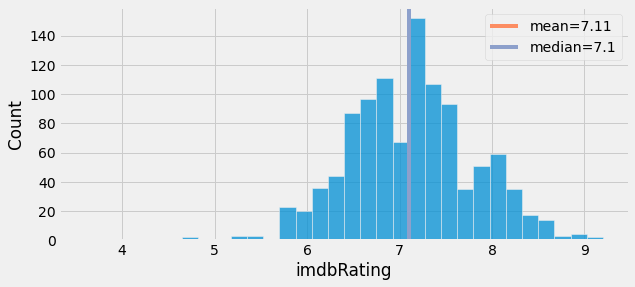

In [189]:
# imdbRating distribution
plot_rating = df_rating['imdbRating']

# Plot
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
ax = sns.histplot(plot_rating, kde_kws=dict(bw=0.2))
ax.axvline(x=plot_rating.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(plot_rating.mean(), 2)}")
ax.axvline(x=plot_rating.median(), c=sns.color_palette("Set2")[2], label=f"median={round(plot_rating.median(), 2)}")
plt.legend();

In [190]:
## https://en.wikipedia.org/wiki/Kurtosis
# Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution 
# and corresponding ways of estimating it from a sample from a population
plot_rating.kurtosis()

0.7674715004297186

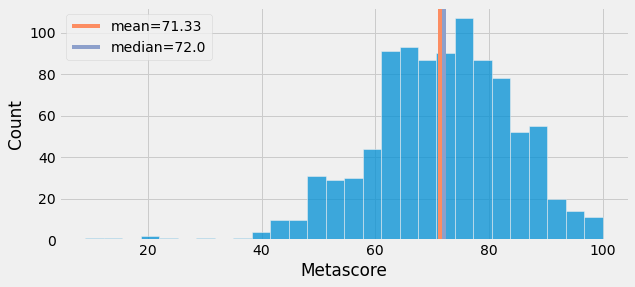

In [191]:
# Metascore distribution
plot_meta = df_rating[df_rating['Metascore'] != 0]['Metascore']

# Plot
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
ax = sns.histplot(plot_meta, kde_kws=dict(bw=0.2))
ax.axvline(x=plot_meta.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(plot_meta.mean(), 2)}")
ax.axvline(x=plot_meta.median(), c=sns.color_palette("Set2")[2], label=f"median={round(plot_meta.median(), 2)}")
plt.legend();

In [192]:
## https://en.wikipedia.org/wiki/Kurtosis
# Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution 
# and corresponding ways of estimating it from a sample from a population
plot_meta.kurtosis()

1.2051852896718316

### Movies by group

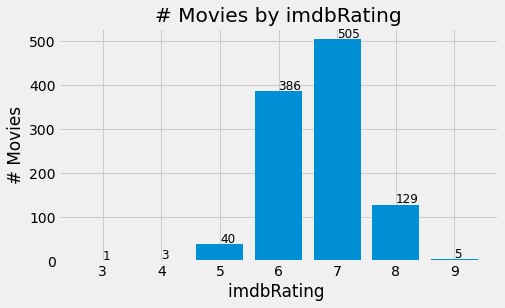

In [193]:
# Number of movies by imdbRating
df_rating_group = df_rating[['Title', 'imdbRating']].groupby((df_rating['imdbRating']//1)).agg({'Title': 'count'})

# Plot
x = df_rating_group.index
y = df_rating_group['Title']
xsize = len(x)
ysize = len(y) - (len(y) // 2)

plt.figure(figsize=(xsize,ysize))
plt.bar(x,y)
plt.title('# Movies by imdbRating')
plt.xlabel('imdbRating ')
plt.ylabel('# Movies')
for i, rate in enumerate(y):
    plt.text(i+3, rate+3, rate, fontdict={'fontsize':12})
    
plt.show()

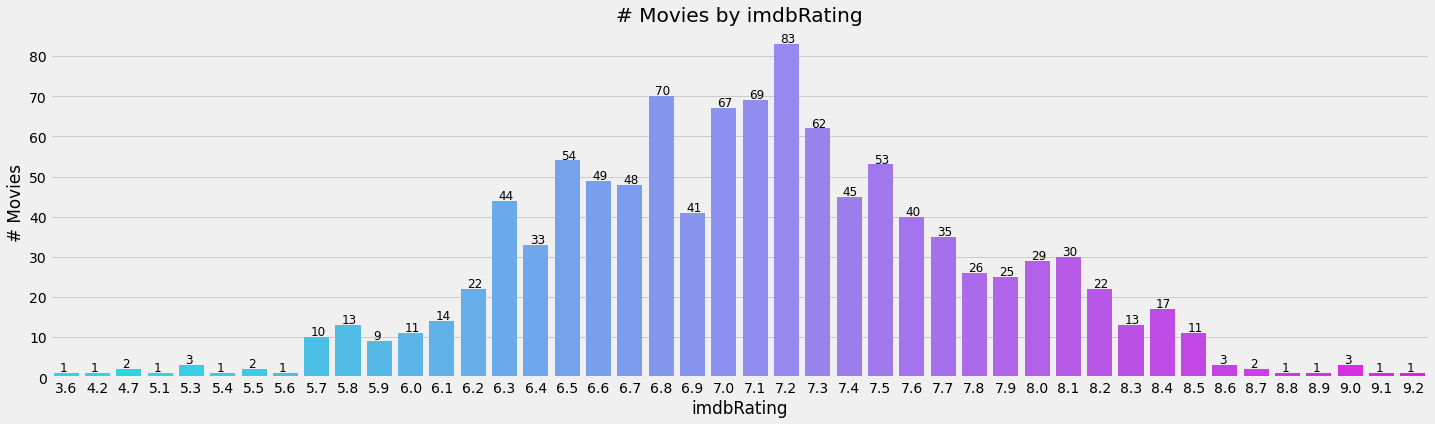

In [194]:
# Number of movies by imdbRating value
df_rating_float = df_rating[['Title', 'imdbRating']].groupby((df_rating['imdbRating'])).agg({'Title': 'count'})

# Plot
x = np.round(df_rating_float.index, 1)
y = df_rating_float.Title
xsize = len(df_rating_float.index) // 2

plt.figure(figsize=(xsize,6))
sns.barplot(x=x, y=y, palette="cool");
for i, rate in enumerate(y):
    plt.text(i-0.2, rate+0.4, rate, fontdict={'fontsize':12})

plt.title('# Movies by imdbRating')
plt.ylabel('# Movies')
plt.show()

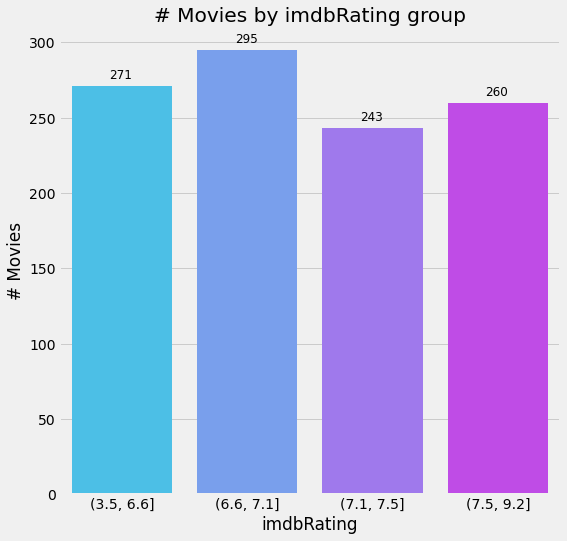

In [195]:
# Number of movies by imdbRating group
# https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
[groups, edges] = pd.qcut(df_rating['imdbRating'], q=4, precision=1, retbins=True) # 4 for quartiles
ratings_avg = df_rating.groupby(groups).agg({"Title": 'count'})

# Plot
ysize = len(ratings_avg) // 2
x = ratings_avg.index
y = ratings_avg['Title']
plt.figure(figsize=(8,8))
sns.barplot(x=x, y=y, palette='cool')
plt.title('# Movies by imdbRating group')
plt.ylabel('# Movies')
for i, rate in enumerate(y):
    plt.text(i-0.1, rate+5, rate, fontdict={'fontsize':12})

plt.show()

In [196]:
# Movies ranked in the 25th percentile minus 2 standard deviations (significant low imdbRating)
qtl_2std = df_rating['imdbRating'].quantile(0.25) - 2*df_rating['imdbRating'].std()
df_rating[df_rating['imdbRating'] < qtl_2std]

Title  Year  Runtime  \
193                        The Room  2003       99   
204  The First Temptation of Christ  2019       46   
832      Prisoners of the Ghostland  2021      103   
985                We Are the Flesh  2016       79   
986               She Dies Tomorrow  2020       86   

                                         Genre               Director  \
193                                      Drama           Tommy Wiseau   
204                                     Comedy    Rodrigo Van Der Put   
832          Action, Fantasy, Sci-Fi, Thriller              Sion Sono   
985                     Drama, Fantasy, Horror  Emiliano Rocha Minter   
986  Drama, Fantasy, Horror, Mystery, Thriller            Amy Seimetz   

                                Language  Metascore  imdbRating  imdbVotes  \
193                              English          9         3.6      88738   
204                           Portuguese          0         4.7       3408   
832  English, Japanese, Mandarin, French         53         4.2      10864   
985                              Spanish         62         4.7       2780   
986                              English         80         5.1       6282   

              Timestamp  
193 2020-04-22 13:09:00  
204 2020-05-04 20:43:37  
832 2022-01-28 23:40:23  
985 2022-06-14 22:10:38  
986 2022-06-14 23:37:19

### Search

In [197]:
# Search by rating
RATING = 6
gb_rating = df_rating[df_rating['imdbRating'] == RATING][['Title','Runtime','imdbRating']].sort_values(by='imdbRating').groupby('imdbRating').agg({'Title':'; '.join})
show_all(gb_rating)

In [198]:
# Search by rating (below given rating)
df_rating_below = df_rating[df_rating['imdbRating'] < RATING][['Title','Runtime','imdbRating']]
print('Movies below rating of ' + str(RATING) + ': ' + str(len(df_rating_below)))
gb_rating_below = df_rating_below.sort_values(by='imdbRating').groupby('imdbRating').agg({'Title':'; '.join})
show_all(gb_rating_below)

Movies below rating of 6: 44


### This year

In [199]:
# Movies watched this year below rating (see above)
df_rating_below_this_year  = df_rating[df_rating['Timestamp'].dt.year == current_year][df_rating['imdbRating'] < RATING][['Title','Runtime','imdbRating']]
print('Movies below rating of ' + str(RATING) + ' watched this year: ' + str(len(df_rating_below_this_year)))
pct_total = (len(df_rating_below_this_year) / len(df_rating_below)) * 100
print('Percentage of total: ' + str(round(pct_total)) + ' %')
df_rating_below_this_year.sort_values(by='imdbRating')

Movies below rating of 6 watched this year: 21
Percentage of total: 48 %


Title  Runtime  imdbRating
832   Prisoners of the Ghostland      103         4.2
985             We Are the Flesh       79         4.7
986            She Dies Tomorrow       86         5.1
1038               Spin Me Round      104         5.3
1062                        Tusk      102         5.3
969                    High-Rise      119         5.5
1047                Silent Night       92         5.7
806                   Lost River       95         5.7
893                   Studio 666      106         5.7
883             Save Yourselves!       93         5.7
831         The Greasy Strangler       93         5.7
961                         Dual       94         5.8
968                    Encounter      108         5.8
1008                      Baskin       97         5.8
932                   Hellbender       86         5.8
984     Beyond the Black Rainbow      110         5.9
861                          Cam       94         5.9
995         Crimes of the Future      107         5.9
855             Uncle Peckerhead       97         5.9
1052                Resurrection      103         5.9
1063                Flux Gourmet      111         5.9

In [200]:
# Movies with highest rating watched this year
df_current_year = df_rating[df_rating['Timestamp'].dt.year == current_year]
# No documentaries, no duplicated
df_current_year = df_current_year[~df_current_year['Genre'].str.contains('Documentary')][~df.duplicated(['Title','Year'], keep='last')]
df_current_year.nlargest(N, 'imdbRating', keep='all')

Title  Year  Runtime  \
898   One Flew Over the Cuckoo's Nest  1975      133   
787                      Interstellar  2014      169   
1068         The Silence of the Lambs  1991      118   
798                       City Lights  1931       87   
802                      Modern Times  1936       87   
979                       Rear Window  1954      112   
844                           Amadeus  1984      160   
864                The Great Dictator  1940      125   
989                      Come and See  1985      142   
1043                Top Gun: Maverick  2022      130   

                         Genre           Director  \
898                      Drama       Milos Forman   
787   Adventure, Drama, Sci-Fi  Christopher Nolan   
1068    Crime, Drama, Thriller     Jonathan Demme   
798     Comedy, Drama, Romance    Charles Chaplin   
802     Comedy, Drama, Romance    Charles Chaplin   
979          Mystery, Thriller   Alfred Hitchcock   
844    Biography, Drama, Music       Milos Forman   
864         Comedy, Drama, War    Charles Chaplin   
989       Drama, Thriller, War        Elem Klimov   
1043             Action, Drama    Joseph Kosinski   

                                     Language  Metascore  imdbRating  \
898                                   English         84         8.7   
787                                   English         74         8.6   
1068                           English, Latin         85         8.6   
798                             None, English         99         8.5   
802                                   English         96         8.5   
979                                   English        100         8.5   
844   English, Italian, Latin, German, French         88         8.4   
864                 English, Esperanto, Latin          0         8.4   
989               Russian, Belarusian, German          0         8.4   
1043                                  English         78         8.4   

      imdbVotes           Timestamp  
898      989369 2022-03-26 21:51:26  
787     1750598 2022-01-01 00:52:28  
1068    1413468 2022-09-27 23:47:53  
798      182547 2022-01-05 23:50:08  
802      238804 2022-01-09 16:23:00  
979      483706 2022-06-08 23:31:23  
844      395642 2022-02-06 23:09:53  
864      221304 2022-02-24 23:36:38  
989       76439 2022-06-16 23:24:28  
1043     379742 2022-08-24 23:38:59

### Hidden Gems

In [201]:
# Select columns and data
df_hidden_gems = df_rating.copy()

# General filter
#df_hidden_gems = df_hidden_gems[df_hidden_gems['Year'] < current_year-1]
df_hidden_gems = df_hidden_gems[~df_hidden_gems['Genre'].str.contains('Documentary')]
# Clean metascore
df_hidden_gems['Metascore'].replace('N/A', 0, regex=True, inplace=True)
df_hidden_gems['Metascore'] = df_hidden_gems['Metascore'].astype(int)
# Sum imdbRating with normalized metascore to create a global rating
df_hidden_gems['Rate20'] = df_hidden_gems['imdbRating'] + (df_hidden_gems['Metascore'] / 10)
df_hidden_gems.shape

(1016, 11)

In [202]:
# Create filters - number of votes and rating
print('A hidden gem is a movie with the following parameters:')
qtl1 = 25
vote_qtl = df_hidden_gems['imdbVotes'].quantile(qtl1/100) # less than 25% quantile of votes
print(f'- Less than {int(qtl1)}% quantile of votes: {int(vote_qtl)} votes')
qtl2 = 40
rate20_qtl = df_hidden_gems['Rate20'].quantile(qtl2/100) # more than 40% quantile of rate20 (imdbRating + Metascore*)
print(f'- A combined rating of more than {int(qtl2)}% quantile of rate20: {rate20_qtl}')
print()
# Filter dataframe
df_hidden_gems = df_hidden_gems[df_hidden_gems['imdbVotes'] < vote_qtl][df_hidden_gems['Rate20'] > rate20_qtl]

# Hidden gems
TOP = 30
show_all(df_hidden_gems.nlargest(TOP, 'Rate20', keep='all'))

## By year
#[
#    [
#        print(str(year)),
#        show_all(df_hidden_gems[df_hidden_gems['Date'].dt.year == year].nlargest(30, 'Rate20', keep='all')),
#        print('\n')
#    ] for year in years
#];

A hidden gem is a movie with the following parameters:
- Less than 25% quantile of votes: 17877 votes
- A combined rating of more than 40% quantile of rate20: 13.4



### Relationship

#### Runtime / imdbRating 

In [203]:
# Correlation?
df_rating[['Runtime','imdbRating']].corr(method='pearson').round(2)

Runtime  imdbRating
Runtime        1.00        0.29
imdbRating     0.29        1.00

In [204]:
# Statistics
df_runtime_rating = df_rating[['Runtime','imdbRating']].copy()
df_runtime_rating.describe().round(1)

Runtime  imdbRating
count   1069.0      1069.0
mean     109.8         7.1
std       21.4         0.7
min       40.0         3.6
25%       95.0         6.6
50%      107.0         7.1
75%      122.0         7.5
max      218.0         9.2

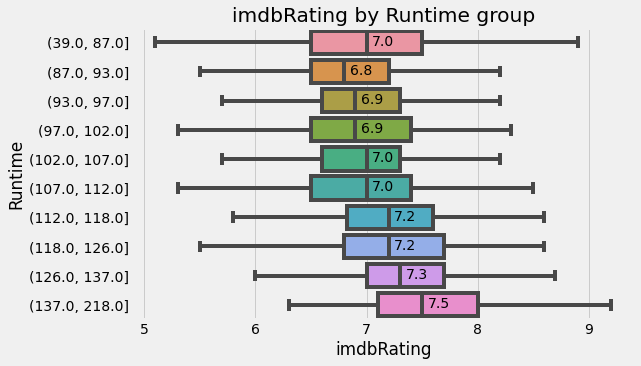

In [205]:
# Movie imdbRating mean by runtime group
# https://medium.com/analytics-vidhya/exploratory-data-analysis-imdb-dataset-cff0c3991ad5
[groups, edges] = pd.qcut(df_runtime_rating['Runtime'], 10, precision=0, retbins=True)
ratings_avg = df_runtime_rating.groupby(groups).agg({"imdbRating": np.median})

# Plot
ysize = len(ratings_avg) // 2

plt.figure(figsize=(8,ysize))
sns.boxplot(y=groups, x="imdbRating", data=df_runtime_rating, orient="h", showfliers=False)
for i, rate in enumerate(ratings_avg["imdbRating"]):
    plt.text(rate+0.05, i+0.1, round(rate,1))
plt.title('imdbRating by Runtime group')
plt.show()

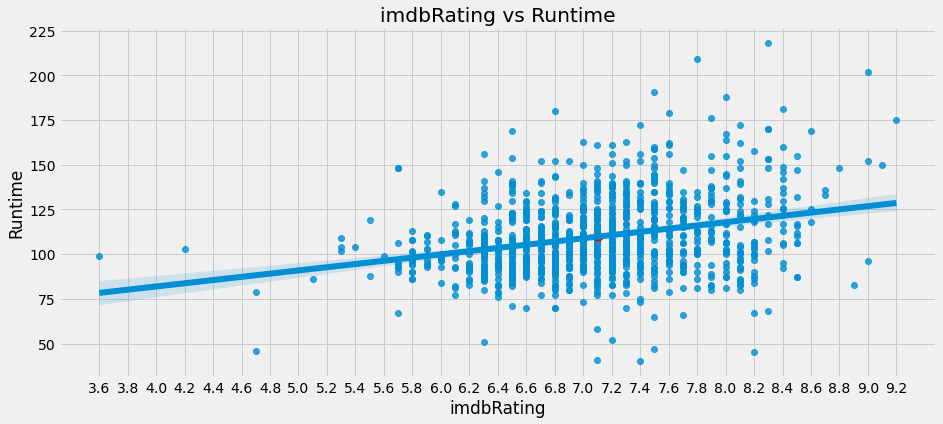

In [206]:
# Movie centroid based on runtime and imdbRating
# Plot
x = df_runtime_rating['imdbRating']
y = df_runtime_rating['Runtime']
centroid = df_runtime_rating.mean(axis=0) # centroid
xticks = np.arange(x.min(), x.max()+0.1, step=0.2)
xsize = len(xticks) // 2

plt.figure(figsize=(xsize, 6))  
sns.regplot(x=x, y=y); 
plt.scatter(centroid[1], centroid[0], color='r', marker='x');
plt.xticks(xticks)
plt.title('imdbRating vs Runtime')
plt.show()

In [207]:
# https://stackoverflow.com/questions/45418353/get-nearest-coordinates-from-pandas-df-from-centroid-of-coordinates

# The center will just be the average x and y 
# plotme.sub(plotme.mean()).pow(2).sum(1).idxmin()
#df.loc[plotme.loc[[plotme.sub(plotme.mean()).pow(2).sum(1).idxmin()]].index]

centroid

Runtime       109.831618
imdbRating      7.105706
dtype: float64

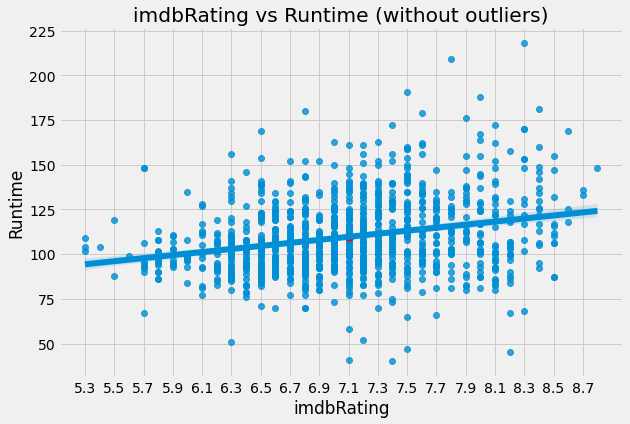

In [208]:
# Movie centroid based on runtime and imdbRating
# Remove outliers
# IQR - Interquartile Range
x = df_runtime_rating['imdbRating']
q25, q75 = np.quantile(x, [0.25 ,0.75])
iqr = q75 - q25
# Lower and higher filters
lower = q25 - 1.5*iqr
higher = q75 + 1.5*iqr
# Filter values
df_runtime_rating_filtered = df_runtime_rating[(x > lower) & (x < higher)]

# Plot
x = df_runtime_rating_filtered['imdbRating']
y = df_runtime_rating_filtered['Runtime']
centroid_filtered = df_runtime_rating_filtered.mean(axis=0) # centroid
xticks = np.arange(x.min(), x.max()+0.1, step=0.2)
xsize = len(xticks) // 2

plt.figure(figsize=(xsize, 6))
sns.regplot(x=x, y=y); 
plt.scatter(centroid[1], centroid[0], color='r', marker='x');
plt.xticks(xticks)
plt.title('imdbRating vs Runtime (without outliers)')
plt.show()

In [209]:
# There's no big difference without outliers
centroid_filtered

Runtime       109.772212
imdbRating      7.107278
dtype: float64

In [210]:
# Movie closer to centroid, based on runtime and imdbRating
# sub - subtract mean runtime and rating values
# pow - exponential power
# sum - sum both columns (runtime, imdbRating)
# idxmin - get id of min value
id_min_diff = df_runtime_rating_filtered.sub(df_runtime_rating_filtered.mean()).pow(2).sum(1).idxmin()
df.loc[df_runtime_rating_filtered.loc[[id_min_diff]].index].iloc[:,:-6]

Title  Year   imdbID Rated  Runtime  Genre        Director  \
460  Palmer  2021  6857376     R      110  Drama  Fisher Stevens   

               Writer        Cinematographer  \
460  Cheryl Guerriero  Tobias A. Schliessler   

                                                Actors  ...  \
460  Wendy Conrad, Dean Winters, Wynn Everett, Crai...  ...   

                                                  Plot  \
460  Palmer (Justin Timberlake) recently released f...   

                                            Production Distributor  \
460  Rhea Films, Sidney Kimmel Entertainment, SK Gl...   Apple TV+   

                                              Producer  \
460  Cheryl Guerriero, John Penotti, Brent C. Johns...   

                        Composer BoxOffice Budget           Timestamp  \
460  Tamar-kali, Terlan Mirzeyev         0      0 2021-02-28 23:31:37   

           Date      Time  
460  2021-02-28  23:31:37  

[1 rows x 25 columns]

In [211]:
# Three closest movies to centroid (runtime / rating)
id_min_3diff = df_runtime_rating_filtered.sub(df_runtime_rating_filtered.mean()).pow(2).sum(1).nsmallest(3).index
df.loc[df_runtime_rating_filtered.loc[id_min_3diff].index].iloc[:,:-6]

Title  Year   imdbID      Rated  Runtime  \
460  Palmer  2021  6857376          R      110   
77   Border  2018  5501104          R      110   
516  Pusher  1996  0117407  Not Rated      110   

                                                 Genre              Director  \
460                                              Drama        Fisher Stevens   
77   Crime, Drama, Fantasy, Mystery, Romance, Thriller            Ali Abbasi   
516                                    Crime, Thriller  Nicolas Winding Refn   

                                                Writer        Cinematographer  \
460                                   Cheryl Guerriero  Tobias A. Schliessler   
77   John Ajvide Lindqvist, Isabella Eklöf, Ali Abbasi          Nadim Carlsen   
516                    Nicolas Winding Refn, Jens Dahl          Morten Søborg   

                                                Actors  ...  \
460  Wendy Conrad, Dean Winters, Wynn Everett, Crai...  ...   
77   Eva Melander, Eero Milonoff, Jörgen Thorsson, ...  ...   
516  Laura Drasbæk, Liv Corfixen, Mads Mikkelsen, G...  ...   

                                                  Plot  \
460  Palmer (Justin Timberlake) recently released f...   
77   Tina, who has grotesque, almost animal-like ph...   
516  Frank is a drug pusher on the roll until he ma...   

                                            Production  \
460  Rhea Films, Sidney Kimmel Entertainment, SK Gl...   
77   Meta Film, Meta Film Stockholm, Nordisk Film- ...   
516                               Balboa Entertainment   

                                           Distributor  \
460                                          Apple TV+   
77   PFA Films, TriArt Film, Yleisradio (YLE), Metr...   
516  Galileo Medien AG, Prime Films S.L., Les Acaci...   

                                              Producer  \
460  Cheryl Guerriero, John Penotti, Brent C. Johns...   
77   Anna Croneman, Anna Marina Skouros, Ted Farnsw...   
516  Peter Aalbæk Jensen, Teddy Gerberg, Henrik Dan...   

                            Composer BoxOffice        Budget  \
460      Tamar-kali, Terlan Mirzeyev         0             0   
77   Christoffer Berg, Martin Dirkov         0             0   
516       Peter Peter, Povl Kristian         0  DKK6,000,000   

              Timestamp        Date      Time  
460 2021-02-28 23:31:37  2021-02-28  23:31:37  
77  2019-03-16 00:32:00  2019-03-16  00:32:00  
516 2021-04-19 23:40:57  2021-04-19  23:40:57  

[3 rows x 25 columns]

#### Metascore / imdbRating

In [212]:
# Clean metascore
df_metaimdb = df_rating[~df_rating['Metascore'].isnull()]
df_metaimdb = df_metaimdb[df_metaimdb['Metascore'] != 0]
df_metaimdb['Metascore'] = df_metaimdb['Metascore'].fillna(0).astype(int)
# Correlation?
df_metaimdb[['Metascore','imdbRating']].corr(method='pearson').round(2)

Metascore  imdbRating
Metascore        1.00        0.49
imdbRating       0.49        1.00

In [213]:
# Convert Metascore to range 0-10
df_metaimdb['Meta10'] = df_metaimdb['Metascore'] / 10
# Difference between imdbRating and normalized Metascore
df_metaimdb['imdbMeta'] = df_metaimdb['imdbRating'] - df_metaimdb['Meta10']
# Reorder and select
cols = ['Title','Year','Genre','Director','imdbRating','Meta10','imdbMeta']
df_metaimdb = df_metaimdb[cols]
df_metaimdb['Year'] = df_metaimdb['Year'].astype(int)
# Statistics
df_metaimdb[['imdbRating','Meta10','imdbMeta']].describe().round(2)

imdbRating  Meta10  imdbMeta
count      950.00  950.00    950.00
mean         7.11    7.13     -0.03
std          0.68    1.26      1.10
min          3.60    0.90     -2.90
25%          6.60    6.40     -0.80
50%          7.10    7.20     -0.10
75%          7.50    8.00      0.60
max          9.20   10.00      5.00

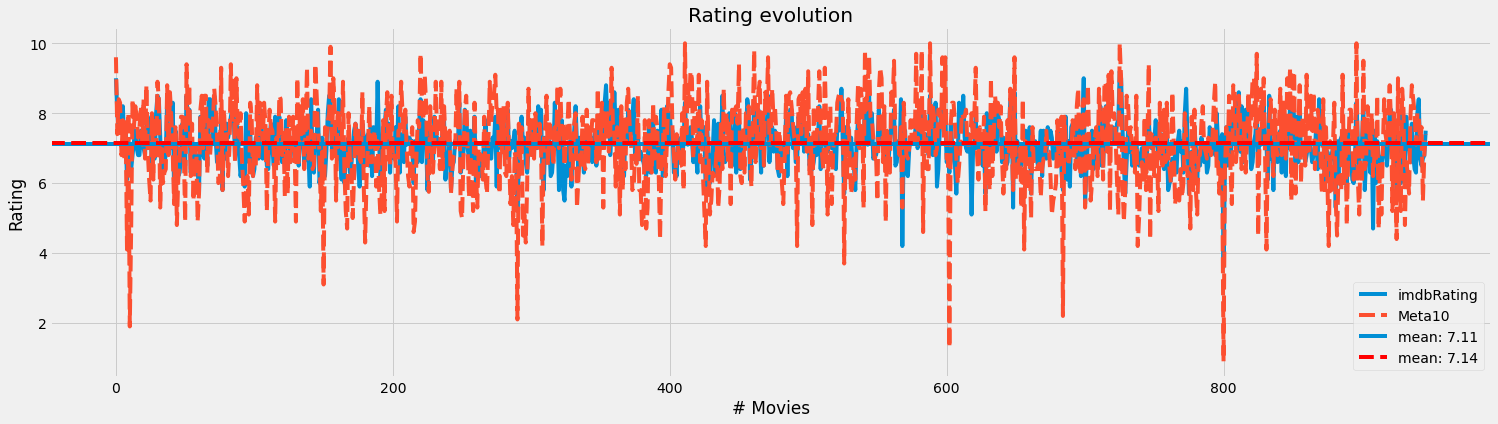

In [214]:
# imdbRating vs Meta10 variance
cols = ['Title','imdbRating','Meta10']
plot_imdbVSmeta = df_metaimdb[cols].groupby('Title').mean()
plot_imdbVSmeta = plot_imdbVSmeta.reset_index(drop=True)

# Plot
x = plot_imdbVSmeta['imdbRating']
y = plot_imdbVSmeta['Meta10']
xsize = len(x) // 40

plt.figure(figsize=(xsize,6))
sns.lineplot(data=plot_imdbVSmeta)
xlabel = 'mean: ' + str(round(x.mean(),2))
ylabel = 'mean: ' + str(round(y.mean(),2))
plt.axhline(y=x.mean(), label=xlabel)
plt.axhline(y=y.mean(), color='red', ls='--', label=ylabel)
plt.title('Rating evolution')
plt.xlabel('# Movies')
plt.ylabel('Rating')
plt.legend()
plt.show()

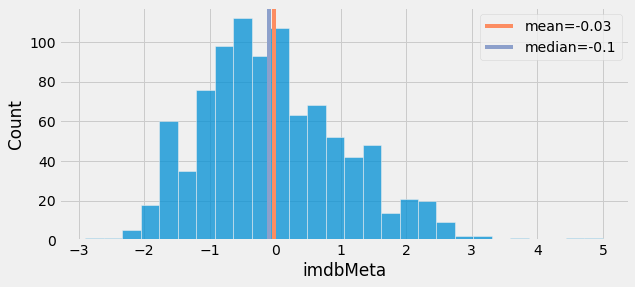

In [215]:
# imdbMeta distribution 
plot_metaimdb = df_metaimdb['imdbMeta']

# imdbMeta - difference between imdbRating and Metascore (converted to 0 to 10)
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
ax = sns.histplot(plot_metaimdb, kde_kws=dict(bw=0.2))
ax.axvline(x=plot_metaimdb.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(plot_metaimdb.mean(), 2)}")
ax.axvline(x=plot_metaimdb.median(), c=sns.color_palette("Set2")[2], label=f"median={round(plot_metaimdb.median(), 2)}")
plt.legend()
plt.show()

In [216]:
# Top differences between ratings
N = 10
df_metaimdb.loc[abs(df_metaimdb['imdbMeta']).sort_values(ascending=False).index].nlargest(N, 'imdbMeta', keep='all')

Title  Year  \
610                 Run Hide Fight  2020   
967                            8MM  1999   
528   The Babysitter: Killer Queen  2020   
310             Charlie Countryman  2013   
169                       Geostorm  2017   
780               The Unforgivable  2021   
488              Bohemian Rhapsody  2018   
315                  The Gentlemen  2019   
250  Twin Peaks: Fire Walk with Me  1992   
193                       The Room  2003   

                                        Genre          Director  imdbRating  \
610                    Crime, Drama, Thriller       Kyle Rankin         6.3   
967           Crime, Drama, Mystery, Thriller   Joel Schumacher         6.5   
528                            Comedy, Horror               McG         5.8   
310  Action, Comedy, Drama, Romance, Thriller      Fredrik Bond         6.3   
169                  Action, Sci-Fi, Thriller       Dean Devlin         5.3   
780                              Crime, Drama  Nora Fingscheidt         7.1   
488                   Biography, Drama, Music      Bryan Singer         7.9   
315                     Action, Comedy, Crime       Guy Ritchie         7.8   
250          Drama, Horror, Mystery, Thriller       David Lynch         7.2   
193                                     Drama      Tommy Wiseau         3.6   

     Meta10  imdbMeta  
610     1.3       5.0  
967     1.9       4.6  
528     2.2       3.6  
310     3.1       3.2  
169     2.1       3.2  
780     4.1       3.0  
488     4.9       3.0  
315     5.1       2.7  
250     4.5       2.7  
193     0.9       2.7

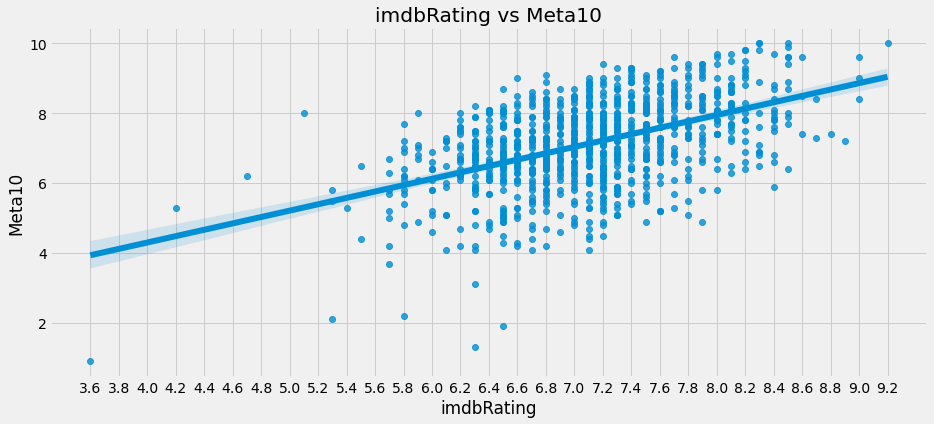

In [217]:
# Relationship between variables (all data)
# Plot
xx = df_metaimdb['imdbRating']
yy = df_metaimdb['Meta10']
# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
xticks = np.arange(xx.min(), xx.max()+0.1, step=0.2)
xsize = len(xticks) // 2

plt.figure(figsize=(xsize, 6))
sns.regplot(x=xx, y=yy)
plt.xticks(xticks)
plt.title('imdbRating vs Meta10')
plt.show()

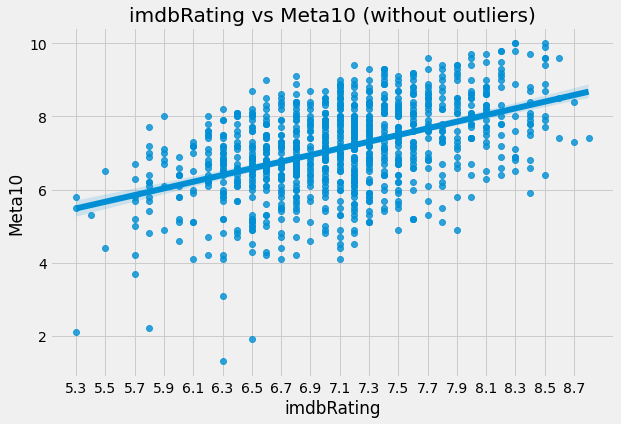

In [218]:
# Remove outliers
# IQR - Interquartile Range
x = df_metaimdb['imdbRating']
q25, q75 = np.quantile(x, [0.25 ,0.75])
iqr = q75 - q25
# Lower and higher filters
lower = q25 - 1.5*iqr
higher = q75 + 1.5*iqr
# Filter values
df_metaimdb_filtered = df_metaimdb[(x > lower) & (x < higher)]

# Plot
xx = df_metaimdb_filtered['imdbRating']
yy = df_metaimdb_filtered['Meta10']
# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
xticks = np.arange(xx.min(), xx.max()+0.1, step=0.2)
xsize = len(xticks) // 2

plt.figure(figsize=(xsize, 6))
sns.regplot(x=xx, y=yy)
plt.xticks(xticks)
plt.title('imdbRating vs Meta10 (without outliers)')
plt.show()

In [219]:
# Movies with better Metascore than imdbRating
rule = df_metaimdb[df_metaimdb['imdbMeta'] < 0]
print('Movies with better Metascore than imdbRating: ' + str(len(rule)))
print('Percentage of total (%): ' + str(round(len(rule) / len(df_metaimdb) * 100)))
print('Total difference: ' + str(round(sum(rule.imdbMeta),1)))
rule.nsmallest(N, 'imdbMeta', keep='all')

Movies with better Metascore than imdbRating: 499
Percentage of total (%): 53
Total difference: -428.9


Title  Year  \
986      She Dies Tomorrow  2020   
571             The Swerve  2018   
455                   Time  2020   
356                  Carol  2015   
367   The Duke of Burgundy  2014   
782   The Power of the Dog  2021   
1063          Flux Gourmet  2022   
419              Nomadland  2020   
8                Lady Bird  2017   
485              High Life  2018   
503    Inside Llewyn Davis  2013   
627       The Green Knight  2021   
686          Winter's Bone  2010   
886           Petite Maman  2021   

                                                  Genre  \
986           Drama, Fantasy, Horror, Mystery, Thriller   
571                             Drama, Horror, Thriller   
455                              Documentary, Biography   
356                                      Drama, Romance   
367                                      Drama, Romance   
782                             Drama, Romance, Western   
1063                              Comedy, Drama, Horror   
419                                               Drama   
8                                         Comedy, Drama   
485   Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...   
503                                Comedy, Drama, Music   
627                           Adventure, Drama, Fantasy   
686                                      Drama, Mystery   
886                                      Drama, Fantasy   

                   Director  imdbRating  Meta10  imdbMeta  
986             Amy Seimetz         5.1     8.0      -2.9  
571           Dean Kapsalis         6.6     9.0      -2.4  
455         Garrett Bradley         6.8     9.1      -2.3  
356             Todd Haynes         7.2     9.4      -2.2  
367        Peter Strickland         6.5     8.7      -2.2  
782            Jane Campion         6.8     8.9      -2.1  
1063       Peter Strickland         5.9     8.0      -2.1  
419              Chloé Zhao         7.3     9.3      -2.0  
8              Greta Gerwig         7.4     9.3      -1.9  
485            Claire Denis         5.8     7.7      -1.9  
503   Ethan Coen, Joel Coen         7.4     9.3      -1.9  
627            David Lowery         6.6     8.5      -1.9  
686            Debra Granik         7.1     9.0      -1.9  
886          Céline Sciamma         7.4     9.3      -1.9

In [220]:
## Particular case of the rule above
# Movies with negative imdbRating and positive Metascore 
rule = df_metaimdb[df_metaimdb['imdbRating'] < 5][df_metaimdb['Meta10'] > 5]
print('Movies with negative imdbRating and positive Metascore: ' + str(len(rule)))
print('Percentage of total (%): ' + str(round(len(rule) / len(df_metaimdb) * 100)))
rule.nlargest(N, 'imdbMeta', keep='all')

Movies with negative imdbRating and positive Metascore: 2
Percentage of total (%): 0


Title  Year                              Genre  \
832  Prisoners of the Ghostland  2021  Action, Fantasy, Sci-Fi, Thriller   
985            We Are the Flesh  2016             Drama, Fantasy, Horror   

                  Director  imdbRating  Meta10  imdbMeta  
832              Sion Sono         4.2     5.3      -1.1  
985  Emiliano Rocha Minter         4.7     6.2      -1.5

In [221]:
# Movies with better imdbRating than Metascore
rule = df_metaimdb[df_metaimdb['imdbMeta'] > 0]
print('Movies with better imdbRating than Metascore: ' + str(len(rule)))
print('Percentage of total (%): ' + str(round(len(rule) / len(df_metaimdb) * 100)))
print('Total difference: ' + str(round(sum(rule.imdbMeta),1)))
rule.nlargest(N, 'imdbMeta', keep='all')

Movies with better imdbRating than Metascore: 414
Percentage of total (%): 44
Total difference: 403.7


Title  Year  \
610                 Run Hide Fight  2020   
967                            8MM  1999   
528   The Babysitter: Killer Queen  2020   
169                       Geostorm  2017   
310             Charlie Countryman  2013   
488              Bohemian Rhapsody  2018   
780               The Unforgivable  2021   
193                       The Room  2003   
250  Twin Peaks: Fire Walk with Me  1992   
315                  The Gentlemen  2019   

                                        Genre          Director  imdbRating  \
610                    Crime, Drama, Thriller       Kyle Rankin         6.3   
967           Crime, Drama, Mystery, Thriller   Joel Schumacher         6.5   
528                            Comedy, Horror               McG         5.8   
169                  Action, Sci-Fi, Thriller       Dean Devlin         5.3   
310  Action, Comedy, Drama, Romance, Thriller      Fredrik Bond         6.3   
488                   Biography, Drama, Music      Bryan Singer         7.9   
780                              Crime, Drama  Nora Fingscheidt         7.1   
193                                     Drama      Tommy Wiseau         3.6   
250          Drama, Horror, Mystery, Thriller       David Lynch         7.2   
315                     Action, Comedy, Crime       Guy Ritchie         7.8   

     Meta10  imdbMeta  
610     1.3       5.0  
967     1.9       4.6  
528     2.2       3.6  
169     2.1       3.2  
310     3.1       3.2  
488     4.9       3.0  
780     4.1       3.0  
193     0.9       2.7  
250     4.5       2.7  
315     5.1       2.7

In [222]:
# Particular case of rule above
# Movies with positive imdbRating and negative Metascore
rule = df_metaimdb[df_metaimdb['imdbRating'] > 5][df_metaimdb['Meta10'] < 5]
print('Movies with positive imdbRating and negative Metascore: ' + str(len(rule)))
print('Percentage of total (%): ' + str(round(len(rule) / len(df_metaimdb) * 100)))
rule.nlargest(N, 'imdbMeta', keep='all')

Movies with positive imdbRating and negative Metascore: 45
Percentage of total (%): 5


Title  Year  \
610                 Run Hide Fight  2020   
967                            8MM  1999   
528   The Babysitter: Killer Queen  2020   
169                       Geostorm  2017   
310             Charlie Countryman  2013   
488              Bohemian Rhapsody  2018   
780               The Unforgivable  2021   
250  Twin Peaks: Fire Walk with Me  1992   
140                     The Jacket  2005   
443                           Stay  2005   

                                         Genre          Director  imdbRating  \
610                     Crime, Drama, Thriller       Kyle Rankin         6.3   
967            Crime, Drama, Mystery, Thriller   Joel Schumacher         6.5   
528                             Comedy, Horror               McG         5.8   
169                   Action, Sci-Fi, Thriller       Dean Devlin         5.3   
310   Action, Comedy, Drama, Romance, Thriller      Fredrik Bond         6.3   
488                    Biography, Drama, Music      Bryan Singer         7.9   
780                               Crime, Drama  Nora Fingscheidt         7.1   
250           Drama, Horror, Mystery, Thriller       David Lynch         7.2   
140  Drama, Fantasy, Mystery, Sci-Fi, Thriller      John Maybury         7.1   
443                   Drama, Mystery, Thriller      Marc Forster         6.7   

     Meta10  imdbMeta  
610     1.3       5.0  
967     1.9       4.6  
528     2.2       3.6  
169     2.1       3.2  
310     3.1       3.2  
488     4.9       3.0  
780     4.1       3.0  
250     4.5       2.7  
140     4.4       2.7  
443     4.1       2.6

In [223]:
# Movies with matching rating (imdbRating = Meta10)
rule = df_metaimdb[df_metaimdb['imdbMeta'] == 0]
print('Movies with matching rating: ' + str(len(rule)))
print('Percentage of total (%): ' + str(round(len(rule) / len(df_metaimdb) * 100)))
rule.nlargest(N, 'imdbMeta', keep='all')

Movies with matching rating: 37
Percentage of total (%): 4


Title  Year  \
56                 Ant-Man and the Wasp  2018   
123                        Run Lola Run  1998   
124                          Layer Cake  2004   
133                              Primer  2004   
189              The Night Comes for Us  2018   
210                              Aliens  1986   
228                      Ford v Ferrari  2019   
323                             Swallow  2019   
357                                 Una  2016   
365                The Snowtown Murders  2011   
396                           Black Box  2020   
416                      Corpus Christi  2019   
438                                 Run  2020   
462                               Mosul  2019   
513                        Miss Stevens  2016   
548                    Army of the Dead  2021   
555              The Godfather: Part II  1974   
564                      Public Enemies  2009   
577                      Lady Vengeance  2005   
594                          Inside Man  2006   
595                         Black Widow  2021   
599                People Places Things  2015   
615                   The Suicide Squad  2021   
632                  Young Frankenstein  1974   
665                          Pusher III  2005   
681                The Royal Tenenbaums  2001   
702                              Mirror  1975   
765                            eXistenZ  1999   
769                               Drive  2011   
816                         The Martian  2015   
839                     Nightmare Alley  2021   
873                               Fresh  2022   
924   Everything Everywhere All at Once  2022   
936                          The Cursed  2021   
954                           The Rover  2014   
1008                             Baskin  2015   
1039                  Brian and Charles  2022   

                                                 Genre  \
56                   Action, Adventure, Comedy, Sci-Fi   
123                            Action, Crime, Thriller   
124                     Action, Crime, Drama, Thriller   
133                            Drama, Sci-Fi, Thriller   
189                                   Action, Thriller   
210                Action, Adventure, Sci-Fi, Thriller   
228                    Action, Biography, Drama, Sport   
323                                              Drama   
357                                              Drama   
365                            Biography, Crime, Drama   
396                  Horror, Mystery, Sci-Fi, Thriller   
416                                              Drama   
438                                  Mystery, Thriller   
462                                 Action, Drama, War   
513                                      Comedy, Drama   
548            Action, Crime, Horror, Sci-Fi, Thriller   
555                                       Crime, Drama   
564           Action, Biography, Crime, Drama, History   
577                             Crime, Drama, Thriller   
594                    Crime, Drama, Mystery, Thriller   
595                          Action, Adventure, Sci-Fi   
599                                    Comedy, Romance   
615                  Action, Adventure, Comedy, Sci-Fi   
632                                             Comedy   
665                             Crime, Drama, Thriller   
681                                      Comedy, Drama   
702                                   Biography, Drama   
765                  Horror, Mystery, Sci-Fi, Thriller   
769                                      Action, Drama   
816                           Adventure, Drama, Sci-Fi   
839                             Crime, Drama, Thriller   
873                           Comedy, Horror, Thriller   
924         Action, Adventure, Comedy, Fantasy, Sci-Fi   
936                           Fantasy, Horror, Mystery   
954                       Action, Crime, Drama, Sci-Fi   
1008  Crime, Drama, Fantasy, Horror, Mystery, Thriller   
1039                     

In [224]:
# Movies with most balanced reviews (minor difference between imdb and metascore rating)
# Considering movies with a rating over the 75th quantile
df_best_movies = df_metaimdb[abs(df_metaimdb['imdbMeta']) < 1][df_metaimdb['imdbRating'] > df_metaimdb['imdbRating'].quantile(0.75)]
df_best_movies['imdbMeta'] = abs(df_best_movies['imdbMeta']).round(1)
show_all(df_best_movies.nsmallest(N, 'imdbMeta', keep='all').sort_values(['imdbRating','imdbMeta'], ascending=False))

In [225]:
# Top movies by total rating (Rate20)
df_metaimdb['Rate20'] = df_metaimdb['imdbRating'] + df_metaimdb['Meta10']
df_metaimdb[df_metaimdb['Rate20'] > df_metaimdb['Rate20'].quantile(0.75)].nlargest(N, 'Rate20', keep='all')

Title  Year  \
249                                      The Godfather  1972   
735                                       12 Angry Men  1957   
979                                        Rear Window  1954   
798                                        City Lights  1931   
882                                 Lawrence of Arabia  1962   
976                                            Vertigo  1958   
62                                       Spirited Away  2001   
107                                           Parasite  2019   
670  Dr. Strangelove or: How I Learned to Stop Worr...  1964   
802                                       Modern Times  1936   
977                                         Metropolis  1927   

                                              Genre              Director  \
249                                    Crime, Drama  Francis Ford Coppola   
735                                    Crime, Drama          Sidney Lumet   
979                               Mystery, Thriller      Alfred Hitchcock   
798                          Comedy, Drama, Romance       Charles Chaplin   
882                Adventure, Biography, Drama, War            David Lean   
976                      Mystery, Romance, Thriller      Alfred Hitchcock   
62   Animation, Adventure, Family, Fantasy, Mystery        Hayao Miyazaki   
107                         Comedy, Drama, Thriller          Bong Joon Ho   
670                                     Comedy, War       Stanley Kubrick   
802                          Comedy, Drama, Romance       Charles Chaplin   
977                                   Drama, Sci-Fi            Fritz Lang   

     imdbRating  Meta10  imdbMeta  Rate20  
249         9.2    10.0      -0.8    19.2  
735         9.0     9.6      -0.6    18.6  
979         8.5    10.0      -1.5    18.5  
798         8.5     9.9      -1.4    18.4  
882         8.3    10.0      -1.7    18.3  
976         8.3    10.0      -1.7    18.3  
62          8.6     9.6      -1.0    18.2  
107         8.5     9.6      -1.1    18.1  
670         8.4     9.7      -1.3    18.1  
802         8.5     9.6      -1.1    18.1  
977         8.3     9.8      -1.5    18.1

In [226]:
# Bottom movies by total rating (Rate20)
df_metaimdb[df_metaimdb['Rate20'] < df_metaimdb['Rate20'].quantile(0.25)].nsmallest(N, 'Rate20', keep='all')

Title  Year  \
193                      The Room  2003   
169                      Geostorm  2017   
610                Run Hide Fight  2020   
528  The Babysitter: Killer Queen  2020   
967                           8MM  1999   
310            Charlie Countryman  2013   
759             Only God Forgives  2013   
832    Prisoners of the Ghostland  2021   
453            Willy's Wonderland  2021   
806                    Lost River  2014   

                                        Genre              Director  \
193                                     Drama          Tommy Wiseau   
169                  Action, Sci-Fi, Thriller           Dean Devlin   
610                    Crime, Drama, Thriller           Kyle Rankin   
528                            Comedy, Horror                   McG   
967           Crime, Drama, Mystery, Thriller       Joel Schumacher   
310  Action, Comedy, Drama, Romance, Thriller          Fredrik Bond   
759                      Action, Crime, Drama  Nicolas Winding Refn   
832         Action, Fantasy, Sci-Fi, Thriller             Sion Sono   
453          Action, Comedy, Horror, Thriller           Kevin Lewis   
806         Drama, Fantasy, Mystery, Thriller          Ryan Gosling   

     imdbRating  Meta10  imdbMeta  Rate20  
193         3.6     0.9       2.7     4.5  
169         5.3     2.1       3.2     7.4  
610         6.3     1.3       5.0     7.6  
528         5.8     2.2       3.6     8.0  
967         6.5     1.9       4.6     8.4  
310         6.3     3.1       3.2     9.4  
759         5.7     3.7       2.0     9.4  
832         4.2     5.3      -1.1     9.5  
453         5.5     4.4       1.1     9.9  
806         5.7     4.2       1.5     9.9

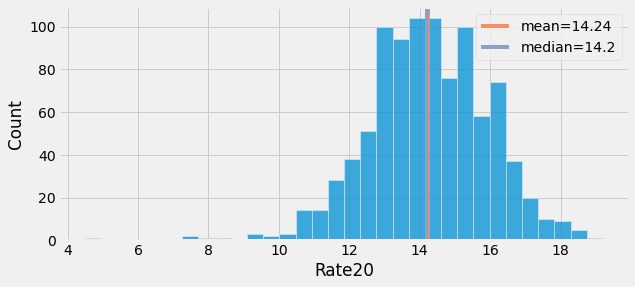

In [227]:
# Rate20 distribution 
plot_rate20 = df_metaimdb['Rate20']

# Plot Rate20
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
ax = sns.histplot(plot_rate20, kde_kws=dict(bw=0.2))
ax.axvline(x=plot_rate20.mean(), c=sns.color_palette("Set2")[1], label=f"mean={round(plot_rate20.mean(), 2)}")
ax.axvline(x=plot_rate20.median(), c=sns.color_palette("Set2")[2], label=f"median={round(plot_rate20.median(), 2)}")
plt.legend();

### Weighted average rating

In [228]:
# https://www.datacamp.com/community/tutorials/recommender-systems-python

# WeightedRating (WR) = (v/v+m * R) + (m/v+m * C)
# v is the number of votes for the movie;
# m is the minimum votes required to be listed in the chart;
# R is the average rating of the movie;
# C is the mean vote across the whole report.

In [229]:
df_rating['imdbVotes'].describe()

count    1.069000e+03
mean     1.434139e+05
std      2.388889e+05
min      8.700000e+01
25%      1.543100e+04
50%      5.937700e+04
75%      1.683010e+05
max      2.579914e+06
Name: imdbVotes, dtype: float64

In [230]:
# Calculate mean of imdbRating column
C = df_rating['imdbRating'].mean()
print('Mean: ' + str(round(C, 2)))
# Calculate the minimum number of votes required to be in the chart, m
m = df_rating['imdbVotes'].quantile(0.25).astype(int) # 50th percentile
print('Minimum votes: ' + str(m))

Mean: 7.11
Minimum votes: 15431


In [231]:
# Filter out all qualified movies into a new DataFrame
q_movies = df_rating.copy().loc[df_rating['imdbVotes'] > m]
q_movies.shape

(801, 10)

In [232]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
#q_movies['Score'] = q_movies.apply(weighted_rating(q_movies, m, C), axis=1)
v = q_movies['imdbVotes']
R = q_movies['imdbRating']
q_movies['Score'] = weighted_rating(v, R, m, C)

# Top N
N = 10
# Select columns
cols = ['Title', 'Year', 'imdbVotes', 'imdbRating', 'Score']
# Show top N movies based on score
q_movies[cols].nlargest(N, 'Score', keep='all')

Title  Year  imdbVotes  imdbRating     Score
249                     The Godfather  1972    1803707         9.2  9.181960
34                    The Dark Knight  2008    2579914         9.0  8.988489
555            The Godfather: Part II  1974    1241386         9.0  8.976499
735                      12 Angry Men  1957     770643         9.0  8.962326
287                         Inception  2010    2288475         8.8  8.789060
742                        The Matrix  1999    1871436         8.7  8.686850
898   One Flew Over the Cuckoo's Nest  1975     989369         8.7  8.675392
787                      Interstellar  2014    1750598         8.6  8.586856
1068         The Silence of the Lambs  1991    1413468         8.6  8.584127
62                      Spirited Away  2001     739827         8.6  8.569290

In [233]:
# Without weighted average
cols = ['Title', 'Year', 'imdbVotes', 'imdbRating']
df_rating[cols].nlargest(N, 'imdbRating', keep='all')

Title  Year  imdbVotes  imdbRating
249                              The Godfather  1972    1803707         9.2
27                  Hans Zimmer Live in Prague  2017       2688         9.1
34                             The Dark Knight  2008    2579914         9.0
555                     The Godfather: Part II  1974    1241386         9.0
735                               12 Angry Men  1957     770643         9.0
314   David Attenborough: A Life on Our Planet  2020      31621         8.9
287                                  Inception  2010    2288475         8.8
742                                 The Matrix  1999    1871436         8.7
898            One Flew Over the Cuckoo's Nest  1975     989369         8.7
62                               Spirited Away  2001     739827         8.6
787                               Interstellar  2014    1750598         8.6
1068                  The Silence of the Lambs  1991    1413468         8.6

## Votes

In [234]:
# Select columns
cols = ['Title', 'Year', 'Rated', 'Runtime', 'Genre', 
        'Director', 'Writer', 'Language', 'Country', 'Metascore', 
        'imdbRating', 'imdbVotes', 'Production', 'Timestamp']
# Create votes dataframe
df_votes = df[cols].copy()

In [235]:
# imdbVotes statistics
df_votes['imdbVotes'].describe()

count    1.069000e+03
mean     1.434139e+05
std      2.388889e+05
min      8.700000e+01
25%      1.543100e+04
50%      5.937700e+04
75%      1.683010e+05
max      2.579914e+06
Name: imdbVotes, dtype: float64

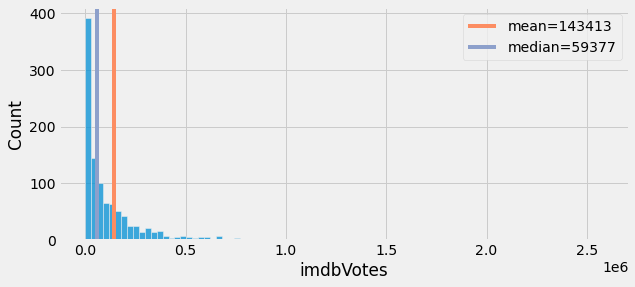

In [236]:
# imdbVotes distribution 
plot_votes = df_votes['imdbVotes']

# Plot imdbVotes
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
ax = sns.histplot(plot_votes, kde_kws=dict(bw=0.2))
ax.axvline(x=plot_votes.mean(), c=sns.color_palette("Set2")[1], label=f"mean={int(plot_votes.mean())}")
ax.axvline(x=plot_votes.median(), c=sns.color_palette("Set2")[2], label=f"median={int(plot_votes.median())}")
plt.legend();

In [237]:
# https://en.wikipedia.org/wiki/Kurtosis
# Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. 
df_rating.imdbVotes.kurtosis()

26.04538969109776

### Top

In [238]:
# Movies with most imdbVotes
N = 10
df_votes.nlargest(N, 'imdbVotes', keep='all')

Title  Year                Rated  Runtime  \
34             The Dark Knight  2008         PG-13, TV-14      152   
287                  Inception  2010         PG-13, TV-14      148   
742                 The Matrix  1999                    R      136   
249              The Godfather  1972      TV-MA, TV-14, R      175   
787               Interstellar  2014  PG-13, TV-14, TV-PG      169   
1068  The Silence of the Lambs  1991             TV-14, R      118   
918       Inglourious Basterds  2009                    R      153   
555     The Godfather: Part II  1974                    R      202   
770                    Memento  2000                    R      113   
106                      Joker  2019                    R      122   

                                    Genre                         Director  \
34         Action, Crime, Drama, Thriller                Christopher Nolan   
287   Action, Adventure, Sci-Fi, Thriller                Christopher Nolan   
742                        Action, Sci-Fi  Lana Wachowski, Lilly Wachowski   
249                          Crime, Drama             Francis Ford Coppola   
787              Adventure, Drama, Sci-Fi                Christopher Nolan   
1068               Crime, Drama, Thriller                   Jonathan Demme   
918                 Adventure, Drama, War                Quentin Tarantino   
555                          Crime, Drama             Francis Ford Coppola   
770                     Mystery, Thriller                Christopher Nolan   
106                Crime, Drama, Thriller                    Todd Phillips   

                                                 Writer  \
34    Bob Kane, David S. Goyer, Jonathan Nolan, Chri...   
287                                   Christopher Nolan   
742                     Lana Wachowski, Lilly Wachowski   
249                    Mario Puzo, Francis Ford Coppola   
787                   Christopher Nolan, Jonathan Nolan   
1068                           Ted Tally, Thomas Harris   
918                                   Quentin Tarantino   
555                    Mario Puzo, Francis Ford Coppola   
770                   Christopher Nolan, Jonathan Nolan   
106   Bob Kane, Bill Finger, Jerry Robinson, Todd Ph...   

                                        Language  \
34                             English, Mandarin   
287                    English, Japanese, French   
742                                      English   
249                      English, Italian, Latin   
787                                      English   
1068                              English, Latin   
918             English, German, French, Italian   
555   English, Italian, Spanish, Latin, Sicilian   
770                                      English   
106                                      English   

                                    Country Metascore  imdbRating  imdbVotes  \
34            United States, United Kingdom        84         9.0    2579914   
287           United States, United Kingdom        74         8.8    2288475   
742                United States, Australia        73         8.7    1871436   
249                           United States       100         9.2    1803707   
787   United States, United Kingdom, Canada        74         8.6    1750598   
1068                          United States        85         8.6    1413468   
918                  Germany, United States        69         8.3    1406810   
555                           United States        90         9.0    1241386   
770                           United States        80         8.4    1214431   
106                   United States, Canada        59         8.4    1212139   

                                             Production           Timestamp  
34    Syncopy, DC Comics, Warner Bros., Legendary En... 2018-05-31 22:36:06  
287      Syncopy, Warner Bros., Legendary Entertainment 2020-08-27 23:51:02  
742   3 Arts Entertainment, Village Roadshow Picture... 2

In [239]:
# Movies with fewer imdbVotes
# Filter out documentaries
df_votes[~df_votes['Genre'].str.contains('Documentary')].nsmallest(N, 'imdbVotes', keep='all')

Title  Year      Rated  Runtime  \
1050            Huesera  2022  Not Rated       93   
1053             Saloum  2021  Not Rated       84   
489   Hero on the Front  2018  Not Rated       85   
545     Bad Investigate  2018  Not Rated      120   
1030           Wild Men  2021  Not Rated      104   
1063       Flux Gourmet  2022  Not Rated      111   
988               Luzzu  2021  Not Rated       94   
808              Holler  2020          R       90   
566                 Joy  2018      TV-MA       99   
571          The Swerve  2018  Not Rated       95   

                                                Genre  \
1050                                    Drama, Horror   
1053                                 Horror, Thriller   
489                           Biography, History, War   
545   Action, Comedy, Crime, Drama, Mystery, Thriller   
1030                                           Comedy   
1063                            Comedy, Drama, Horror   
988                                             Drama   
808                                             Drama   
566                                             Drama   
571                           Drama, Horror, Thriller   

                                         Director  \
1050                       Michelle Garza Cervera   
1053                            Jean Luc Herbulot   
489   Gonçalo Galvão Teles, Jorge Paixão da Costa   
545                                   Luis Ismael   
1030                              Thomas Daneskov   
1063                             Peter Strickland   
988                                Alex Camilleri   
808                                 Nicole Riegel   
566                              Sudabeh Mortezai   
571                                 Dean Kapsalis   

                                       Writer  \
1050    Abia Castillo, Michelle Garza Cervera   
1053           Pamela Diop, Jean Luc Herbulot   
489   Mário Botequilha, Jorge Paixão da Costa   
545   Luis Ismael, Dinis Santos, Daniel Costa   
1030             Morten Pape, Thomas Daneskov   
1063                         Peter Strickland   
988                            Alex Camilleri   
808                             Nicole Riegel   
566                          Sudabeh Mortezai   
571                             Dean Kapsalis   

                                    Language  \
1050                                 Spanish   
1053                           French, Wolof   
489                               Portuguese   
545   Galician, Portuguese, English, Spanish   
1030              Norwegian, Danish, English   
1063                  English, Greek, German   
988                         Maltese, English   
808                                  English   
566                          English, German   
571                                  English   

                                     Country Metascore  imdbRating  imdbVotes  \
1050                            Peru, Mexico         0         6.9        103   
1053                                 Senegal        77         6.5        545   
489                                 Portugal         0         6.3        692   
545                                 Portugal         0         6.5        736   
1030                                 Denmark        71         6.5        950   
1063  United Kingdom, Hungary, United States        80         5.9       1114   
988                     United States, Malta        78         7.0       1133   
808                            United States        76         6.2       1312   
566                                  Austria        75         6.6       1314   
571                            United States        90         6.6       1371   

                                             Production           Timestamp  
1050  Terminal, Maligno Gorehouse, Disruptiva Films,... 2022-09-08 02:13:32  
1053  Rumble Fish Productions, Tableland Pictures, E... 2022-09-10 23:48:19  
489                        

## Plot

In [240]:
# Select columns
cols = ['Title', 'Year', 'Rated', 'Genre', 'Director', 'imdbRating', 'Plot', 'Timestamp']
# Create plot dataframe
df_plot = df[cols].copy()

In [241]:
# Most frequent words in movie plots
TOP = 10
# Count words
sparse_matrix = word_vectorizer.fit_transform(df_plot.Plot)
word_freq = sum(sparse_matrix).toarray()[0]
word_df = pd.DataFrame(word_freq, 
                       index=word_vectorizer.get_feature_names(), 
                       columns=['Frequency'])
word_df.nlargest(TOP, 'Frequency', keep='all')

Frequency
life          341
new           220
world         219
family        206
time          194
old           193
young         183
man           181
year          151
father        146

## Production Companies

In [242]:
# Select columns
cols = ['Title', 'Year', 'Rated', 'Genre', 'Director', 
        'Language', 'Country', 'imdbRating', 'Production', 'Timestamp']
# Create production dataframe
df_production = df[cols].copy()

In [243]:
# Number of production companies
df_counter_production = counter_display(df_production, 'Production', 'Title', None)
print('Different production: ' + str(len(df_counter_production.index)))

Different production: 2846


In [244]:
# Production / ratings
df_production_rating = get_mean_value(df_production, 'Production', 'imdbRating')

### Top

In [245]:
# Top producton companies 
TOP = 10
show_all(df_production_rating.nlargest(TOP, 'Total', keep='all').style.background_gradient(subset=['imdbRating']).set_precision(2))

In [246]:
# Production companies with highest imdbRating average
N = 5
show_all(df_production_rating[df_production_rating['Total'] > 2].nlargest(N, 'imdbRating', keep='all'))

### Search

In [247]:
# Search by production company
prod_company = 'Wild Bunch'

try:
    show_all(pd.DataFrame(df_production_rating.loc[prod_company]).T)
except KeyError:
    print('Production Company not found!')

### Pairing

In [248]:
# Common Production pairing
df_production_pairs = pairing(df_production, 'Production')
# Show top pairs
show_all(df_production_pairs.nlargest(TOP, 'Count', keep='all'))

### Partnerships

#### Production / Director

In [249]:
# Partnership between Production / Director
df_production_director = df_production.copy()
gb_production_director_pair = double_group_info(df_production_director, ['Production', 'Director'], TOP=1)
show_all(gb_production_director_pair.nlargest(TOP, ('Title','count'), keep='all'))

#### Production / Country

In [250]:
# Relation between Production / Country
df_production_country = df_production.copy()
gb_production_country_pair = double_group_info(df_production_country, ['Production', 'Country'], TOP=1)
show_all(gb_production_country_pair.nlargest(TOP, ('Title','count'), keep='all'))

## Distributor

In [251]:
# Select columns
cols = ['Title', 'Year', 'Rated', 'Genre', 'Director', 
        'Language', 'Country', 'imdbRating', 'Distributor', 'Timestamp']
# Create distributor dataframe
df_distributor = df[cols].copy()

In [252]:
# Number of distributor companies
df_counter_distributor = counter_display(df_distributor, 'Distributor', 'Title', None)
print('Different distributor: ' + str(len(df_counter_distributor.index)))

Different distributor: 3291


In [253]:
# Distributor / ratings
df_distributor_rating = get_mean_value(df_distributor, 'Distributor', 'imdbRating')

### Top

In [254]:
# Top distributor companies 
TOP = 10
show_all(df_distributor_rating.nlargest(TOP, 'Total', keep='all').style.background_gradient(subset=['imdbRating']).set_precision(2))

In [255]:
# Distributor companies with highest imdbRating average
N = 5
show_all(df_distributor_rating[df_distributor_rating['Total'] > 2].nlargest(N, 'imdbRating', keep='all'))

### Production / Distributor

In [256]:
# Number of Production Companies that are also Distributors
matches = list(set(df_counter_production.index.values) & set(df_counter_distributor.index.values))
print('Number of Production Companies that are also Distributors: ' + str(len(matches)))

Number of Production Companies that are also Distributors: 262


In [257]:
# Top
df_distributor_rating.loc[matches].nlargest(TOP, ['Total','imdbRating'], keep='all').iloc[:,:-2]

Total
Distributor                 
Netflix                  196
Yleisradio (YLE)         161
HBO Max                  144
Warner Bros.             129
Universal Pictures       124
Madman Entertainment      99
Twentieth Century Fox     85
Universum Film (UFA)      63
Entertainment One         62
StudioCanal               58

## Producer

In [258]:
# Select columns
cols = ['Title','Year','Runtime','Director','Cinematographer','Genre','Actors','imdbRating','imdbVotes','Producer','Date']
# Create producer dataframe
df_producer = df[cols].copy()

In [259]:
# Number of unique producers
df_counter_producer = counter_display(df_producer, 'Producer', 'Title', None)
print('Different producer: ' + str(len(df_counter_producer.index)))

Different producer: 7390


In [260]:
# Producer / rating & runtime
df_prodrat = get_mean_value(df_producer, 'Producer', 'imdbRating')
df_prodrat['Runtime'] = get_mean_value(df_producer, 'Producer', 'Runtime')['Runtime']

# Most watched Producer
print('Producer with only 1 movie watched: ' + str(len(df_prodrat[df_prodrat['Total'] == 1])))

i=1
N_MOVIES = 3
while i <= N_MOVIES:
    print('Producer with more than ' + str(i) + ' movie(s) watched: ' + str(len(df_prodrat[df_prodrat['Total'] > i])))
    i+=1

Producer with only 1 movie watched: 5735
Producer with more than 1 movie(s) watched: 1655
Producer with more than 2 movie(s) watched: 709
Producer with more than 3 movie(s) watched: 363


### Top

In [261]:
# Show top N producers
TOP = 10
show_all(df_prodrat.nlargest(TOP, ['Total','imdbRating'], keep='all').style.background_gradient(subset='imdbRating').set_precision(1))

### Director / Producer

In [262]:
# Number of Directors that are also Producers
matches = list(set(df_counter_directors.index.values) & set(df_counter_producer.index.values))
print('Number of Directors that are also Producers: ' + str(len(matches)))

Number of Directors that are also Producers: 381


In [263]:
# Top director / producer
df_prodrat.loc[matches].nlargest(TOP, ['Total','imdbRating'], keep='all').style.background_gradient(subset='imdbRating').set_precision(1)

### Actor / Producer

In [264]:
# Number of Actors that are also Producers
matches = list(set(df_counter_actors.index.values) & set(df_counter_producer.index.values))
print('Number of Actors that are also Producers: ' + str(len(matches)))

Number of Actors that are also Producers: 651


In [265]:
# Top actor / producer
df_prodrat.loc[matches].nlargest(TOP, ['Total','imdbRating'], keep='all').style.background_gradient(subset='imdbRating').set_precision(1)

## Composer

In [266]:
# Select columns
cols = ['Title','Year','Runtime','Director','Cinematographer','Genre','Actors','imdbRating','imdbVotes','Composer','Timestamp']
# Create composer dataframe
df_composer = df[cols].copy()

In [267]:
# Number of unique composer
df_counter_composer = counter_display(df_composer, 'Composer', 'Title', None)
print('Different composer: ' + str(len(df_counter_composer.index)))

Different composer: 775


In [268]:
# Composer / rating & runtime
df_compdrat = get_mean_value(df_composer, 'Composer', 'imdbRating')
df_compdrat.drop('N/A', axis=0, inplace=True) # Drop Composer = 'N/A'
#df_compdrat['Runtime'] = get_mean_value(df_compdrat, 'Composer', 'Runtime')['Runtime']

# Most watched Producer
print('Composer with only 1 movie watched: ' + str(len(df_compdrat[df_compdrat['Total'] == 1])))

i=1
n_movies = 3
while i <= n_movies:
    print('Composer with more than ' + str(i) + ' movie(s) watched: ' + str(len(df_compdrat[df_compdrat['Total'] > i])))
    i+=1

Composer with only 1 movie watched: 576
Composer with more than 1 movie(s) watched: 198
Composer with more than 2 movie(s) watched: 97
Composer with more than 3 movie(s) watched: 58


### Top

In [269]:
# Show top N composers
TOP = 10
show_all(df_compdrat.nlargest(TOP, ['Total','imdbRating'], keep='all').style.background_gradient(subset='imdbRating').set_precision(1))

## Box Office

In [270]:
# Select columns
cols = ['Title','Year','Runtime','Director','Cinematographer','Genre','Actors','imdbRating','imdbVotes','Production','BoxOffice','Budget','Timestamp']
# Create box office dataframe
df_boxoffice = df[cols].copy()

In [271]:
# Clean data
df_boxoffice['BoxOffice'] = df_boxoffice['BoxOffice'].str.replace(',','')
df_boxoffice['BoxOffice'] = df_boxoffice['BoxOffice'].astype(dtype='int64')
# Remove movies without box office info
df_boxoffice= df_boxoffice[df_boxoffice['BoxOffice'] > 0]
df_boxoffice.BoxOffice.describe().astype(int)#.apply(lambda x: format(x, 'd'))

count           331
mean      200576360
std       322373634
min          101368
25%        21752094
50%        87100449
75%       233034419
max     -2147483648
Name: BoxOffice, dtype: int32

### Top

In [272]:
# Select columns
show_col = ['Title','Year','Runtime','Director','imdbRating','Production','BoxOffice']

TOP = 10
print('Box Office in Million $')
df_show_boxoffice = df_boxoffice.copy()
df_show_boxoffice['BoxOffice'] = round(df_show_boxoffice['BoxOffice'].div(1000000), 1)
show_all(df_show_boxoffice[show_col].nlargest(TOP, 'BoxOffice', keep='all'))

Box Office in Million $


## Budget

In [273]:
# Select columns
cols = ['Title','Year','Runtime','Director','Cinematographer','Genre','Actors','imdbRating','imdbVotes','Production','BoxOffice','Budget','Timestamp']
# Create budget dataframe with clean box office values
df_budget = df_boxoffice[cols].copy() # use same columns as in box office
# Budget dataframe created in Box Office section (see above)
df_budget['Budget'] = df_budget['Budget'].astype(str)
df_budget['Budget'] = df_budget['Budget'].str.replace(',','')
#df_budget.Budget.describe().astype(int)

In [274]:
# Create filters
mask1 = df_budget.BoxOffice != 0 
mask2 = df_budget.Budget != str(0)
mask3 = df_budget.Budget.str.isnumeric() # without other currencies (only $) 
# Filter dataframe
df_dollar_budget = df_budget[mask1 & mask2 & mask3]
df_dollar_budget['Budget'] = df_dollar_budget['Budget'].astype(int)
df_dollar_budget.shape

(264, 13)

In [275]:
# Movies with Budgets from other currencies than $
df_budget[mask1 & mask2 & ~mask3].shape

(25, 13)

### Top

In [276]:
# Select columns
show_col = ['Title','Year','Runtime','Director','imdbRating','Production','Budget']
df_dollar_budget[show_col].nlargest(N, 'Budget', keep='all')

Title  Year  Runtime  \
100                        Avengers: Endgame  2019      181   
41                    Avengers: Infinity War  2018      149   
21   Star Wars: Episode VIII - The Last Jedi  2017      152   
48                   Solo: A Star Wars Story  2018      135   
719                           No Time to Die  2021      163   

                     Director  imdbRating  \
100  Joe Russo, Anthony Russo         8.4   
41   Joe Russo, Anthony Russo         8.4   
21               Rian Johnson         6.9   
48                 Ron Howard         6.9   
719        Cary Joji Fukunaga         7.3   

                                            Production     Budget  
100               Walt Disney Pictures, Marvel Studios  356000000  
41   Walt Disney Pictures, Jason Roberts Production...  321000000  
21   Walt Disney Pictures, Lucasfilm, Bad Robot, Ra...  317000000  
48   Walt Disney Pictures, Lucasfilm, Lord Miller, ...  300000000  
719  Universal Pictures, Metro-Goldwyn-Mayer (MGM),...  250000000

### Profit

In [277]:
# Select columns
show_col = ['Title','Year','Runtime','Director','imdbRating','Production','BoxOffice','Budget','Profit','ProfitX']
N = 10

# Calculate Profit = Box Office - Budget
df_dollar_budget['Profit'] = df_dollar_budget.BoxOffice - df_dollar_budget.Budget
df_dollar_budget['ProfitX'] = round(df_dollar_budget.BoxOffice / df_dollar_budget.Budget, 1)

In [278]:
# Statistics
change_cols = ['BoxOffice','Budget','Profit']
df_dollar_budget[change_cols] = df_dollar_budget[change_cols].div(1000000) # divide by 1 million
df_dollar_budget[change_cols].describe().apply(lambda s: s.apply('{0:1f}'.format))

BoxOffice      Budget       Profit
count   264.000000  264.000000   264.000000
mean    238.989767   58.486250   180.503517
std     348.776109   65.651314   300.959510
min       0.861057    0.010000  -151.031147
25%      36.755125   15.000000    15.742565
50%     118.599545   30.000000    76.002724
75%     286.180001   80.500000   211.889770
max    2797.800564  356.000000  2441.800564

#### Top

In [279]:
# Top Profit
df_dollar_budget[show_col[:-1]].nlargest(N, 'Profit', keep='all')

Title  Year  Runtime  \
100                        Avengers: Endgame  2019      181   
41                    Avengers: Infinity War  2018      149   
880                  Spider-Man: No Way Home  2021      148   
25                             Black Panther  2018      134   
51                             Incredibles 2  2018      118   
106                                    Joker  2019      122   
21   Star Wars: Episode VIII - The Last Jedi  2017      152   
81                                   Aquaman  2018      143   
101                Spider-Man: Far from Home  2019      129   
94                            Captain Marvel  2019      123   

                     Director  imdbRating  \
100  Joe Russo, Anthony Russo         8.4   
41   Joe Russo, Anthony Russo         8.4   
880                 Jon Watts         8.3   
25               Ryan Coogler         7.3   
51                  Brad Bird         7.6   
106             Todd Phillips         8.4   
21               Rian Johnson         6.9   
81                  James Wan         6.8   
101                 Jon Watts         7.4   
94     Anna Boden, Ryan Fleck         6.8   

                                            Production    BoxOffice  Budget  \
100               Walt Disney Pictures, Marvel Studios  2797.800564   356.0   
41   Walt Disney Pictures, Jason Roberts Production...  2048.709917   321.0   
880  Columbia Pictures, Marvel Studios, Pascal Pict...  1892.747988   200.0   
25                Walt Disney Pictures, Marvel Studios  1347.071259   200.0   
51       Walt Disney Pictures, Pixar Animation Studios  1242.770554   200.0   
106  Creative Wealth Media Finance, Joint Effort, V...  1074.251311    55.0   
21   Walt Disney Pictures, Lucasfilm, Bad Robot, Ra...  1332.539889   317.0   
81   DC Entertainment, DC Comics, The Safran Compan...  1147.961807   160.0   
101  Canadian Film or Video Production Tax Credit (...  1131.927996   160.0   
94   Animal Logic, Walt Disney Pictures, Marvel Stu...  1128.274794   175.0   

          Profit  
100  2441.800564  
41   1727.709917  
880  1692.747988  
25   1147.071259  
51   1042.770554  
106  1019.251311  
21   1015.539889  
81    987.961807  
101   971.927996  
94    953.274794

In [280]:
# Top Profit gain considering Budget
df_dollar_budget[show_col].nlargest(N, 'ProfitX', keep='all')

Title  Year  Runtime              Director  imdbRating  \
252              Eraserhead  1977       89           David Lynch         7.3   
226       The Invisible Man  2020      124        Leigh Whannell         7.1   
198               Searching  2018      102       Aneesh Chaganty         7.6   
974                    Jaws  1975      124      Steven Spielberg         8.1   
249           The Godfather  1972      175  Francis Ford Coppola         9.2   
979             Rear Window  1954      112      Alfred Hitchcock         8.5   
97       The Sound of Music  1965      172           Robert Wise         8.1   
109     Lost in Translation  2003      102         Sofia Coppola         7.7   
339  The Fault in Our Stars  2014      126            Josh Boone         7.7   
33            A Quiet Place  2018       90        John Krasinski         7.5   
779      Back to the Future  1985      116       Robert Zemeckis         8.5   

                                            Production   BoxOffice  Budget  \
252               American Film Institute, Libra Films    7.097971    0.01   
226  Universal Pictures, Nervous Tick Productions, ...  144.492724    1.23   
198    Screen Gems, Stage 6 Films, Bazelevs Production   75.462037    0.88   
974       Zanuck/Brown Productions, Universal Pictures  470.653000    9.00   
249  Alfran Productions, Paramount Pictures, Albert...  245.066411    6.00   
979                    Alfred J. Hitchcock Productions   36.888916    1.00   
97         Argyle Enterprises, Robert Wise Productions  286.214286    8.20   
109  Focus Features, Elemental Films, Tohokushinsha...  119.723856    4.00   
339  Fox 2000 Pictures, Temple Hill Entertainment, ...  307.239013   12.00   
33    Sunday Night, Paramount Pictures, Platinum Dunes  340.939361   17.00   
779  Universal Pictures, U-Drive Productions, Ambli...  381.109762   19.00   

         Profit  ProfitX  
252    7.087971    709.8  
226  143.262724    117.5  
198   74.582037     85.8  
974  461.653000     52.3  
249  239.066411     40.8  
979   35.888916     36.9  
97   278.014286     34.9  
109  115.723856     29.9  
339  295.239013     25.6  
33   323.939361     20.1  
779  362.109762     20.1

#### Bottom (Losses)

In [281]:
# Top losses
df_dollar_budget[show_col].nsmallest(N, 'Profit', keep='all')

Title  Year  Runtime              Director  \
132              The Irishman  2019      209       Martin Scorsese   
213                    Onward  2020      102           Dan Scanlon   
4                     Silence  2016      161       Martin Scorsese   
128            Marriage Story  2019      137         Noah Baumbach   
140                The Jacket  2005      103          John Maybury   
911                 Dark City  1998      100           Alex Proyas   
493       A Cure for Wellness  2016      146        Gore Verbinski   
536           The Infiltrator  2016      127           Brad Furman   
1035  The Midnight Meat Train  2008       98       Ryûhei Kitamura   
774                  Magnolia  1999      188  Paul Thomas Anderson   

      imdbRating                                         Production  \
132          7.8  Winkler Films, Tribeca Productions, Sikelia Pr...   
213          7.4      Walt Disney Pictures, Pixar Animation Studios   
4            7.1  Verdi Productions, The Fyzz Facility, Taipei F...   
128          7.9                              Heyday Films, Netflix   
140          7.1  VIP 2 Medienfonds, VIP 3 Medienfonds, Warner I...   
911          7.6              New Line Cinema, Mystery Clock Cinema   
493          6.4  Blind Wink Productions, TSG Entertainment, New...   
536          7.0  Sierra / Affinity, Lipsync Productions, George...   
1035         6.0  Lionsgate, Midnight Picture Show, GreeneStreet...   
774          8.0  New Line Cinema, The Magnolia Project, Ghoular...   

      BoxOffice  Budget      Profit  ProfitX  
132    7.968853   159.0 -151.031147      0.1  
213   47.069607   175.0 -127.930393      0.3  
4     23.737523    46.0  -22.262477      0.5  
128    2.333686    18.6  -16.266314      0.1  
140   13.743096    29.0  -15.256904      0.5  
911   12.821985    27.0  -14.178015      0.5  
493   26.620002    40.0  -13.379998      0.7  
536   14.805854    28.0  -13.194146      0.5  
1035   3.533227    15.0  -11.466773      0.2  
774   25.995827    37.0  -11.004173      0.7

## Timestamp

In [282]:
# Select columns
cols = ['Title','Year','Rated','Genre','Timestamp','Time']
# Create timestamp dataframe
df_timestamp = df[cols].copy() 
explode_date(df_timestamp);

In [283]:
# Create time related columns
df_timestamp['Hour'] = df_timestamp['Timestamp'].dt.hour
#df_timestamp['Minute'] = df_timestamp['Timestamp'].dt.minute
## https://stackoverflow.com/questions/62915974/pandas-group-by-time-interval-5min-10min-1day-1year-and-count-amount-of-ent
#period = '15Min'
## divide hour into blocks of x minutes
#df_timestamp['Period'] = pd.DataFrame(df_timestamp['Timestamp'].dt.floor(period))['Timestamp'].dt.minute

### Last watched

In [284]:
# Last watched movies timestamp (hour of day)
df_last_hour = df_timestamp.tail(LAST).copy()
ct_last_hour = pd.crosstab([df_last_hour['Weekday'], df_last_hour['WeekdayName']], df_last_hour['Hour'])

ct_last_hour.style.background_gradient(axis=None) # all values

### General

In [285]:
# Create 24h range
range24 = np.arange(24)
# Analysis by hour of day
ycol = df_timestamp['Hour']
# Movies watched by hour by Weekday
xcol = [df_timestamp['Weekday'], df_timestamp['WeekdayName']]
# Create crosstab
ct_week_hour = pd.crosstab(xcol, ycol)
ct_week_hour = ct_week_hour.droplevel(0)
ct_week_hour.style.background_gradient(axis=1) # evaluate by weekday

In [286]:
# Movies watched by hour by Month
xcol = [df_timestamp['Month'], df_timestamp['MonthName']]
# Create crosstab
ct_month_hour = pd.crosstab(xcol, ycol)
ct_month_hour = ct_month_hour.droplevel(0)
ct_month_hour.style.background_gradient(axis=1) # evaluate by month

In [287]:
# Movies watched based on Month and Weekday (complete scenario)
xcol = [df_timestamp['Month'], df_timestamp['MonthName'], df_timestamp['Weekday'], df_timestamp['WeekdayName']]
# Create crosstab
ct_month_week = pd.crosstab(xcol, ycol)
ct_month_week = ct_month_week.droplevel([0,2])
show_all(ct_month_week.style.background_gradient(axis=1))

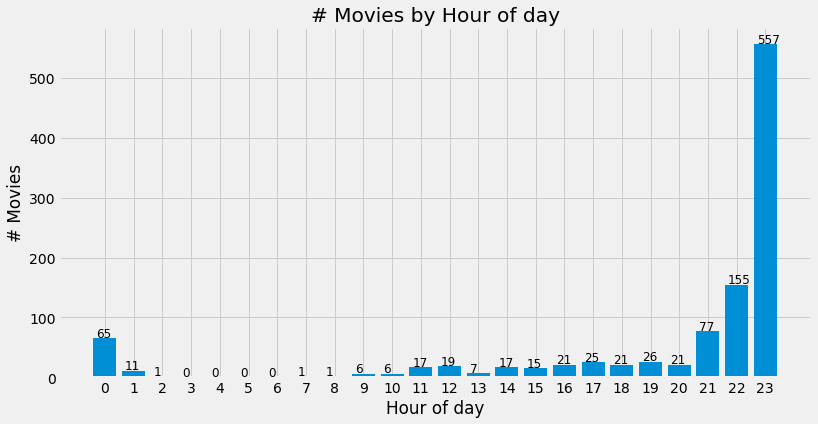

In [288]:
# Movies watched by hour of day (0-24)
plot_hour_day = df_timestamp.groupby('Hour').agg({'Title':'count'})
# Create movies by time of day dataframe
plot_24 = pd.DataFrame(range24, columns=['Hour']) # from 0 to 23, without missing a hour
plot_24['Title'] = plot_hour_day['Title']
plot_24['Title'] = plot_24['Title'].fillna(0).astype(int)

# Plot
x = plot_24.Hour
y = plot_24.Title
xsize = len(x) // 2

plt.figure(figsize=(xsize,6))
plt.bar(x, y)
plt.xlabel('Hour of day')
plt.ylabel('# Movies')
plt.title('# Movies by Hour of day')
plt.xticks(range24)
for i, rate in enumerate(y):
    plt.text(i-0.3, rate+2, rate, fontdict={'fontsize':12})

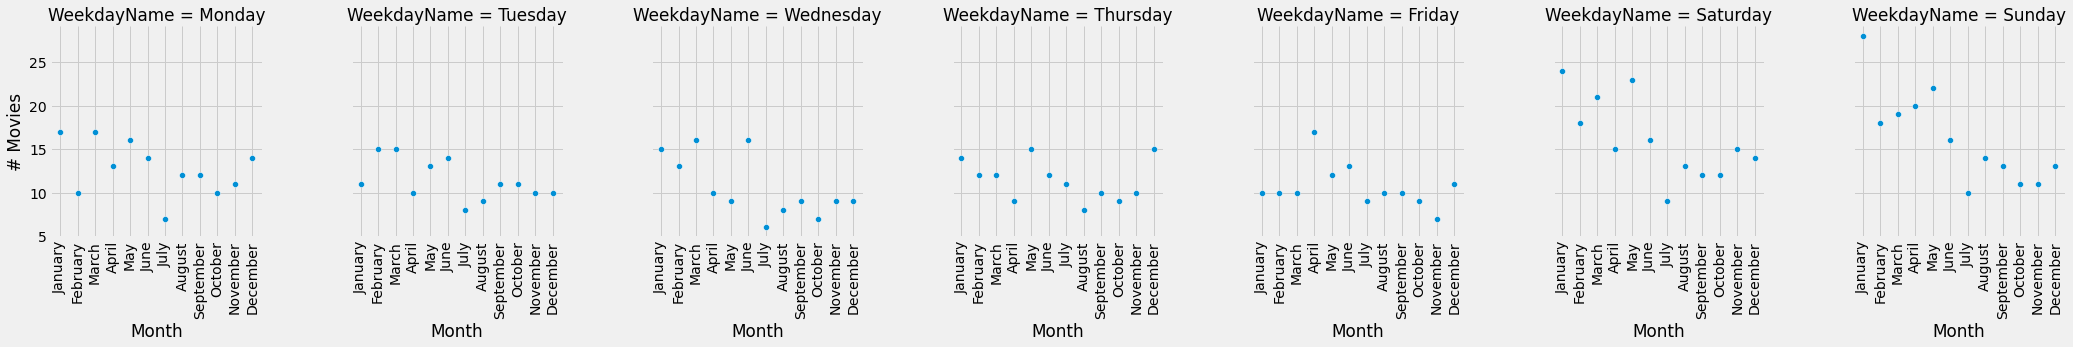

In [289]:
# Movies watched by Weekday / Month
cols = ['Month','MonthName','Weekday','WeekdayName']
gb_timestamp = df_timestamp.groupby(cols).agg({'Title':'count'}).reset_index()

# Plot
g = sns.FacetGrid(gb_timestamp, col="WeekdayName")
g.map(sns.scatterplot, "MonthName", "Title")
g.set_axis_labels("Month", "# Movies")
g.fig.set_figheight(5)
g.fig.set_figwidth(30);
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

### By Year

2018 



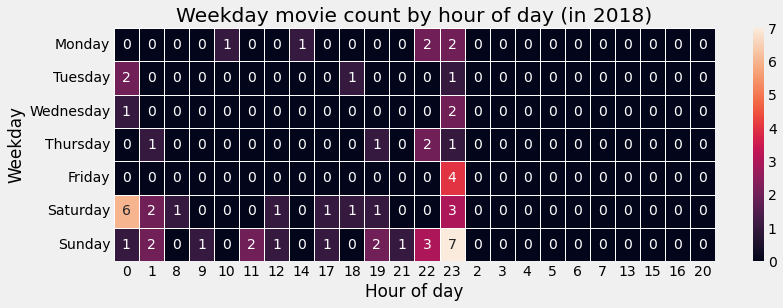



2019 



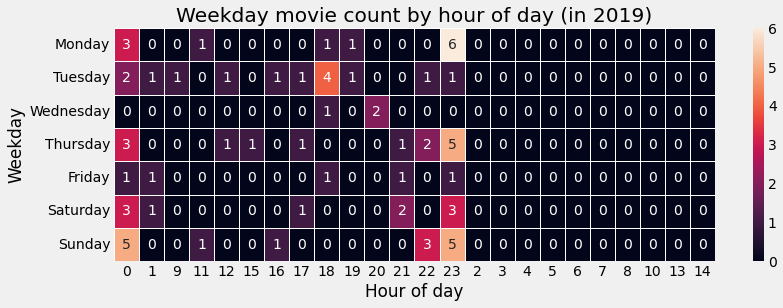



2020 



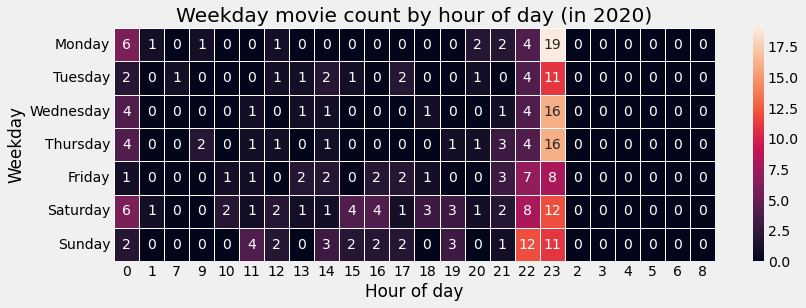



2021 



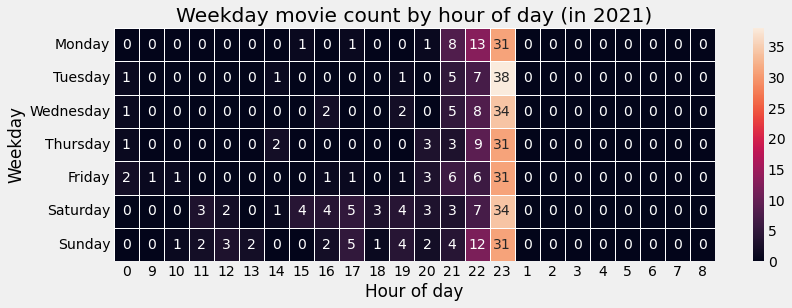



2022 



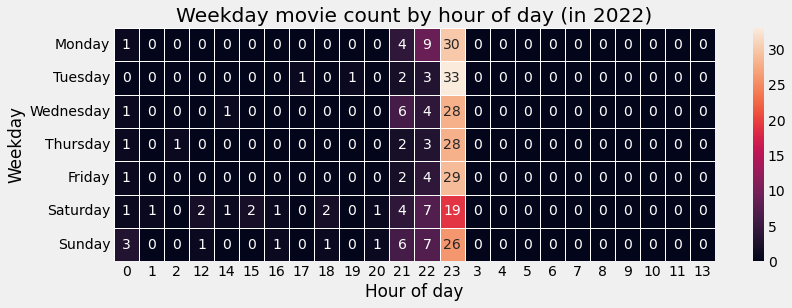

In [290]:
# Get overview by Year
# Create 24 hour dataframe
weekdays = ct_last_hour.index.values # get weekday names ordered from previously created dataframe 
df_24 = pd.DataFrame(0, index=weekdays, columns=range24)
df_24.index.name = 'WeekdayName'
df_24.columns.name = 'Hour'

xsize = len(df_24.columns) // 2
for year in years:
    plot_hour_weekday_year = df_timestamp[df_timestamp['Timestamp'].dt.year == year]    
    print(year,'\n') 
    plot_hour_weekday_year = pd.crosstab([plot_hour_weekday_year['Weekday'], plot_hour_weekday_year['WeekdayName']], plot_hour_weekday_year['Hour'])
    plot_hour_weekday_year = plot_hour_weekday_year.droplevel(0)    
    plot_24hour_weekday_year = pd.concat([plot_hour_weekday_year, df_24]).iloc[:7,:].fillna(0).astype(int)
    
    # Plot
    _, ax = plt.subplots(figsize=(xsize, 4))
    sns.heatmap(plot_24hour_weekday_year, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title('Weekday movie count by hour of day (in ' + str(year) + ')')    
    plt.xlabel('Hour of day')
    plt.ylabel('Weekday')
    plt.show()
    print('\n')

In [291]:
# Weekdays
df_time_genre = df_timestamp.copy()
# strip multiple genre
df_time_genre = split_explode(df_time_genre, 'Genre')
# Get number of unique dates and movies
week_unique_days = df_time_genre.groupby(['Weekday','WeekdayName']).agg({'Date':'nunique', 'Title':'nunique'})
week_unique_days = week_unique_days.droplevel(0)
week_unique_days.rename(columns={'Date':'Days', 'Title':'Movies'}, inplace=True)
week_unique_days['Movies per Day'] = (week_unique_days['Movies'] / week_unique_days['Days']).round(2)
# Sum days and movies
total_days = week_unique_days['Days'].sum()
total_movies = week_unique_days['Movies'].sum()
print('Total days with at least 1 movie watched:', total_days)
print('Total movies watched:', total_movies)
week_unique_days.style.background_gradient(subset='Movies per Day').set_precision(2)

Total days with at least 1 movie watched: 869
Total movies watched: 1069


### Genre

In [292]:
# Analysis by genre
xcol = df_time_genre['Genre']
# Genre by Weekday
ycol = [df_time_genre['Weekday'], df_time_genre['WeekdayName']]
ct_genre_week = pd.crosstab(xcol, ycol).droplevel(0, axis=1)
ct_genre_week.style.background_gradient(axis=1) # evaluate by genre

In [293]:
# Genre by Month
ycol = [df_time_genre['Month'], df_time_genre['MonthName']]
ct_genre_month = pd.crosstab(xcol, ycol).droplevel(0, axis=1)
ct_genre_month.style.background_gradient(axis=1) # evaluate by genre

In [294]:
# Extensive

## Genre by Weekday by Month
#ycol = [df_time_genre['Month'], df_time_genre['MonthName'], df_time_genre['Weekday'], df_time_genre['WeekdayName']]
#
#ct_genre_week_month = pd.crosstab(xcol, ycol).T
#ct_genre_week_month = ct_genre_week_month.droplevel([0,2])
#show_all(ct_genre_week_month.style.background_gradient(axis=0))

---